# Project: Identify Customer Segments

In this project, you will apply unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

This notebook will help you complete this task by providing a framework within which you will perform your analysis steps. In each step of the project, you will see some text describing the subtask that you will perform, followed by one or more code cells for you to complete your work. **Feel free to add additional code and markdown cells as you go along so that you can explore everything in precise chunks.** The code cells provided in the base template will outline only the major tasks, and will usually not be enough to cover all of the minor tasks that comprise it.

It should be noted that while there will be precise guidelines on how you should handle certain tasks in the project, there will also be places where an exact specification is not provided. **There will be times in the project where you will need to make and justify your own decisions on how to treat the data.** These are places where there may not be only one way to handle the data. In real-life tasks, there may be many valid ways to approach an analysis task. One of the most important things you can do is clearly document your approach so that other scientists can understand the decisions you've made.

At the end of most sections, there will be a Markdown cell labeled **Discussion**. In these cells, you will report your findings for the completed section, as well as document the decisions that you made in your approach to each subtask. **Your project will be evaluated not just on the code used to complete the tasks outlined, but also your communication about your observations and conclusions at each stage.**

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = [15, 10]

# magic word for producing visualizations in notebook
%matplotlib inline

### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. You will use this information to cluster the general population into groups with similar demographic properties. Then, you will see how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

To start off with, load in the demographics data for the general population into a pandas DataFrame, and do the same for the feature attributes summary. Note for all of the `.csv` data files in this project: they're semicolon (`;`) delimited, so you'll need an additional argument in your [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call to read in the data properly. Also, considering the size of the main dataset, it may take some time for it to load completely.

Once the dataset is loaded, it's recommended that you take a little bit of time just browsing the general structure of the dataset and feature summary file. You'll be getting deep into the innards of the cleaning in the first major step of the project, so gaining some general familiarity can help you get your bearings.

In [2]:
# Check function
# pd.read_csv?

In [3]:
# Load in the general demographics data.
azdias = pd.read_csv('Udacity_AZDIAS_Subset.csv',sep = ';')

# Load in the feature summary file.
feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv',sep = ';')

In [4]:
# Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).

### azdias dataset

In [5]:
print('There are ',azdias.shape[0], ' rows and ', azdias.shape[1], ' columns in the azdias dataset')
azdias.head()

There are  891221  rows and  85  columns in the azdias dataset


,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,GEBURTSJAHR,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SHOPPER_TYP,SOHO_KZ,TITEL_KZ,VERS_TYP,ZABEOTYP,ALTER_HH,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,KK_KUNDENTYP,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,GEBAEUDETYP,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,WOHNLAGE,CAMEO_DEUG_2015,CAMEO_DEU_2015,CAMEO_INTL_2015,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_BAUMAX,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,4,0,10.0,0,-1,15.0,4.0,2.0,2.0,1.0,1.0,0,0,5.0,2,6,7,5,1,5,3,3,4,7,6,6,5,3,-1,NaN,NaN,-1,3,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,1,1996,10.0,0,3,21.0,6.0,5.0,3.0,2.0,1.0,1,14,1.0,5,4,4,3,1,2,2,3,6,4,7,4,7,6,3,1.0,0.0,2,5,0.0,2.0,0.0,6.0,NaN,3.0,9.0,11.0,0.0,8.0,1.0,1992.0,W,4.0,8,8A,51,0.0,0.0,0.0,2.0,5.0,1.0,6.0,3.0,8.0,3.0,2.0,1.0,3.0,3.0,963.0,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,1,1979,10.0,1,3,3.0,1.0,1.0,1.0,3.0,2.0,1,15,3.0,4,1,3,3,4,4,6,3,4,7,7,7,3,3,2,0.0,0.0,1,5,17.0,1.0,0.0,4.0,NaN,3.0,9.0,10.0,0.0,1.0,5.0,1992.0,W,2.0,4,4C,24,1.0,3.0,1.0,0.0,0.0,3.0,2.0,4.0,4.0,4.0,2.0,3.0,2.0,2.0,712.0,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,6,1957,1.0,0,2,0.0,0.0,0.0,0.0,9.0,4.0,1,8,2.0,5,1,2,1,4,4,7,4,3,4,4,5,4,4,1,0.0,0.0,1,3,13.0,0.0,0.0,1.0,NaN,NaN,9.0,1.0,0.0,1.0,4.0,1997.0,W,7.0,2,2A,12,4.0,1.0,0.0,0.0,1.0,4.0,4.0,2.0,6.0,4.0,0.0,4.0,1.0,0.0,596.0,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,-1,3,1,5.0,4,3,4,1,3,2,5,1963,5.0,0,3,32.0,10.0,10.0,5.0,3.0,2.0,1,8,5.0,6,4,4,2,7,4,4,6,2,3,2,2,4,2,2,0.0,0.0,2,4,20.0,4.0,0.0,5.0,1.0,2.0,9.0,3.0,0.0,1.0,4.0,1992.0,W,3.0,6,6B,43,1.0,4.0,1.0,0.0,0.0,3.0,2.0,5.0,1.0,5.0,3.0,3.0,5.0,5.0,435.0,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


### feat_info dataset

In [6]:
print('There are ',feat_info.shape[0], ' rows and ', feat_info.shape[1], ' columns in the azdias dataset')
feat_info

There are  85  rows and  4  columns in the azdias dataset


,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]
5,FINANZ_SPARER,person,ordinal,[-1]
6,FINANZ_VORSORGER,person,ordinal,[-1]
7,FINANZ_ANLEGER,person,ordinal,[-1]
8,FINANZ_UNAUFFAELLIGER,person,ordinal,[-1]
9,FINANZ_HAUSBAUER,person,ordinal,[-1]


> **Tip**: Add additional cells to keep everything in reasonably-sized chunks! Keyboard shortcut `esc --> a` (press escape to enter command mode, then press the 'A' key) adds a new cell before the active cell, and `esc --> b` adds a new cell after the active cell. If you need to convert an active cell to a markdown cell, use `esc --> m` and to convert to a code cell, use `esc --> y`. 

## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. You will use this file to help you make cleaning decisions during this stage of the project. First of all, you should assess the demographics data in terms of missing data. Pay attention to the following points as you perform your analysis, and take notes on what you observe. Make sure that you fill in the **Discussion** cell with your findings and decisions at the end of each step that has one!

#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. You'll need to do a little bit of parsing to make use of it to identify and clean the data. Convert data that matches a 'missing' or 'unknown' value code into a numpy NaN value. You might want to see how much data takes on a 'missing' or 'unknown' code, and how much data is naturally missing, as a point of interest.

**As one more reminder, you are encouraged to add additional cells to break up your analysis into manageable chunks.**

In [7]:
# Identify missing or unknown data values and convert them to NaNs.

Convert dict string to list

In [8]:
# turn missing_or_unknown to list 
#feat_info['missing_or_unknown'] = feat_info['missing_or_unknown'].apply(lambda x: x[1:-1].split(','))

Create a dictionary for missing data

In [9]:
mydict = dict(zip(feat_info.attribute, feat_info.missing_or_unknown))
mydict

{'AGER_TYP': '[-1,0]',
 'ALTERSKATEGORIE_GROB': '[-1,0,9]',
 'ANREDE_KZ': '[-1,0]',
 'CJT_GESAMTTYP': '[0]',
 'FINANZ_MINIMALIST': '[-1]',
 'FINANZ_SPARER': '[-1]',
 'FINANZ_VORSORGER': '[-1]',
 'FINANZ_ANLEGER': '[-1]',
 'FINANZ_UNAUFFAELLIGER': '[-1]',
 'FINANZ_HAUSBAUER': '[-1]',
 'FINANZTYP': '[-1]',
 'GEBURTSJAHR': '[0]',
 'GFK_URLAUBERTYP': '[]',
 'GREEN_AVANTGARDE': '[]',
 'HEALTH_TYP': '[-1,0]',
 'LP_LEBENSPHASE_FEIN': '[0]',
 'LP_LEBENSPHASE_GROB': '[0]',
 'LP_FAMILIE_FEIN': '[0]',
 'LP_FAMILIE_GROB': '[0]',
 'LP_STATUS_FEIN': '[0]',
 'LP_STATUS_GROB': '[0]',
 'NATIONALITAET_KZ': '[-1,0]',
 'PRAEGENDE_JUGENDJAHRE': '[-1,0]',
 'RETOURTYP_BK_S': '[0]',
 'SEMIO_SOZ': '[-1,9]',
 'SEMIO_FAM': '[-1,9]',
 'SEMIO_REL': '[-1,9]',
 'SEMIO_MAT': '[-1,9]',
 'SEMIO_VERT': '[-1,9]',
 'SEMIO_LUST': '[-1,9]',
 'SEMIO_ERL': '[-1,9]',
 'SEMIO_KULT': '[-1,9]',
 'SEMIO_RAT': '[-1,9]',
 'SEMIO_KRIT': '[-1,9]',
 'SEMIO_DOM': '[-1,9]',
 'SEMIO_KAEM': '[-1,9]',
 'SEMIO_PFLICHT': '[-1,9]',
 'SEMIO_TRA

Convert list string to int but keep string if string

In [10]:
# str_int = lambda x : int(x) if (str.isdigit(x.lstrip('-')) == True) else str(x)
# mydict = {str(k):[str_int(i) for i in v] for k,v in mydict.items()}
# mydict

Loop through dictionary to replace missing value to numpy NaN

In [11]:
# Identify missing or unknown data values and convert them to NaNs.
start = time.time()
# Prepare feat_info via strip and split
# Remove missing_or_unknown codes from azdias
for index in feat_info.index:
    feat_info.loc[index,'missing_or_unknown'] = feat_info.loc[index,'missing_or_unknown'].strip('[]').split(',')
    for item in range(len(feat_info.loc[index,'missing_or_unknown'])):
        try:
            feat_info.loc[index,'missing_or_unknown'][item] = int(feat_info.loc[index,'missing_or_unknown'][item])
        except:
            continue
    azdias.loc[:,(feat_info.loc[index, 'attribute'])].replace(feat_info.loc[index,'missing_or_unknown'], np.nan, inplace=True)
end = time.time()
print("Total execution time of this procedure: {:.2f} seconds".format(end-start))

Total execution time of this procedure: 2.98 seconds


In [12]:
azdias.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,GEBURTSJAHR,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SHOPPER_TYP,SOHO_KZ,TITEL_KZ,VERS_TYP,ZABEOTYP,ALTER_HH,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,KK_KUNDENTYP,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,GEBAEUDETYP,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,WOHNLAGE,CAMEO_DEUG_2015,CAMEO_DEU_2015,CAMEO_INTL_2015,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_BAUMAX,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,NaN,2.0,1,2.0,3,4,3,5,5,3,4,NaN,10.0,0,NaN,15.0,4.0,2.0,2.0,1.0,1.0,NaN,NaN,5.0,2,6,7,5,1,5,3,3,4,7,6,6,5,3,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,2,5.0,1,5,2,5,4,5,1,1996.0,10.0,0,3.0,21.0,6.0,5.0,3.0,2.0,1.0,1.0,14.0,1.0,5,4,4,3,1,2,2,3,6,4,7,4,7,6,3.0,1.0,NaN,2.0,5,NaN,2.0,0.0,6.0,NaN,3.0,9.0,11.0,0.0,8.0,1.0,1992.0,W,4.0,8,8A,51,0.0,0.0,0.0,2.0,5.0,1.0,6.0,3.0,8.0,3.0,2.0,1.0,3.0,3.0,963.0,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,NaN,3.0,2,3.0,1,4,1,2,3,5,1,1979.0,10.0,1,3.0,3.0,1.0,1.0,1.0,3.0,2.0,1.0,15.0,3.0,4,1,3,3,4,4,6,3,4,7,7,7,3,3,2.0,0.0,NaN,1.0,5,17.0,1.0,0.0,4.0,NaN,3.0,9.0,10.0,0.0,1.0,5.0,1992.0,W,2.0,4,4C,24,1.0,3.0,1.0,0.0,NaN,3.0,2.0,4.0,4.0,4.0,2.0,3.0,2.0,2.0,712.0,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2.0,4.0,2,2.0,4,2,5,2,1,2,6,1957.0,1.0,0,2.0,NaN,NaN,NaN,NaN,9.0,4.0,1.0,8.0,2.0,5,1,2,1,4,4,7,4,3,4,4,5,4,4,1.0,0.0,NaN,1.0,3,13.0,0.0,0.0,1.0,NaN,NaN,9.0,1.0,0.0,1.0,4.0,1997.0,W,7.0,2,2A,12,4.0,1.0,0.0,0.0,1.0,4.0,4.0,2.0,6.0,4.0,NaN,4.0,1.0,NaN,596.0,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,NaN,3.0,1,5.0,4,3,4,1,3,2,5,1963.0,5.0,0,3.0,32.0,10.0,10.0,5.0,3.0,2.0,1.0,8.0,5.0,6,4,4,2,7,4,4,6,2,3,2,2,4,2,2.0,0.0,NaN,2.0,4,20.0,4.0,0.0,5.0,1.0,2.0,9.0,3.0,0.0,1.0,4.0,1992.0,W,3.0,6,6B,43,1.0,4.0,1.0,0.0,NaN,3.0,2.0,5.0,1.0,5.0,3.0,3.0,5.0,5.0,435.0,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


#### Step 1.1.2: Assess Missing Data in Each Column

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. You will want to use matplotlib's [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function to visualize the distribution of missing value counts to find these columns. Identify and document these columns. While some of these columns might have justifications for keeping or re-encoding the data, for this project you should just remove them from the dataframe. (Feel free to make remarks about these outlier columns in the discussion, however!)

For the remaining features, are there any patterns in which columns have, or share, missing data?

### Use seaborn's heatmap() to plot tf_dt. [Link](https://campus.datacamp.com/courses/feature-engineering-with-pyspark/wrangling-with-spark-functions?ex=10)

Perform an assessment of how much missing data there is in each column of the dataset.

Convert data frame into True/False for missing data

In [13]:
tf_df = pd.isnull(azdias)
tf_df.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,GEBURTSJAHR,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SHOPPER_TYP,SOHO_KZ,TITEL_KZ,VERS_TYP,ZABEOTYP,ALTER_HH,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,KK_KUNDENTYP,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,GEBAEUDETYP,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,WOHNLAGE,CAMEO_DEUG_2015,CAMEO_DEU_2015,CAMEO_INTL_2015,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_BAUMAX,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,False,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True
1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
# Plot it
# sns.heatmap(data=tf_df)
# plt.xticks(rotation=30, fontsize=10)
# plt.yticks(rotation=0, fontsize=10)
# plt.show()

Seaborn heatmap is not very useful. We will plot by the percentage missing data for each column.

In [15]:
# Investigate patterns in the amount of missing data in each column.

### Plot missing data by column

(array([ 32.,   7.,  37.,   3.,   0.,   0.,   1.,   0.,   1.,   0.,   1.,
          0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   1.]),
 array([ 0.        ,  0.04987882,  0.09975764,  0.14963645,  0.19951527,
         0.24939409,  0.29927291,  0.34915173,  0.39903054,  0.44890936,
         0.49878818,  0.548667  ,  0.59854582,  0.64842463,  0.69830345,
         0.74818227,  0.79806109,  0.8479399 ,  0.89781872,  0.94769754,
         0.99757636]),
 <a list of 20 Patch objects>)

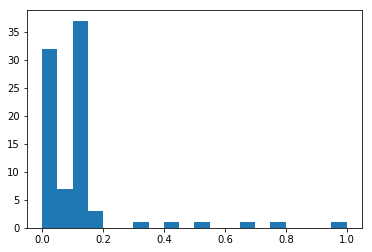

In [16]:
missing_data = azdias.isnull().mean()
missing_data.sort_values(ascending=False).head()
plt.hist(missing_data, bins=20)

In [17]:
missing_data.sort_values(ascending=False).head(20)

TITEL_KZ          0.997576
AGER_TYP          0.769554
KK_KUNDENTYP      0.655967
KBA05_BAUMAX      0.534687
GEBURTSJAHR       0.440203
ALTER_HH          0.348137
REGIOTYP          0.177357
KKK               0.177357
W_KEIT_KIND_HH    0.166051
KBA05_ANTG4       0.149597
KBA05_GBZ         0.149597
MOBI_REGIO        0.149597
KBA05_ANTG1       0.149597
KBA05_ANTG2       0.149597
KBA05_ANTG3       0.149597
PLZ8_GBZ          0.130736
PLZ8_HHZ          0.130736
PLZ8_BAUMAX       0.130736
PLZ8_ANTG4        0.130736
PLZ8_ANTG1        0.130736
dtype: float64

It looks like there are only 6 columns that have more than 20% missing data. We will remove these columns

In [18]:
# Remove the outlier columns from the dataset. (You'll perform other data
# engineering tasks such as re-encoding and imputation later.)
missing_data.describe()

count    85.000000
mean      0.110541
std       0.164498
min       0.000000
25%       0.000000
50%       0.104517
75%       0.130736
max       0.997576
dtype: float64

In [19]:
# Interquartile range
outlier_point = 0.130736 + ((0.130736 - 0.104517) * 1.5)
print('Remove columns with more than', round(outlier_point,2) * 100,'% of data')

Remove columns with more than 17.0 % of data


Using the interquartile range to remove the outloer columns, it looks like 'REGIOTYP' and 'KKK' are too close to the middle 50% of the data. The histogram show majority of columns have less than 20% missing data. We will use 20% as the cut off point.

Get list of columns to remove

In [20]:
outlier_point = 0.2
missing_column = missing_data[missing_data > outlier_point]
missing_column

AGER_TYP        0.769554
GEBURTSJAHR     0.440203
TITEL_KZ        0.997576
ALTER_HH        0.348137
KK_KUNDENTYP    0.655967
KBA05_BAUMAX    0.534687
dtype: float64

In [21]:
missing_column.index

Index(['AGER_TYP', 'GEBURTSJAHR', 'TITEL_KZ', 'ALTER_HH', 'KK_KUNDENTYP',
       'KBA05_BAUMAX'],
      dtype='object')

Remove columns

In [22]:
azdias = azdias.drop(missing_column.index,axis='columns')
azdias.columns

Index(['ALTERSKATEGORIE_GROB', 'ANREDE_KZ', 'CJT_GESAMTTYP',
       'FINANZ_MINIMALIST', 'FINANZ_SPARER', 'FINANZ_VORSORGER',
       'FINANZ_ANLEGER', 'FINANZ_UNAUFFAELLIGER', 'FINANZ_HAUSBAUER',
       'FINANZTYP', 'GFK_URLAUBERTYP', 'GREEN_AVANTGARDE', 'HEALTH_TYP',
       'LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB', 'LP_FAMILIE_FEIN',
       'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB',
       'NATIONALITAET_KZ', 'PRAEGENDE_JUGENDJAHRE', 'RETOURTYP_BK_S',
       'SEMIO_SOZ', 'SEMIO_FAM', 'SEMIO_REL', 'SEMIO_MAT', 'SEMIO_VERT',
       'SEMIO_LUST', 'SEMIO_ERL', 'SEMIO_KULT', 'SEMIO_RAT', 'SEMIO_KRIT',
       'SEMIO_DOM', 'SEMIO_KAEM', 'SEMIO_PFLICHT', 'SEMIO_TRADV',
       'SHOPPER_TYP', 'SOHO_KZ', 'VERS_TYP', 'ZABEOTYP', 'ANZ_PERSONEN',
       'ANZ_TITEL', 'HH_EINKOMMEN_SCORE', 'W_KEIT_KIND_HH', 'WOHNDAUER_2008',
       'ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL', 'GEBAEUDETYP', 'KONSUMNAEHE',
       'MIN_GEBAEUDEJAHR', 'OST_WEST_KZ', 'WOHNLAGE', 'CAMEO_DEUG_2015',
       'CAMEO

#### Discussion 1.1.2: Assess Missing Data in Each Column

(Double click this cell and replace this text with your own text, reporting your observations regarding the amount of missing data in each column. Are there any patterns in missing values? Which columns were removed from the dataset?)


There were six columns that were removed with more more than 20% missing data. The dataframe was first converted to NaN if the column contained the missing data value from another dataframe as a dictionary. Then a new dataframe was created to indicate if the value is missing data as a bolean in order to plot the missing data for all the columns. Next, columns with significant missing data were removed. Typically, using the ICQ (Interquartile Range) is used to indicate a cut off point for the outliers but we found that 'REGIOTYP' and 'KKK' were too close to the middle 50% of the data. The histogram showed majority of columns have less than 20% missing data so we used 20% as the cut off point.

In the end, 'AGER_TYP', 'GEBURTSJAHR', 'TITEL_KZ', 'ALTER_HH', 'KK_KUNDENTYP', and'KBA05_BAUMAX' columns were removed for having at least 20% missing data

It is hard to see the pattern with the missing values

**Below are the columns remove and what data they contain**

### 1.1. AGER_TYP
Best-ager typology

### 1.7. GEBURTSJAHR
Year of birth

### 1.23. TITEL_KZ
Academic title flag

### 2.1. ALTER_HH
Birthdate of head of household

### 2.5. KK_KUNDENTYP
Consumer pattern over past 12 months

### 5.5. KBA05_BAUMAX
Most common building type within the microcell

#### Step 1.1.3: Assess Missing Data in Each Row

Now, you'll perform a similar assessment for the rows of the dataset. How much data is missing in each row? As with the columns, you should see some groups of points that have a very different numbers of missing values. Divide the data into two subsets: one for data points that are above some threshold for missing values, and a second subset for points below that threshold.

In order to know what to do with the outlier rows, we should see if the distribution of data values on columns that are not missing data (or are missing very little data) are similar or different between the two groups. Select at least five of these columns and compare the distribution of values.
- You can use seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function to create a bar chart of code frequencies and matplotlib's [`subplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) function to put bar charts for the two subplots side by side.
- To reduce repeated code, you might want to write a function that can perform this comparison, taking as one of its arguments a column to be compared.

Depending on what you observe in your comparison, this will have implications on how you approach your conclusions later in the analysis. If the distributions of non-missing features look similar between the data with many missing values and the data with few or no missing values, then we could argue that simply dropping those points from the analysis won't present a major issue. On the other hand, if the data with many missing values looks very different from the data with few or no missing values, then we should make a note on those data as special. We'll revisit these data later on. **Either way, you should continue your analysis for now using just the subset of the data with few or no missing values.**

In [23]:
# How much data is missing in each row of the dataset?

Create column 'full_count' of rows. The max is 79 columns.

In [24]:
column_count = azdias.shape[1]
column_count

79

In [25]:
azdias['full_count'] = azdias.apply(lambda x: x.count(), axis=1)

In [26]:
azdias.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SHOPPER_TYP,SOHO_KZ,VERS_TYP,ZABEOTYP,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,GEBAEUDETYP,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,WOHNLAGE,CAMEO_DEUG_2015,CAMEO_DEU_2015,CAMEO_INTL_2015,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,full_count
0,2.0,1,2.0,3,4,3,5,5,3,4,10.0,0,NaN,15.0,4.0,2.0,2.0,1.0,1.0,NaN,NaN,5.0,2,6,7,5,1,5,3,3,4,7,6,6,5,3,NaN,NaN,NaN,3,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36
1,1.0,2,5.0,1,5,2,5,4,5,1,10.0,0,3.0,21.0,6.0,5.0,3.0,2.0,1.0,1.0,14.0,1.0,5,4,4,3,1,2,2,3,6,4,7,4,7,6,3.0,1.0,2.0,5,2.0,0.0,6.0,3.0,9.0,11.0,0.0,8.0,1.0,1992.0,W,4.0,8,8A,51,0.0,0.0,0.0,2.0,1.0,6.0,3.0,8.0,3.0,2.0,1.0,3.0,3.0,963.0,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0,79
2,3.0,2,3.0,1,4,1,2,3,5,1,10.0,1,3.0,3.0,1.0,1.0,1.0,3.0,2.0,1.0,15.0,3.0,4,1,3,3,4,4,6,3,4,7,7,7,3,3,2.0,0.0,1.0,5,1.0,0.0,4.0,3.0,9.0,10.0,0.0,1.0,5.0,1992.0,W,2.0,4,4C,24,1.0,3.0,1.0,0.0,3.0,2.0,4.0,4.0,4.0,2.0,3.0,2.0,2.0,712.0,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0,79
3,4.0,2,2.0,4,2,5,2,1,2,6,1.0,0,2.0,NaN,NaN,NaN,NaN,9.0,4.0,1.0,8.0,2.0,5,1,2,1,4,4,7,4,3,4,4,5,4,4,1.0,0.0,1.0,3,0.0,0.0,1.0,NaN,9.0,1.0,0.0,1.0,4.0,1997.0,W,7.0,2,2A,12,4.0,1.0,0.0,0.0,4.0,4.0,2.0,6.0,4.0,NaN,4.0,1.0,NaN,596.0,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0,72
4,3.0,1,5.0,4,3,4,1,3,2,5,5.0,0,3.0,32.0,10.0,10.0,5.0,3.0,2.0,1.0,8.0,5.0,6,4,4,2,7,4,4,6,2,3,2,2,4,2,2.0,0.0,2.0,4,4.0,0.0,5.0,2.0,9.0,3.0,0.0,1.0,4.0,1992.0,W,3.0,6,6B,43,1.0,4.0,1.0,0.0,3.0,2.0,5.0,1.0,5.0,3.0,3.0,5.0,5.0,435.0,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0,79


Create column 'full_count_pct' of row percentage. 

In [27]:
azdias['full_count_pct'] = round(azdias['full_count']/column_count,2) * 100
azdias.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SHOPPER_TYP,SOHO_KZ,VERS_TYP,ZABEOTYP,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,GEBAEUDETYP,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,WOHNLAGE,CAMEO_DEUG_2015,CAMEO_DEU_2015,CAMEO_INTL_2015,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,full_count,full_count_pct
0,2.0,1,2.0,3,4,3,5,5,3,4,10.0,0,NaN,15.0,4.0,2.0,2.0,1.0,1.0,NaN,NaN,5.0,2,6,7,5,1,5,3,3,4,7,6,6,5,3,NaN,NaN,NaN,3,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,46.0
1,1.0,2,5.0,1,5,2,5,4,5,1,10.0,0,3.0,21.0,6.0,5.0,3.0,2.0,1.0,1.0,14.0,1.0,5,4,4,3,1,2,2,3,6,4,7,4,7,6,3.0,1.0,2.0,5,2.0,0.0,6.0,3.0,9.0,11.0,0.0,8.0,1.0,1992.0,W,4.0,8,8A,51,0.0,0.0,0.0,2.0,1.0,6.0,3.0,8.0,3.0,2.0,1.0,3.0,3.0,963.0,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0,79,100.0
2,3.0,2,3.0,1,4,1,2,3,5,1,10.0,1,3.0,3.0,1.0,1.0,1.0,3.0,2.0,1.0,15.0,3.0,4,1,3,3,4,4,6,3,4,7,7,7,3,3,2.0,0.0,1.0,5,1.0,0.0,4.0,3.0,9.0,10.0,0.0,1.0,5.0,1992.0,W,2.0,4,4C,24,1.0,3.0,1.0,0.0,3.0,2.0,4.0,4.0,4.0,2.0,3.0,2.0,2.0,712.0,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0,79,100.0
3,4.0,2,2.0,4,2,5,2,1,2,6,1.0,0,2.0,NaN,NaN,NaN,NaN,9.0,4.0,1.0,8.0,2.0,5,1,2,1,4,4,7,4,3,4,4,5,4,4,1.0,0.0,1.0,3,0.0,0.0,1.0,NaN,9.0,1.0,0.0,1.0,4.0,1997.0,W,7.0,2,2A,12,4.0,1.0,0.0,0.0,4.0,4.0,2.0,6.0,4.0,NaN,4.0,1.0,NaN,596.0,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0,72,91.0
4,3.0,1,5.0,4,3,4,1,3,2,5,5.0,0,3.0,32.0,10.0,10.0,5.0,3.0,2.0,1.0,8.0,5.0,6,4,4,2,7,4,4,6,2,3,2,2,4,2,2.0,0.0,2.0,4,4.0,0.0,5.0,2.0,9.0,3.0,0.0,1.0,4.0,1992.0,W,3.0,6,6B,43,1.0,4.0,1.0,0.0,3.0,2.0,5.0,1.0,5.0,3.0,3.0,5.0,5.0,435.0,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0,79,100.0


Plot full_count_pct

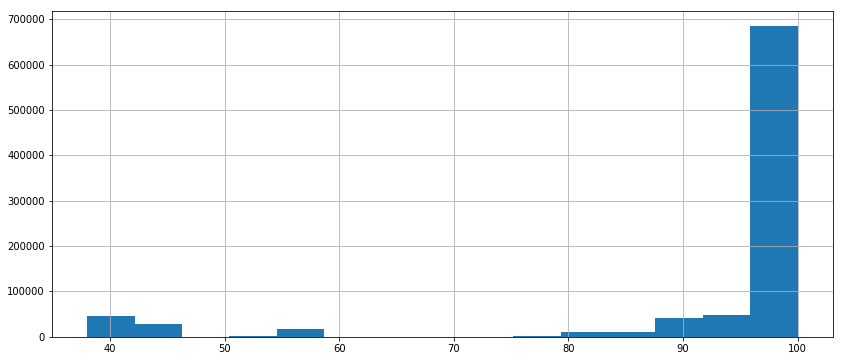

In [28]:
azdias['full_count_pct'].hist(bins=15, figsize=[14,6])

Get percentile for 'full_count_pct'

In [29]:
azdias['full_count_pct'].describe()

count    891221.000000
mean         92.878294
std          16.632357
min          38.000000
25%          96.000000
50%         100.000000
75%         100.000000
max         100.000000
Name: full_count_pct, dtype: float64

Get percentile for 'full_count'

In [30]:
azdias['full_count'].describe()

count    891221.000000
mean         73.350106
std          13.234687
min          30.000000
25%          76.000000
50%          79.000000
75%          79.000000
max          79.000000
Name: full_count, dtype: float64

Get percentile for under 50%

In [31]:
azdias['full_count'].describe(percentiles=[0.001,0.025,0.05,0.1,0.15,0.2,0.3,0.4,0.5])

count    891221.000000
mean         73.350106
std          13.234687
min          30.000000
0.1%         32.000000
2.5%         32.000000
5%           32.000000
10%          45.000000
15%          71.000000
20%          74.000000
30%          78.000000
40%          79.000000
50%          79.000000
max          79.000000
Name: full_count, dtype: float64

In [32]:
azdias['full_count_pct'].describe(percentiles=[0.001,0.025,0.05,0.1,0.15,0.2,0.3,0.4,0.5])

count    891221.000000
mean         92.878294
std          16.632357
min          38.000000
0.1%         41.000000
2.5%         41.000000
5%           41.000000
10%          57.000000
15%          90.000000
20%          94.000000
30%          99.000000
40%         100.000000
50%         100.000000
max         100.000000
Name: full_count_pct, dtype: float64

In [33]:
# List of columns with full data
azdias[(azdias['full_count_pct'] == 100.0)].count()

ALTERSKATEGORIE_GROB     623209
ANREDE_KZ                623209
CJT_GESAMTTYP            623209
FINANZ_MINIMALIST        623209
FINANZ_SPARER            623209
FINANZ_VORSORGER         623209
FINANZ_ANLEGER           623209
FINANZ_UNAUFFAELLIGER    623209
FINANZ_HAUSBAUER         623209
FINANZTYP                623209
GFK_URLAUBERTYP          623209
GREEN_AVANTGARDE         623209
HEALTH_TYP               623209
LP_LEBENSPHASE_FEIN      623209
LP_LEBENSPHASE_GROB      623209
LP_FAMILIE_FEIN          623209
LP_FAMILIE_GROB          623209
LP_STATUS_FEIN           623209
LP_STATUS_GROB           623209
NATIONALITAET_KZ         623209
PRAEGENDE_JUGENDJAHRE    623209
RETOURTYP_BK_S           623209
SEMIO_SOZ                623209
SEMIO_FAM                623209
SEMIO_REL                623209
SEMIO_MAT                623209
SEMIO_VERT               623209
SEMIO_LUST               623209
SEMIO_ERL                623209
SEMIO_KULT               623209
                          ...  
WOHNLAGE

In [34]:
# Percentage of rows with complete data
len(azdias[(azdias['full_count_pct'] == 100.0)])/len(azdias)

0.6992754883468859

In [35]:
# Write code to divide the data into two subsets based on the number of missing
# values in each row.
azdias_below = azdias[azdias.full_count_pct < 90.0]
print(azdias_below.shape)
azdias_below.head()

(119520, 81)


,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SHOPPER_TYP,SOHO_KZ,VERS_TYP,ZABEOTYP,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,GEBAEUDETYP,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,WOHNLAGE,CAMEO_DEUG_2015,CAMEO_DEU_2015,CAMEO_INTL_2015,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,full_count,full_count_pct
0,2.0,1,2.0,3,4,3,5,5,3,4,10.0,0,NaN,15.0,4.0,2.0,2.0,1.0,1.0,NaN,NaN,5.0,2,6,7,5,1,5,3,3,4,7,6,6,5,3,NaN,NaN,NaN,3,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,46.0
11,2.0,1,6.0,3,4,3,5,5,3,4,5.0,0,NaN,NaN,NaN,NaN,NaN,5.0,2.0,NaN,NaN,3.0,2,6,7,5,1,5,3,3,4,7,6,6,5,3,NaN,NaN,NaN,3,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,41.0
14,3.0,1,6.0,3,4,3,5,5,3,4,5.0,0,NaN,NaN,NaN,NaN,NaN,5.0,2.0,NaN,NaN,3.0,2,6,7,5,1,5,3,3,4,7,6,6,5,3,NaN,NaN,NaN,3,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,41.0
17,2.0,1,6.0,3,4,3,5,5,3,4,5.0,0,NaN,NaN,NaN,NaN,NaN,5.0,2.0,NaN,NaN,3.0,2,6,7,5,1,5,3,3,4,7,6,6,5,3,NaN,NaN,NaN,3,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,41.0
20,2.0,2,4.0,4,3,1,4,5,1,3,11.0,1,3.0,10.0,3.0,1.0,1.0,10.0,5.0,1.0,11.0,5.0,2,5,4,3,2,2,5,3,6,7,6,5,5,7,1.0,0.0,1.0,3,1.0,0.0,2.0,3.0,4.0,1.0,0.0,3.0,5.0,2002.0,W,5.0,4,4C,24,1.0,0.0,0.0,0.0,5.0,5.0,2.0,6.0,1.0,NaN,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,1.0,69,87.0


In [36]:
azdias_above = azdias[azdias.full_count_pct  >= 90.0]
print(azdias_above.shape)
azdias_above.head()

(771701, 81)


,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SHOPPER_TYP,SOHO_KZ,VERS_TYP,ZABEOTYP,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,GEBAEUDETYP,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,WOHNLAGE,CAMEO_DEUG_2015,CAMEO_DEU_2015,CAMEO_INTL_2015,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,full_count,full_count_pct
1,1.0,2,5.0,1,5,2,5,4,5,1,10.0,0,3.0,21.0,6.0,5.0,3.0,2.0,1.0,1.0,14.0,1.0,5,4,4,3,1,2,2,3,6,4,7,4,7,6,3.0,1.0,2.0,5,2.0,0.0,6.0,3.0,9.0,11.0,0.0,8.0,1.0,1992.0,W,4.0,8,8A,51,0.0,0.0,0.0,2.0,1.0,6.0,3.0,8.0,3.0,2.0,1.0,3.0,3.0,963.0,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0,79,100.0
2,3.0,2,3.0,1,4,1,2,3,5,1,10.0,1,3.0,3.0,1.0,1.0,1.0,3.0,2.0,1.0,15.0,3.0,4,1,3,3,4,4,6,3,4,7,7,7,3,3,2.0,0.0,1.0,5,1.0,0.0,4.0,3.0,9.0,10.0,0.0,1.0,5.0,1992.0,W,2.0,4,4C,24,1.0,3.0,1.0,0.0,3.0,2.0,4.0,4.0,4.0,2.0,3.0,2.0,2.0,712.0,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0,79,100.0
3,4.0,2,2.0,4,2,5,2,1,2,6,1.0,0,2.0,NaN,NaN,NaN,NaN,9.0,4.0,1.0,8.0,2.0,5,1,2,1,4,4,7,4,3,4,4,5,4,4,1.0,0.0,1.0,3,0.0,0.0,1.0,NaN,9.0,1.0,0.0,1.0,4.0,1997.0,W,7.0,2,2A,12,4.0,1.0,0.0,0.0,4.0,4.0,2.0,6.0,4.0,NaN,4.0,1.0,NaN,596.0,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0,72,91.0
4,3.0,1,5.0,4,3,4,1,3,2,5,5.0,0,3.0,32.0,10.0,10.0,5.0,3.0,2.0,1.0,8.0,5.0,6,4,4,2,7,4,4,6,2,3,2,2,4,2,2.0,0.0,2.0,4,4.0,0.0,5.0,2.0,9.0,3.0,0.0,1.0,4.0,1992.0,W,3.0,6,6B,43,1.0,4.0,1.0,0.0,3.0,2.0,5.0,1.0,5.0,3.0,3.0,5.0,5.0,435.0,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0,79,100.0
5,1.0,2,2.0,3,1,5,2,2,5,2,1.0,0,3.0,8.0,2.0,1.0,1.0,4.0,2.0,1.0,3.0,3.0,2,4,7,4,2,2,2,5,7,4,4,4,7,6,0.0,0.0,2.0,4,1.0,0.0,5.0,6.0,9.0,5.0,0.0,1.0,5.0,1992.0,W,7.0,8,8C,54,2.0,2.0,0.0,0.0,4.0,6.0,2.0,7.0,4.0,4.0,4.0,1.0,5.0,1300.0,2.0,3.0,1.0,1.0,1.0,5.0,5.0,2.0,3.0,3.0,79,100.0


[How to add title to seaborb boxplot](https://stackoverflow.com/questions/42406233/how-to-add-title-to-seaborn-boxplot)

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


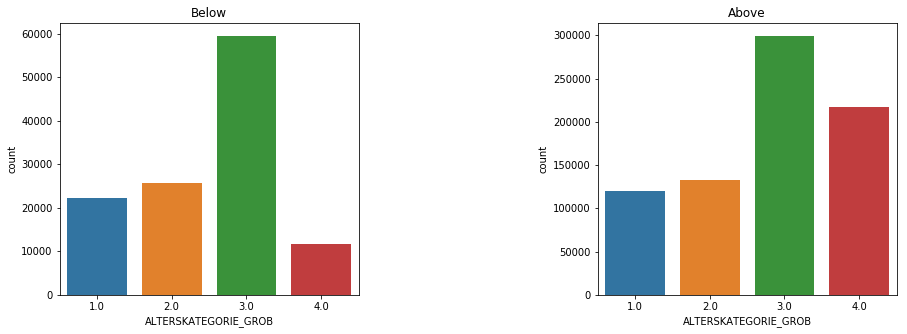

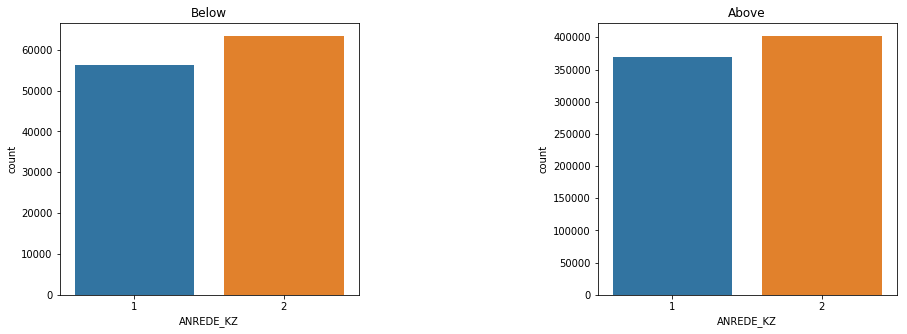

In [37]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.
# Column 1
fig, ax = plt.subplots(1,2,figsize=(15, 5))
fig.subplots_adjust(hspace=0.5, wspace=0.8)

subtitle1 = 'Below'
subtitle2 = 'Above'
    
sns.countplot(azdias_below['ALTERSKATEGORIE_GROB'],ax=ax[0]).set_title(subtitle1)
sns.countplot(azdias_above['ALTERSKATEGORIE_GROB'],ax=ax[1]).set_title(subtitle2)

# Column 2
fig, ax = plt.subplots(1,2,figsize=(15, 5))
fig.subplots_adjust(hspace=0.5, wspace=0.8)

subtitle1 = 'Below'
subtitle2 = 'Above'
    
sns.countplot(azdias_below['ANREDE_KZ'],ax=ax[0]).set_title(subtitle1)
sns.countplot(azdias_above['ANREDE_KZ'],ax=ax[1]).set_title(subtitle2)

fig.show();

Build a function to plot the frequencies side by side

In [38]:
def countplot_side(df_below,df_above,col1,col2,col3,col4,col5):
    fig, ax = plt.subplots(1,2,figsize=(15, 5))
    fig.subplots_adjust(hspace=0.5, wspace=0.8)

    subtitle1 = 'Below'
    subtitle2 = 'Above'
    
    sns.countplot(azdias_below[col1],ax=ax[0]).set_title(subtitle1)
    sns.countplot(azdias_above[col1],ax=ax[1]).set_title(subtitle2)

    # Column 2
    fig, ax = plt.subplots(1,2,figsize=(15, 5))
    fig.subplots_adjust(hspace=0.5, wspace=0.8)
    sns.countplot(azdias_below[col2],ax=ax[0]).set_title(subtitle1)
    sns.countplot(azdias_above[col2],ax=ax[1]).set_title(subtitle2)
    
    # Column 3
    fig, ax = plt.subplots(1,2,figsize=(15, 5))
    fig.subplots_adjust(hspace=0.5, wspace=0.8)
    sns.countplot(azdias_below[col3],ax=ax[0]).set_title(subtitle1)
    sns.countplot(azdias_above[col3],ax=ax[1]).set_title(subtitle2)
    
    # Column 4
    fig, ax = plt.subplots(1,2,figsize=(15, 5))
    fig.subplots_adjust(hspace=0.5, wspace=0.8)
    sns.countplot(azdias_below[col4],ax=ax[0]).set_title(subtitle1)
    sns.countplot(azdias_above[col4],ax=ax[1]).set_title(subtitle2)
    
    
    # Column 5
    fig, ax = plt.subplots(1,2,figsize=(15, 5))
    fig.subplots_adjust(hspace=0.5, wspace=0.8)
    sns.countplot(azdias_below[col5],ax=ax[0]).set_title(subtitle1)
    sns.countplot(azdias_above[col5],ax=ax[1]).set_title(subtitle2)

    fig.show();

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


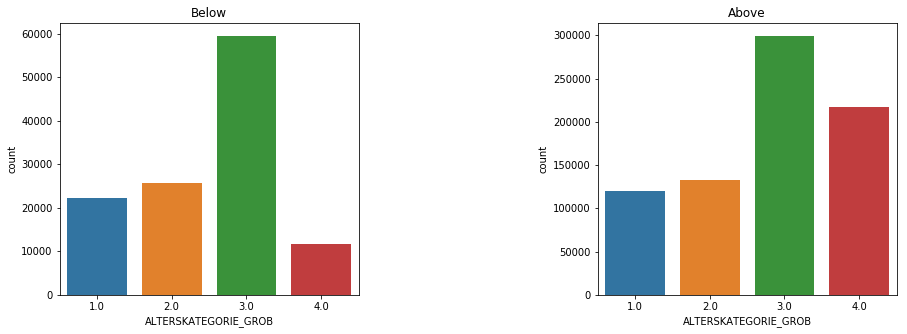

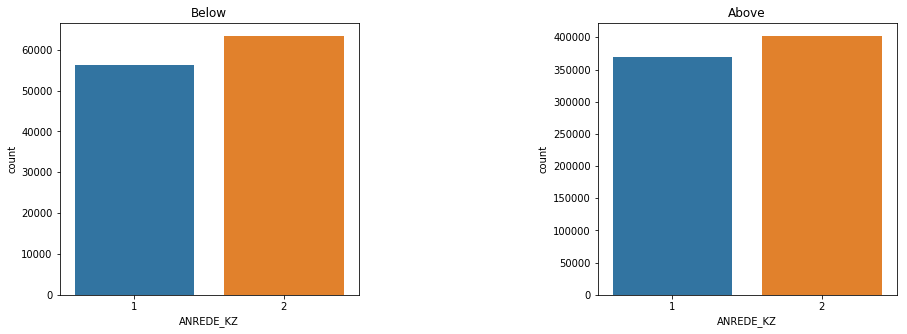

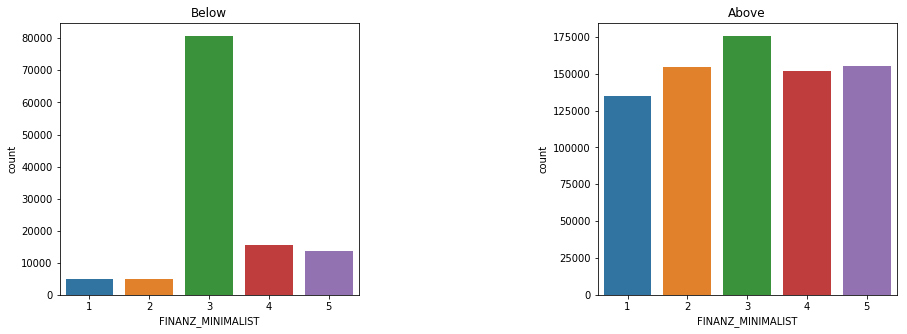

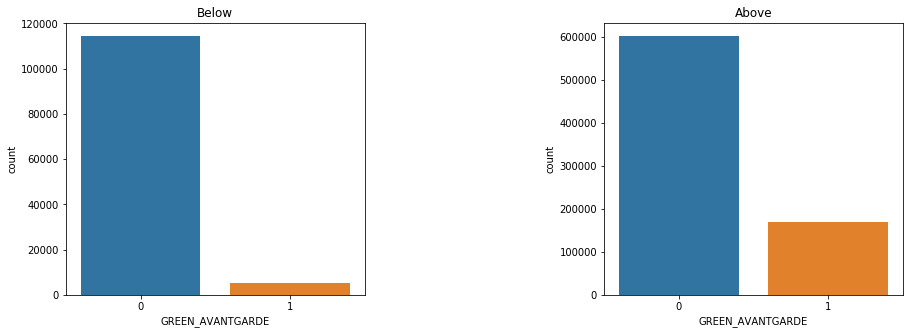

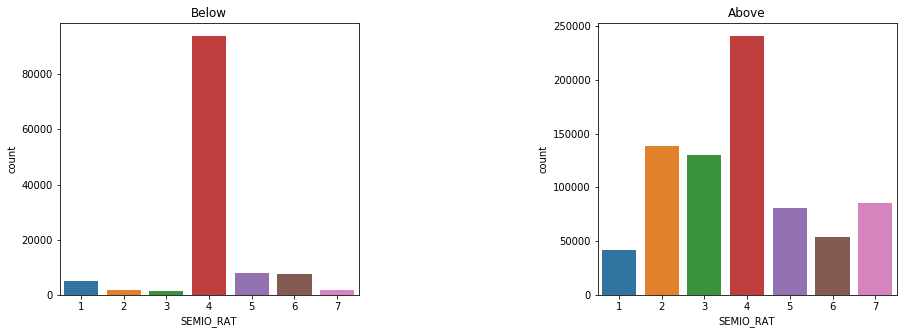

In [39]:
countplot_side(azdias_below,azdias_above,'ALTERSKATEGORIE_GROB','ANREDE_KZ','FINANZ_MINIMALIST', 'GREEN_AVANTGARDE','SEMIO_RAT')

Columns 'ALTERSKATEGORIE_GROB','ANREDE_KZ','FINANZ_MINIMALIST', 'GREEN_AVANTGARDE',and 'SEMIO_RAT' were selected and compared side by side. FINANZ_MINIMALIST','ALTERSKATEGORIE_GROB', and 'SEMIO_RAT' show differences between the two dataframes while the rest show similarities in the distribution.

#### Discussion 1.1.3: Assess Missing Data in Each Row

(Double-click this cell and replace this text with your own text, reporting your observations regarding missing data in rows. Are the data with lots of missing values are qualitatively different from data with few or no missing values?)

There are about 70% of the dataset or 623209 rows with complete columns even after removing 6 columns in the prior section. The remaining 30% have at least one column with missing data. The bottom 15% of the data is missing less than 90% of the columns with full data. I picked the 90% cut off point for the dataset azdias_above which will be used for the clustering section.

### Step 1.2: Select and Re-Encode Features

Checking for missing data isn't the only way in which you can prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, you need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values. Check the third column of the feature summary (`feat_info`) for a summary of types of measurement.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In the first two parts of this sub-step, you will perform an investigation of the categorical and mixed-type features and make a decision on each of them, whether you will keep, drop, or re-encode each. Then, in the last part, you will create a new data frame with only the selected and engineered columns.

Data wrangling is often the trickiest part of the data analysis process, and there's a lot of it to be done here. But stick with it: once you're done with this step, you'll be ready to get to the machine learning parts of the project!

In [40]:
# How many features are there of each data type?
feat_info.type

0     categorical
1         ordinal
2     categorical
3     categorical
4         ordinal
5         ordinal
6         ordinal
7         ordinal
8         ordinal
9         ordinal
10    categorical
11        numeric
12    categorical
13    categorical
14        ordinal
15          mixed
16          mixed
17    categorical
18    categorical
19    categorical
20    categorical
21    categorical
22          mixed
23        ordinal
24        ordinal
25        ordinal
26        ordinal
27        ordinal
28        ordinal
29        ordinal
         ...     
55    categorical
56          mixed
57    categorical
58    categorical
59          mixed
60        ordinal
61        ordinal
62        ordinal
63        ordinal
64          mixed
65        ordinal
66        ordinal
67        ordinal
68        ordinal
69        ordinal
70        ordinal
71        ordinal
72        ordinal
73        ordinal
74        numeric
75        ordinal
76        ordinal
77        ordinal
78        ordinal
79        

In [41]:
feat_info.dtypes.value_counts()

object    4
dtype: int64

In [42]:
feat_info.type.value_counts()

ordinal        49
categorical    21
mixed           7
numeric         7
interval        1
Name: type, dtype: int64

There are 49 ordinal, 21 categorical, 7 numeric, 1 mixed, and 1 interval column types.

In [43]:
# List of categorical columns
feat_info[feat_info['type'] == 'categorical']

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1, 0]"
2,ANREDE_KZ,person,categorical,"[-1, 0]"
3,CJT_GESAMTTYP,person,categorical,[0]
10,FINANZTYP,person,categorical,[-1]
12,GFK_URLAUBERTYP,person,categorical,[]
13,GREEN_AVANTGARDE,person,categorical,[]
17,LP_FAMILIE_FEIN,person,categorical,[0]
18,LP_FAMILIE_GROB,person,categorical,[0]
19,LP_STATUS_FEIN,person,categorical,[0]
20,LP_STATUS_GROB,person,categorical,[0]


In [44]:
# List of mixed columns
feat_info[feat_info['type'] == 'mixed']

,attribute,information_level,type,missing_or_unknown
15,LP_LEBENSPHASE_FEIN,person,mixed,[0]
16,LP_LEBENSPHASE_GROB,person,mixed,[0]
22,PRAEGENDE_JUGENDJAHRE,person,mixed,"[-1, 0]"
56,WOHNLAGE,building,mixed,[-1]
59,CAMEO_INTL_2015,microcell_rr4,mixed,"[-1, XX]"
64,KBA05_BAUMAX,microcell_rr3,mixed,"[-1, 0]"
79,PLZ8_BAUMAX,macrocell_plz8,mixed,"[-1, 0]"


In [45]:
# List of interval columns
feat_info[feat_info['type'] == 'interval']

,attribute,information_level,type,missing_or_unknown
43,ALTER_HH,household,interval,[0]


#### Step 1.2.1: Re-Encode Categorical Features

For categorical data, you would ordinarily need to encode the levels as dummy variables. Depending on the number of categories, perform one of the following:
- For binary (two-level) categoricals that take numeric values, you can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, you need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or (to keep things straightforward) just drop them from the analysis. As always, document your choices in the Discussion section.

### Assess categorical variables: which are binary, which are multi-level, and which one needs to be re-encoded? 

In [46]:
#Check dataset again
azdias_above

,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SHOPPER_TYP,SOHO_KZ,VERS_TYP,ZABEOTYP,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,GEBAEUDETYP,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,WOHNLAGE,CAMEO_DEUG_2015,CAMEO_DEU_2015,CAMEO_INTL_2015,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,full_count,full_count_pct
1,1.0,2,5.0,1,5,2,5,4,5,1,10.0,0,3.0,21.0,6.0,5.0,3.0,2.0,1.0,1.0,14.0,1.0,5,4,4,3,1,2,2,3,6,4,7,4,7,6,3.0,1.0,2.0,5,2.0,0.0,6.0,3.0,9.0,11.0,0.0,8.0,1.0,1992.0,W,4.0,8,8A,51,0.0,0.0,0.0,2.0,1.0,6.0,3.0,8.0,3.0,2.0,1.0,3.0,3.0,963.0,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0,79,100.0
2,3.0,2,3.0,1,4,1,2,3,5,1,10.0,1,3.0,3.0,1.0,1.0,1.0,3.0,2.0,1.0,15.0,3.0,4,1,3,3,4,4,6,3,4,7,7,7,3,3,2.0,0.0,1.0,5,1.0,0.0,4.0,3.0,9.0,10.0,0.0,1.0,5.0,1992.0,W,2.0,4,4C,24,1.0,3.0,1.0,0.0,3.0,2.0,4.0,4.0,4.0,2.0,3.0,2.0,2.0,712.0,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0,79,100.0
3,4.0,2,2.0,4,2,5,2,1,2,6,1.0,0,2.0,NaN,NaN,NaN,NaN,9.0,4.0,1.0,8.0,2.0,5,1,2,1,4,4,7,4,3,4,4,5,4,4,1.0,0.0,1.0,3,0.0,0.0,1.0,NaN,9.0,1.0,0.0,1.0,4.0,1997.0,W,7.0,2,2A,12,4.0,1.0,0.0,0.0,4.0,4.0,2.0,6.0,4.0,NaN,4.0,1.0,NaN,596.0,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0,72,91.0
4,3.0,1,5.0,4,3,4,1,3,2,5,5.0,0,3.0,32.0,10.0,10.0,5.0,3.0,2.0,1.0,8.0,5.0,6,4,4,2,7,4,4,6,2,3,2,2,4,2,2.0,0.0,2.0,4,4.0,0.0,5.0,2.0,9.0,3.0,0.0,1.0,4.0,1992.0,W,3.0,6,6B,43,1.0,4.0,1.0,0.0,3.0,2.0,5.0,1.0,5.0,3.0,3.0,5.0,5.0,435.0,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0,79,100.0
5,1.0,2,2.0,3,1,5,2,2,5,2,1.0,0,3.0,8.0,2.0,1.0,1.0,4.0,2.0,1.0,3.0,3.0,2,4,7,4,2,2,2,5,7,4,4,4,7,6,0.0,0.0,2.0,4,1.0,0.0,5.0,6.0,9.0,5.0,0.0,1.0,5.0,1992.0,W,7.0,8,8C,54,2.0,2.0,0.0,0.0,4.0,6.0,2.0,7.0,4.0,4.0,4.0,1.0,5.0,1300.0,2.0,3.0,1.0,1.0,1.0,5.0,5.0,2.0,3.0,3.0,79,100.0
6,2.0,2,5.0,1,5,1,5,4,3,4,12.0,0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,10.0,4.0,2,5,5,7,2,6,5,5,7,7,4,7,7,7,1.0,0.0,1.0,4,1.0,0.0,6.0,3.0,9.0,4.0,0.0,1.0,5.0,1992.0,W,5.0,4,4A,22,3.0,2.0,0.0,0.0,3.0,6.0,4.0,3.0,5.0,3.0,5.0,2.0,5.0,867.0,3.0,3.0,1.0,0.0,1.0,5.0,5.0,4.0,6.0,3.0,79,100.0
7,1.0,1,3.0,3,3,4,1,3,2,5,9.0,0,1.0,5.0,2.0,1.0,1.0,1.0,1.0,1.0,8.0,5.0,7,7,7,5,6,2,2,7,5,1,1,2,5,5,0.0,0.0,1.0,1,1.0,0.0,4.0,5.0,9.0,6.0,0.0,8.0,3.0,1992.0,W,1.0,2,2D,14,2.0,2.0,0.0,0.0,4.0,2.0,5.0,3.0,4.0,1.0,4.0,1.0,1.0,758.0,3.0,3.0,1.0,0.0,1.0,4.0,4.0,2.0,5.0,2.0,79,100.0
8,3.0,1,3.0,4,4,2,4,2,2,6,3.0,1,3.0,10.0,3.0,1.0,1.0,10.0,5.0,1.0,11.0,4.0,4,5,4,1,5,6,4,5,2,5,5,3,1,4,3.0,0.0,2.0,6,1.0,0.0,3.0,5.0,8.0,2.0,1.0,3.0,4.0,1992.0,W,1.0,1,1A,13,1.0,1.0,0.0,0.0,5.0,3.0,4.0,4.0,4.0,1.0,3.0,2.0,3.0,511.0,2.0,3.0,2.0,1.0,1.0,3.0,3.0,2.0,4.0,3.0,79,100.0
9,3.0,2,4.0,2,4,2,3,5,4,1,12.0,1,2.0,4.0,1.0,1.0,1.0,3.0,2.0,1.0,15.0,4.0,2,1,1,3,2,6,6,3,4,7,6,7,1,3,3.0,0.0,2.0,4,1.0,0.0,4.0,4.0,3.0,9.0,0.0,3.0,4.0,1992.0,W,7.0,1,1E,15,1.0,3.0,1.0,0.0,2.0,6.0,5.0,4.0,3.0,1.0,3.0,3.0,1.0,530.0,2.0,3.0,2.0,1.0,1.0,3.0,3.0,2.0,3.0,1.0,79,100.0
10,3.0,2,1.0,2,2,5,3,1,5,6,8.0,0,2.0,6.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,5.0,5,2,3,5,5,6,6,1,4,7,4,7,5,3,2.0,0.0,2.0,3,1.0,0.0,6.0,6.0,9.0,6.0,0.0,1.0,4.0,1992.0,W,5.0,9,9D,51,0.0,4.0,1.0,0.0,2.0,6.0,4.0,4.0,5.0,4.0,1.0,1.0,7.0,424.0,2.0,4.0,2.0,0.0,2.0,3.0,3.0,4.0,6.0,5.0,79,100.0


In [47]:
azdias_above.OST_WEST_KZ.unique()

array(['W', 'O'], dtype=object)

### Re-encode categorical variable(s) to be kept in the analysis.

In [48]:
print(azdias_above.CJT_GESAMTTYP.unique())

print(azdias_above.CJT_GESAMTTYP.nunique())

[ 5.  3.  2.  4.  1.  6.]
6


In [49]:
# List of categorical columns, 
feat_info_cat = feat_info[feat_info['type'] == 'categorical']
feat_info_cat

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1, 0]"
2,ANREDE_KZ,person,categorical,"[-1, 0]"
3,CJT_GESAMTTYP,person,categorical,[0]
10,FINANZTYP,person,categorical,[-1]
12,GFK_URLAUBERTYP,person,categorical,[]
13,GREEN_AVANTGARDE,person,categorical,[]
17,LP_FAMILIE_FEIN,person,categorical,[0]
18,LP_FAMILIE_GROB,person,categorical,[0]
19,LP_STATUS_FEIN,person,categorical,[0]
20,LP_STATUS_GROB,person,categorical,[0]


In [50]:
# List of columns removed
missing_column_list = missing_column.index.tolist()
missing_column_list

['AGER_TYP',
 'GEBURTSJAHR',
 'TITEL_KZ',
 'ALTER_HH',
 'KK_KUNDENTYP',
 'KBA05_BAUMAX']

In [51]:
# Remove ['AGER_TYP' 'TITEL_KZ' 'KK_KUNDENTYP'] df = df[df['Column Name'].isin(['Value']) == False]
# feat_info_cat = feat_info_cat[feat_info_cat['attribute'].isin(['AGER_TYP','TITEL_KZ','KK_KUNDENTYP']) == False]
feat_info_cat = feat_info_cat[~feat_info_cat['attribute'].isin(missing_column_list)]
feat_info_cat

,attribute,information_level,type,missing_or_unknown
2,ANREDE_KZ,person,categorical,"[-1, 0]"
3,CJT_GESAMTTYP,person,categorical,[0]
10,FINANZTYP,person,categorical,[-1]
12,GFK_URLAUBERTYP,person,categorical,[]
13,GREEN_AVANTGARDE,person,categorical,[]
17,LP_FAMILIE_FEIN,person,categorical,[0]
18,LP_FAMILIE_GROB,person,categorical,[0]
19,LP_STATUS_FEIN,person,categorical,[0]
20,LP_STATUS_GROB,person,categorical,[0]
21,NATIONALITAET_KZ,person,categorical,"[-1, 0]"


In [52]:
# Turn into list
feat_info_cat_list = feat_info_cat['attribute'].tolist()
feat_info_cat_list

['ANREDE_KZ',
 'CJT_GESAMTTYP',
 'FINANZTYP',
 'GFK_URLAUBERTYP',
 'GREEN_AVANTGARDE',
 'LP_FAMILIE_FEIN',
 'LP_FAMILIE_GROB',
 'LP_STATUS_FEIN',
 'LP_STATUS_GROB',
 'NATIONALITAET_KZ',
 'SHOPPER_TYP',
 'SOHO_KZ',
 'VERS_TYP',
 'ZABEOTYP',
 'GEBAEUDETYP',
 'OST_WEST_KZ',
 'CAMEO_DEUG_2015',
 'CAMEO_DEU_2015']

### Identify categorical variables that are binary or multi level

Filter azdias_above to categorical variables only

In [53]:
azdias_above_cat = azdias_above[feat_info_cat_list]
azdias_above_cat.head()

,ANREDE_KZ,CJT_GESAMTTYP,FINANZTYP,GFK_URLAUBERTYP,GREEN_AVANTGARDE,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,SHOPPER_TYP,SOHO_KZ,VERS_TYP,ZABEOTYP,GEBAEUDETYP,OST_WEST_KZ,CAMEO_DEUG_2015,CAMEO_DEU_2015
1,2,5.0,1,10.0,0,5.0,3.0,2.0,1.0,1.0,3.0,1.0,2.0,5,8.0,W,8,8A
2,2,3.0,1,10.0,1,1.0,1.0,3.0,2.0,1.0,2.0,0.0,1.0,5,1.0,W,4,4C
3,2,2.0,6,1.0,0,NaN,NaN,9.0,4.0,1.0,1.0,0.0,1.0,3,1.0,W,2,2A
4,1,5.0,5,5.0,0,10.0,5.0,3.0,2.0,1.0,2.0,0.0,2.0,4,1.0,W,6,6B
5,2,2.0,2,1.0,0,1.0,1.0,4.0,2.0,1.0,0.0,0.0,2.0,4,1.0,W,8,8C


Get unique values for categorical values

In [54]:
azdias_above_cat_list = azdias_above_cat.nunique()
azdias_above_cat_list

ANREDE_KZ            2
CJT_GESAMTTYP        6
FINANZTYP            6
GFK_URLAUBERTYP     12
GREEN_AVANTGARDE     2
LP_FAMILIE_FEIN     11
LP_FAMILIE_GROB      5
LP_STATUS_FEIN      10
LP_STATUS_GROB       5
NATIONALITAET_KZ     3
SHOPPER_TYP          4
SOHO_KZ              2
VERS_TYP             2
ZABEOTYP             6
GEBAEUDETYP          7
OST_WEST_KZ          2
CAMEO_DEUG_2015      9
CAMEO_DEU_2015      44
dtype: int64

### Get binary columns

In [55]:
azdias_above_cat_binary_list = azdias_above_cat_list[azdias_above_cat_list <= 2]
azdias_above_cat_binary_list

ANREDE_KZ           2
GREEN_AVANTGARDE    2
SOHO_KZ             2
VERS_TYP            2
OST_WEST_KZ         2
dtype: int64

Convert series into dataframe and sort unique values in descending order

In [56]:
b = pd.Series(azdias_above_cat_binary_list, name = 'no_of_unique_values')
b.index.name = 'attributes'
azdias_above_cat_binary_df = b.reset_index()
azdias_above_cat_binary_df = azdias_above_cat_binary_df.sort_values(['no_of_unique_values'],ascending=[False])
azdias_above_cat_binary_df

,attributes,no_of_unique_values
0,ANREDE_KZ,2
1,GREEN_AVANTGARDE,2
2,SOHO_KZ,2
3,VERS_TYP,2
4,OST_WEST_KZ,2


### Get multi-level columns

In [57]:
azdias_above_cat_multi_list = azdias_above_cat_list[azdias_above_cat_list > 2]
azdias_above_cat_multi_list

CJT_GESAMTTYP        6
FINANZTYP            6
GFK_URLAUBERTYP     12
LP_FAMILIE_FEIN     11
LP_FAMILIE_GROB      5
LP_STATUS_FEIN      10
LP_STATUS_GROB       5
NATIONALITAET_KZ     3
SHOPPER_TYP          4
ZABEOTYP             6
GEBAEUDETYP          7
CAMEO_DEUG_2015      9
CAMEO_DEU_2015      44
dtype: int64

Convert series into dataframe and sort unique values in descending order

In [58]:
s = pd.Series(azdias_above_cat_multi_list, name = 'no_of_unique_values')
s.index.name = 'attributes'
azdias_above_cat_multi_df = s.reset_index()
azdias_above_cat_multi_df = azdias_above_cat_multi_df.sort_values(['no_of_unique_values'],ascending=[False])
azdias_above_cat_multi_df

,attributes,no_of_unique_values
12,CAMEO_DEU_2015,44
2,GFK_URLAUBERTYP,12
3,LP_FAMILIE_FEIN,11
5,LP_STATUS_FEIN,10
11,CAMEO_DEUG_2015,9
10,GEBAEUDETYP,7
0,CJT_GESAMTTYP,6
1,FINANZTYP,6
9,ZABEOTYP,6
4,LP_FAMILIE_GROB,5


In [59]:
azdias_above_cat_multi_df.describe()

,no_of_unique_values
count,13.000000
mean,9.846154
std,10.621097
min,3.000000
25%,5.000000
50%,6.000000
75%,10.000000
max,44.000000


Binary - azdias_above_cat_binary_df and Multi - azdias_above_cat_multi_df are created

### Convert binary categorical columns into binary values

Column 'OST_WEST_KZ' contains non-numeric binary values.

#### Convert binary into dummy variable. Avoid the [dummy variable trap](https://stackoverflow.com/questions/35141253/how-can-one-create-dummy-variables-in-pandas-that-do-not-have-multicollinearity)

In [60]:
azdias_above_cat_binary_df_list = azdias_above_cat_binary_df['attributes'].tolist()
azdias_above_cat_binary_df_list

['ANREDE_KZ', 'GREEN_AVANTGARDE', 'SOHO_KZ', 'VERS_TYP', 'OST_WEST_KZ']

In [61]:
#data2 = pd.get_dummies(data, columns =['job', 'marital', 'default', 'housing', 'loan', 'poutcome'])
# azdias_above = pd.get_dummies(azdias_above, columns = azdias_above_cat_binary_df_list, drop_first = True)
# azdias_above.head()

In [62]:
azdias_above_binary_cat_df = azdias_above_cat[azdias_above_cat_binary_df_list]

In [63]:
azdias_above_binary_cat_df.head()

,ANREDE_KZ,GREEN_AVANTGARDE,SOHO_KZ,VERS_TYP,OST_WEST_KZ
1,2,0,1.0,2.0,W
2,2,1,0.0,1.0,W
3,2,0,0.0,1.0,W
4,1,0,0.0,2.0,W
5,2,0,0.0,2.0,W


In [64]:
azdias_above_binary_cat_df = azdias_above_binary_cat_df.apply(pd.to_numeric, errors='ignore')
azdias_above_binary_cat_df.head()

,ANREDE_KZ,GREEN_AVANTGARDE,SOHO_KZ,VERS_TYP,OST_WEST_KZ
1,2,0,1.0,2.0,W
2,2,1,0.0,1.0,W
3,2,0,0.0,1.0,W
4,1,0,0.0,2.0,W
5,2,0,0.0,2.0,W


In [65]:
azdias_above_binary_cat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 771701 entries, 1 to 891220
Data columns (total 5 columns):
ANREDE_KZ           771701 non-null int64
GREEN_AVANTGARDE    771701 non-null int64
SOHO_KZ             771701 non-null float64
VERS_TYP            739213 non-null float64
OST_WEST_KZ         771701 non-null object
dtypes: float64(2), int64(2), object(1)
memory usage: 55.3+ MB


We see that OST_WEST_KZ cannot be converted to numeric but the rest of the binary variables that were categorical are now numeric. We will build a function later to deal with this and cannot explictly convert a column.

In [66]:
binary_cat_arr = azdias_above_binary_cat_df.select_dtypes(include=['object']).columns.values
binary_cat_arr

array(['OST_WEST_KZ'], dtype=object)

In [67]:
binary_cat_arr_list = list(binary_cat_arr)
binary_cat_arr_list

['OST_WEST_KZ']

We managed to get a list of binary columns are categorical which we need to convert into binary.

In [68]:
azdias_above[binary_cat_arr_list] = pd.get_dummies(azdias_above[binary_cat_arr_list], drop_first = True)
azdias_above[binary_cat_arr_list].head()

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,OST_WEST_KZ
1,1
2,1
3,1
4,1
5,1


In [69]:
azdias_above['OST_WEST_KZ'].unique()

array([1, 0], dtype=uint64)

Looks good

### Convert mult-level categorical columns into dummy variables

#### Convert mult-level  into dummy variable. Avoid the [dummy variable trap](https://stackoverflow.com/questions/35141253/how-can-one-create-dummy-variables-in-pandas-that-do-not-have-multicollinearity)

In [70]:
print(azdias_above_cat_multi_df['attributes'].tolist())

['CAMEO_DEU_2015', 'GFK_URLAUBERTYP', 'LP_FAMILIE_FEIN', 'LP_STATUS_FEIN', 'CAMEO_DEUG_2015', 'GEBAEUDETYP', 'CJT_GESAMTTYP', 'FINANZTYP', 'ZABEOTYP', 'LP_FAMILIE_GROB', 'LP_STATUS_GROB', 'SHOPPER_TYP', 'NATIONALITAET_KZ']


### Look at each multi-level column

Check 'CAMEO_DEU_2015'

In [71]:
azdias_above['CAMEO_DEU_2015'].unique()

array(['8A', '4C', '2A', '6B', '8C', '4A', '2D', '1A', '1E', '9D', '5C',
       '8B', '7A', '5D', '9E', '9B', '1B', '3D', nan, '4E', '4B', '3C',
       '5A', '7B', '9A', '6D', '6E', '2C', '7C', '9C', '7D', '5E', '1D',
       '8D', '6C', '6A', '5B', '4D', '3A', '2B', '7E', '3B', '6F', '5F',
       '1C'], dtype=object)

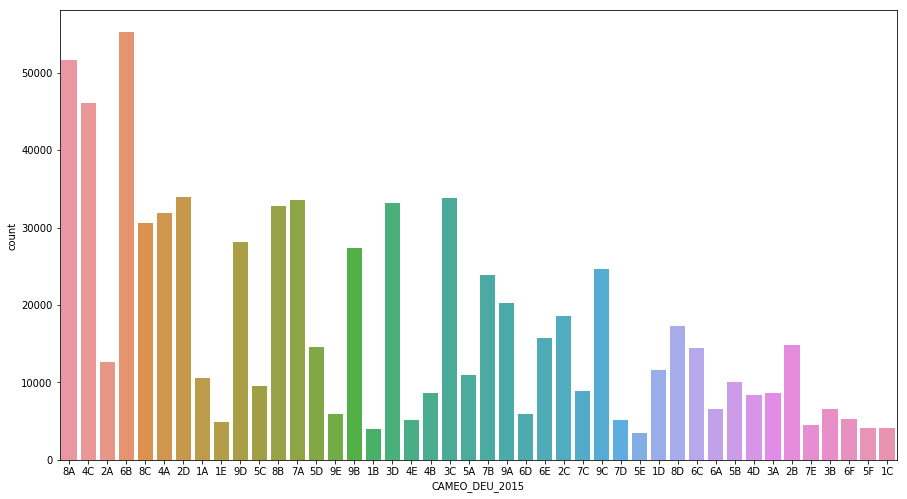

In [72]:
from matplotlib import pyplot
a4_dims = (15, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.countplot(x="CAMEO_DEU_2015", data=azdias_above)

It is not meaningful to encode 'CAMEO_DEU_2015' into binary variables. This can be dropped

In [73]:
azdias_above['GFK_URLAUBERTYP'].unique()

array([ 10.,   1.,   5.,  12.,   9.,   3.,   8.,  11.,   4.,   7.,   2.,
         6.])

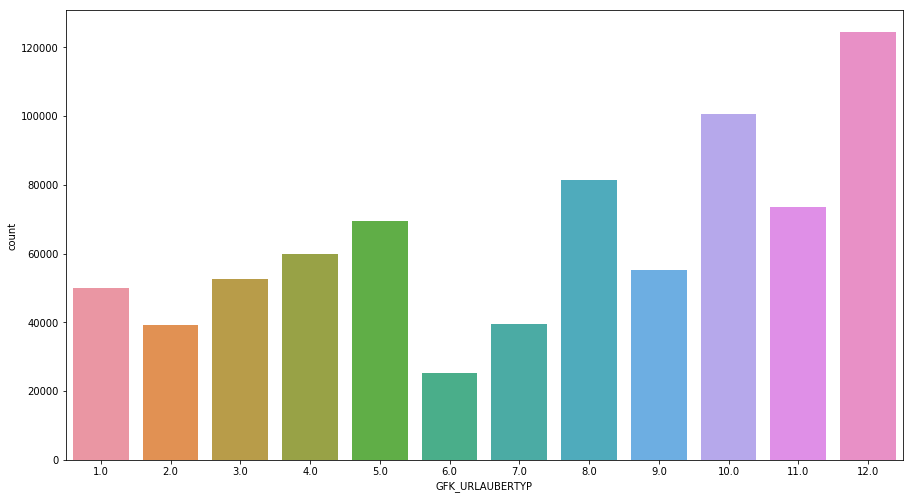

In [74]:
a4_dims = (15, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.countplot(x="GFK_URLAUBERTYP", data=azdias_above)

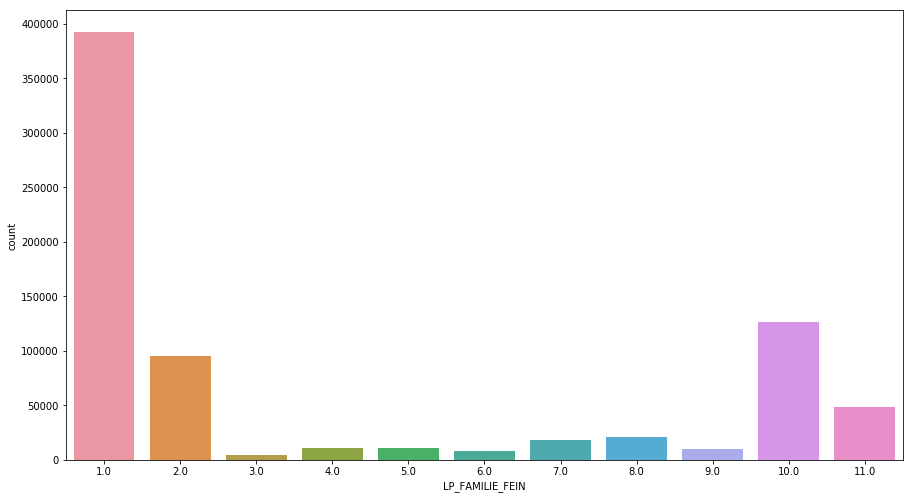

In [75]:
a4_dims = (15, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.countplot(x="LP_FAMILIE_FEIN", data=azdias_above)

It is not meaningful to encode 'LP_FAMILIE_FEIN' into binary variables. This can be dropped.

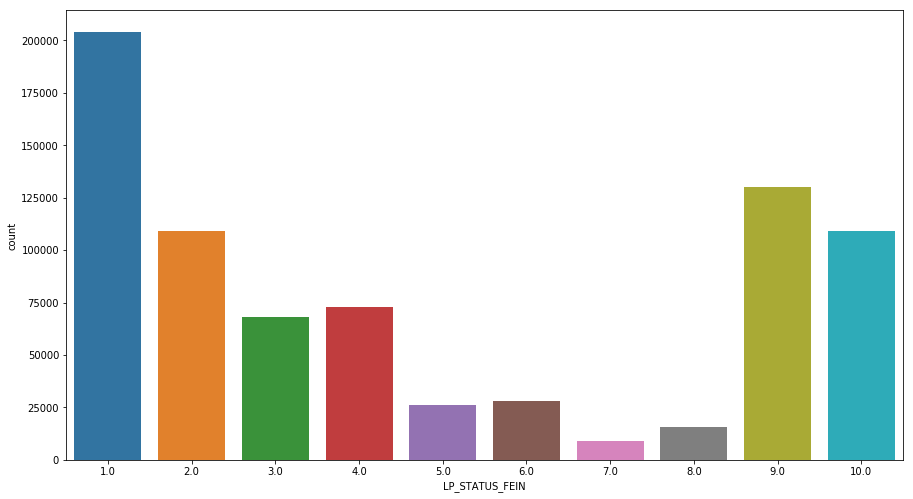

In [76]:
a4_dims = (15, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.countplot(x="LP_STATUS_FEIN", data=azdias_above)

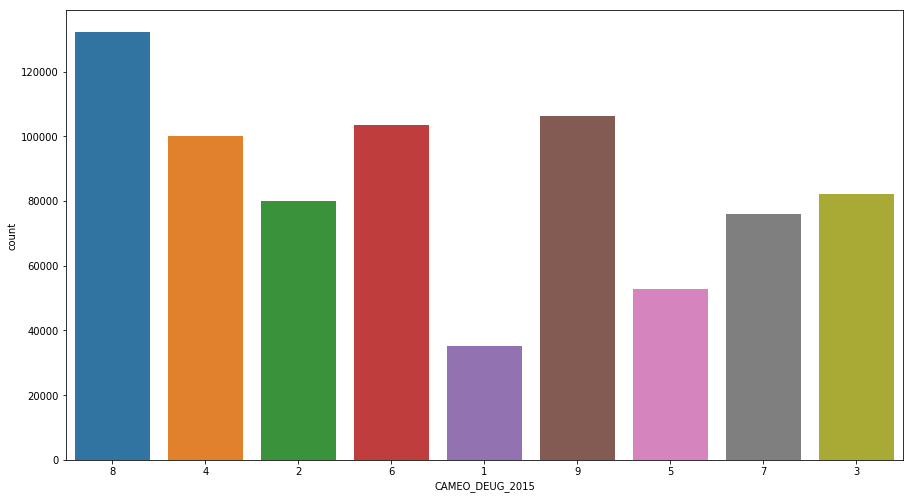

In [77]:
a4_dims = (15, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.countplot(x="CAMEO_DEUG_2015", data=azdias_above)

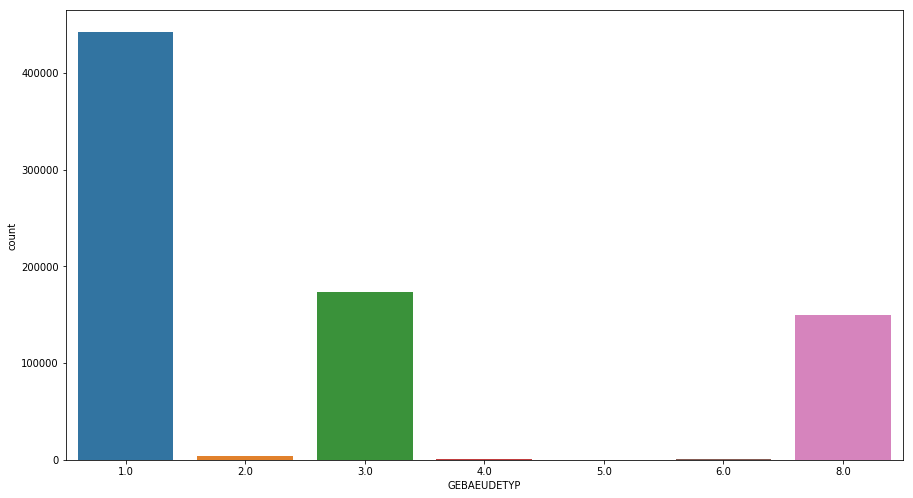

In [78]:
a4_dims = (15, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.countplot(x="GEBAEUDETYP", data=azdias_above)

Remove columns with less than 10 uniques values

In [79]:
azdias_above_cat_multi_list2 = azdias_above_cat_multi_list[azdias_above_cat_multi_list < 10]
azdias_above_cat_multi_list2

attributes
CJT_GESAMTTYP       6
FINANZTYP           6
LP_FAMILIE_GROB     5
LP_STATUS_GROB      5
NATIONALITAET_KZ    3
SHOPPER_TYP         4
ZABEOTYP            6
GEBAEUDETYP         7
CAMEO_DEUG_2015     9
dtype: int64

In [80]:
azdias_above_cat_multi_remove = azdias_above_cat_multi_list[azdias_above_cat_multi_list >= 10]

azdias_above_cat_multi_remove_list = azdias_above_cat_multi_remove.index.tolist()
azdias_above_cat_multi_remove_list

['GFK_URLAUBERTYP', 'LP_FAMILIE_FEIN', 'LP_STATUS_FEIN', 'CAMEO_DEU_2015']

Drop columns

In [81]:
azdias_above = azdias_above.drop(azdias_above_cat_multi_remove_list, axis=1)

3.3. GEBAEUDETYP
Type of building (residential vs. commercial)
- -1: unknown
-  0: unknown
-  1: residential building
-  2: residential building buildings without actually known household
-  3: mixed (=residential and company) building
-  4: mixed building without actually known household or company
-  5: company building w/o known company
-  6: mixed building without actually known household
-  7: company building
-  8: mixed building without actually known company

In [82]:
# Create decade and movement dicts
GEBAEUDETYP_DICT = {1:1,2:1,3:2,4:2,5:2,6:2,7:2,8:2} 

azdias_above['GEBAEUDETYP'] = azdias_above['GEBAEUDETYP'].map(GEBAEUDETYP_DICT)

azdias_above['GEBAEUDETYP'].value_counts().sort_index()

1    446572
2    325129
Name: GEBAEUDETYP, dtype: int64

Convert these columns into binary

In [83]:
azdias_above_cat_multi_list3 = azdias_above_cat_multi_list2.index.tolist()
azdias_above_cat_multi_list3

['CJT_GESAMTTYP',
 'FINANZTYP',
 'LP_FAMILIE_GROB',
 'LP_STATUS_GROB',
 'NATIONALITAET_KZ',
 'SHOPPER_TYP',
 'ZABEOTYP',
 'GEBAEUDETYP',
 'CAMEO_DEUG_2015']

In [84]:
azdias_above2 = pd.get_dummies(azdias_above, columns = azdias_above_cat_multi_list3, drop_first = True)
azdias_above2.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SOHO_KZ,VERS_TYP,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,WOHNLAGE,CAMEO_INTL_2015,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,full_count,full_count_pct,CJT_GESAMTTYP_2.0,CJT_GESAMTTYP_3.0,CJT_GESAMTTYP_4.0,CJT_GESAMTTYP_5.0,CJT_GESAMTTYP_6.0,FINANZTYP_2,FINANZTYP_3,FINANZTYP_4,FINANZTYP_5,FINANZTYP_6,LP_FAMILIE_GROB_2.0,LP_FAMILIE_GROB_3.0,LP_FAMILIE_GROB_4.0,LP_FAMILIE_GROB_5.0,LP_STATUS_GROB_2.0,LP_STATUS_GROB_3.0,LP_STATUS_GROB_4.0,LP_STATUS_GROB_5.0,NATIONALITAET_KZ_2.0,NATIONALITAET_KZ_3.0,SHOPPER_TYP_1.0,SHOPPER_TYP_2.0,SHOPPER_TYP_3.0,ZABEOTYP_2,ZABEOTYP_3,ZABEOTYP_4,ZABEOTYP_5,ZABEOTYP_6,GEBAEUDETYP_2,CAMEO_DEUG_2015_2,CAMEO_DEUG_2015_3,CAMEO_DEUG_2015_4,CAMEO_DEUG_2015_5,CAMEO_DEUG_2015_6,CAMEO_DEUG_2015_7,CAMEO_DEUG_2015_8,CAMEO_DEUG_2015_9
1,1.0,2,1,5,2,5,4,5,0,3.0,21.0,6.0,14.0,1.0,5,4,4,3,1,2,2,3,6,4,7,4,7,6,1.0,2.0,2.0,0.0,6.0,3.0,9.0,11.0,0.0,1.0,1992.0,1,4.0,51,0.0,0.0,0.0,2.0,1.0,6.0,3.0,8.0,3.0,2.0,1.0,3.0,3.0,963.0,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0,79,100.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0
2,3.0,2,1,4,1,2,3,5,1,3.0,3.0,1.0,15.0,3.0,4,1,3,3,4,4,6,3,4,7,7,7,3,3,0.0,1.0,1.0,0.0,4.0,3.0,9.0,10.0,0.0,5.0,1992.0,1,2.0,24,1.0,3.0,1.0,0.0,3.0,2.0,4.0,4.0,4.0,2.0,3.0,2.0,2.0,712.0,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0,79,100.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,4.0,2,4,2,5,2,1,2,0,2.0,NaN,NaN,8.0,2.0,5,1,2,1,4,4,7,4,3,4,4,5,4,4,0.0,1.0,0.0,0.0,1.0,NaN,9.0,1.0,0.0,4.0,1997.0,1,7.0,12,4.0,1.0,0.0,0.0,4.0,4.0,2.0,6.0,4.0,NaN,4.0,1.0,NaN,596.0,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0,72,91.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,3.0,1,4,3,4,1,3,2,0,3.0,32.0,10.0,8.0,5.0,6,4,4,2,7,4,4,6,2,3,2,2,4,2,0.0,2.0,4.0,0.0,5.0,2.0,9.0,3.0,0.0,4.0,1992.0,1,3.0,43,1.0,4.0,1.0,0.0,3.0,2.0,5.0,1.0,5.0,3.0,3.0,5.0,5.0,435.0,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0,79,100.0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
5,1.0,2,3,1,5,2,2,5,0,3.0,8.0,2.0,3.0,3.0,2,4,7,4,2,2,2,5,7,4,4,4,7,6,0.0,2.0,1.0,0.0,5.0,6.0,9.0,5.0,0.0,5.0,1992.0,1,7.0,54,2.0,2.0,0.0,0.0,4.0,6.0,2.0,7.0,4.0,4.0,4.0,1.0,5.0,1300.0,2.0,3.0,1.0,1.0,1.0,5.0,5.0,2.0,3.0,3.0,79,100.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [85]:
azdias_above2.shape

(771701, 105)

In [86]:
azdias_above2.columns

Index(['ALTERSKATEGORIE_GROB', 'ANREDE_KZ', 'FINANZ_MINIMALIST',
       'FINANZ_SPARER', 'FINANZ_VORSORGER', 'FINANZ_ANLEGER',
       'FINANZ_UNAUFFAELLIGER', 'FINANZ_HAUSBAUER', 'GREEN_AVANTGARDE',
       'HEALTH_TYP',
       ...
       'ZABEOTYP_6', 'GEBAEUDETYP_2', 'CAMEO_DEUG_2015_2', 'CAMEO_DEUG_2015_3',
       'CAMEO_DEUG_2015_4', 'CAMEO_DEUG_2015_5', 'CAMEO_DEUG_2015_6',
       'CAMEO_DEUG_2015_7', 'CAMEO_DEUG_2015_8', 'CAMEO_DEUG_2015_9'],
      dtype='object', length=105)

#### Discussion 1.2.1: Re-Encode Categorical Features

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding categorical features. Which ones did you keep, which did you drop, and what engineering steps did you perform?)

The columns were broken up into five columsn: ordinal[49], categorical[21], mixed[7], numeric[7],and interval[1]. There were also columns removed from the prior section - 'AGER_TYP','GEBURTSJAHR','TITEL_KZ','ALTER_HH','KK_KUNDENTYP','KBA05_BAUMAX'. The categorical variables were split into two groups: binary and multi-level. The binary variables were all numeric except one but I converted them from categorical to numeric with just one binary column that has non-numeric values (OST_WEST_KZ) which was converted into a dummy variable has 1 or 0. Next I looked at the multi-level columns found the distribution of the columns. Some columns like LP_STATUS_FEIN and LP_FAMILIE_FEIN with 10 values did not have equal distribution so any columns below 10 values were kept. Also, GEBAEUDETYP had only three distinct groups that could be split into two, residential and mixed. Finally, the remaining multi-level columns were one hot encoded.

#### Step 1.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention; the handling of the rest are up to your own choices:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).
- If you decide to keep or engineer new features around the other mixed-type features, make sure you note your steps in the Discussion section.

Be sure to check `Data_Dictionary.md` for the details needed to finish these tasks.

In [87]:
# List of mixed columns
feat_info[feat_info['type'] == 'mixed']

,attribute,information_level,type,missing_or_unknown
15,LP_LEBENSPHASE_FEIN,person,mixed,[0]
16,LP_LEBENSPHASE_GROB,person,mixed,[0]
22,PRAEGENDE_JUGENDJAHRE,person,mixed,"[-1, 0]"
56,WOHNLAGE,building,mixed,[-1]
59,CAMEO_INTL_2015,microcell_rr4,mixed,"[-1, XX]"
64,KBA05_BAUMAX,microcell_rr3,mixed,"[-1, 0]"
79,PLZ8_BAUMAX,macrocell_plz8,mixed,"[-1, 0]"


### Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.

#### 1.18. PRAEGENDE_JUGENDJAHRE
Dominating movement of person's youth (avantgarde vs. mainstream; east vs. west)
- -1: unknown
-  0: unknown
-  1: 40s - war years (Mainstream, E+W)
-  2: 40s - reconstruction years (Avantgarde, E+W)
-  3: 50s - economic miracle (Mainstream, E+W)
-  4: 50s - milk bar / Individualisation (Avantgarde, E+W)
-  5: 60s - economic miracle (Mainstream, E+W)
-  6: 60s - generation 68 / student protestors (Avantgarde, W)
-  7: 60s - opponents to the building of the Wall (Avantgarde, E)
-  8: 70s - family orientation (Mainstream, E+W)
-  9: 70s - peace movement (Avantgarde, E+W)
- 10: 80s - Generation Golf (Mainstream, W)
- 11: 80s - ecological awareness (Avantgarde, W)
- 12: 80s - FDJ / communist party youth organisation (Mainstream, E)
- 13: 80s - Swords into ploughshares (Avantgarde, E)
- 14: 90s - digital media kids (Mainstream, E+W)
- 15: 90s - ecological awareness (Avantgarde, E+W)

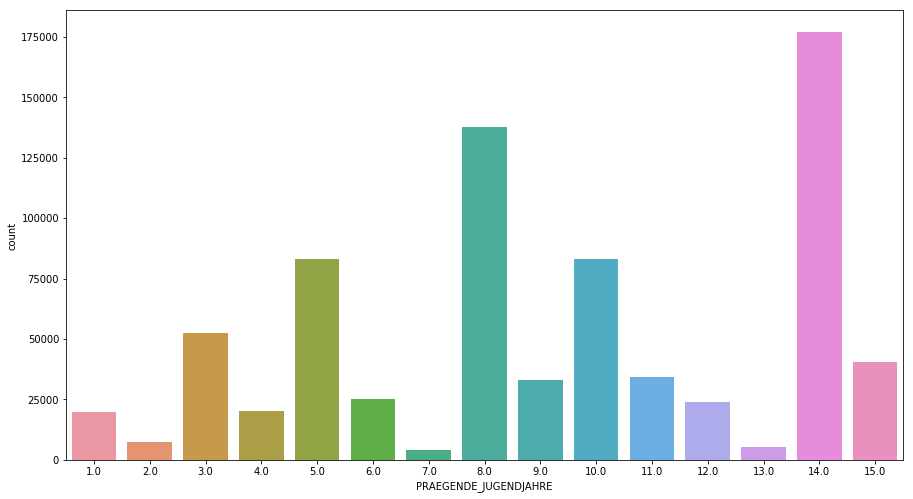

In [88]:
a4_dims = (15, 8.27)
fig, ax = pyplot.subplots(figsize = a4_dims)
ax = sns.countplot(x="PRAEGENDE_JUGENDJAHRE", data=azdias_above2)

In [89]:
# Create decade and movement dicts
decade_dict = {1:40,2:40,3:50,4:50,5:60,6:60,7:60,8:70,9:70,10:80,11:80,12:80,13:80,14:90,15:90} 
movement_dict = {1:0,2:1,3:0,4:1,5:0,6:1,7:1,8:0,9:1,10:0,11:1,12:0,13:1,14:0,15:1}

azdias_above2['PRAEGENDE_JUGENDJAHRE_DECADE'] = azdias_above2['PRAEGENDE_JUGENDJAHRE'].map(decade_dict)
azdias_above2['PRAEGENDE_JUGENDJAHRE_MOVEMENT'] = azdias_above2['PRAEGENDE_JUGENDJAHRE'].map(movement_dict)

azdias_above2.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SOHO_KZ,VERS_TYP,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,WOHNLAGE,CAMEO_INTL_2015,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,full_count,full_count_pct,CJT_GESAMTTYP_2.0,CJT_GESAMTTYP_3.0,CJT_GESAMTTYP_4.0,CJT_GESAMTTYP_5.0,CJT_GESAMTTYP_6.0,FINANZTYP_2,FINANZTYP_3,FINANZTYP_4,FINANZTYP_5,FINANZTYP_6,LP_FAMILIE_GROB_2.0,LP_FAMILIE_GROB_3.0,LP_FAMILIE_GROB_4.0,LP_FAMILIE_GROB_5.0,LP_STATUS_GROB_2.0,LP_STATUS_GROB_3.0,LP_STATUS_GROB_4.0,LP_STATUS_GROB_5.0,NATIONALITAET_KZ_2.0,NATIONALITAET_KZ_3.0,SHOPPER_TYP_1.0,SHOPPER_TYP_2.0,SHOPPER_TYP_3.0,ZABEOTYP_2,ZABEOTYP_3,ZABEOTYP_4,ZABEOTYP_5,ZABEOTYP_6,GEBAEUDETYP_2,CAMEO_DEUG_2015_2,CAMEO_DEUG_2015_3,CAMEO_DEUG_2015_4,CAMEO_DEUG_2015_5,CAMEO_DEUG_2015_6,CAMEO_DEUG_2015_7,CAMEO_DEUG_2015_8,CAMEO_DEUG_2015_9,PRAEGENDE_JUGENDJAHRE_DECADE,PRAEGENDE_JUGENDJAHRE_MOVEMENT
1,1.0,2,1,5,2,5,4,5,0,3.0,21.0,6.0,14.0,1.0,5,4,4,3,1,2,2,3,6,4,7,4,7,6,1.0,2.0,2.0,0.0,6.0,3.0,9.0,11.0,0.0,1.0,1992.0,1,4.0,51,0.0,0.0,0.0,2.0,1.0,6.0,3.0,8.0,3.0,2.0,1.0,3.0,3.0,963.0,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0,79,100.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,90.0,0.0
2,3.0,2,1,4,1,2,3,5,1,3.0,3.0,1.0,15.0,3.0,4,1,3,3,4,4,6,3,4,7,7,7,3,3,0.0,1.0,1.0,0.0,4.0,3.0,9.0,10.0,0.0,5.0,1992.0,1,2.0,24,1.0,3.0,1.0,0.0,3.0,2.0,4.0,4.0,4.0,2.0,3.0,2.0,2.0,712.0,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0,79,100.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,90.0,1.0
3,4.0,2,4,2,5,2,1,2,0,2.0,NaN,NaN,8.0,2.0,5,1,2,1,4,4,7,4,3,4,4,5,4,4,0.0,1.0,0.0,0.0,1.0,NaN,9.0,1.0,0.0,4.0,1997.0,1,7.0,12,4.0,1.0,0.0,0.0,4.0,4.0,2.0,6.0,4.0,NaN,4.0,1.0,NaN,596.0,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0,72,91.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,70.0,0.0
4,3.0,1,4,3,4,1,3,2,0,3.0,32.0,10.0,8.0,5.0,6,4,4,2,7,4,4,6,2,3,2,2,4,2,0.0,2.0,4.0,0.0,5.0,2.0,9.0,3.0,0.0,4.0,1992.0,1,3.0,43,1.0,4.0,1.0,0.0,3.0,2.0,5.0,1.0,5.0,3.0,3.0,5.0,5.0,435.0,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0,79,100.0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,70.0,0.0
5,1.0,2,3,1,5,2,2,5,0,3.0,8.0,2.0,3.0,3.0,2,4,7,4,2,2,2,5,7,4,4,4,7,6,0.0,2.0,1.0,0.0,5.0,6.0,9.0,5.0,0.0,5.0,1992.0,1,7.0,54,2.0,2.0,0.0,0.0,4.0,6.0,2.0,7.0,4.0,4.0,4.0,1.0,5.0,1300.0,2.0,3.0,1.0,1.0,1.0,5.0,5.0,2.0,3.0,3.0,79,100.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,50.0,0.0


In [90]:
print(azdias_above2['PRAEGENDE_JUGENDJAHRE_DECADE'].unique())
print(azdias_above2['PRAEGENDE_JUGENDJAHRE_MOVEMENT'].unique())

[ 90.  70.  50.  80.  60.  nan  40.]
[  0.   1.  nan]


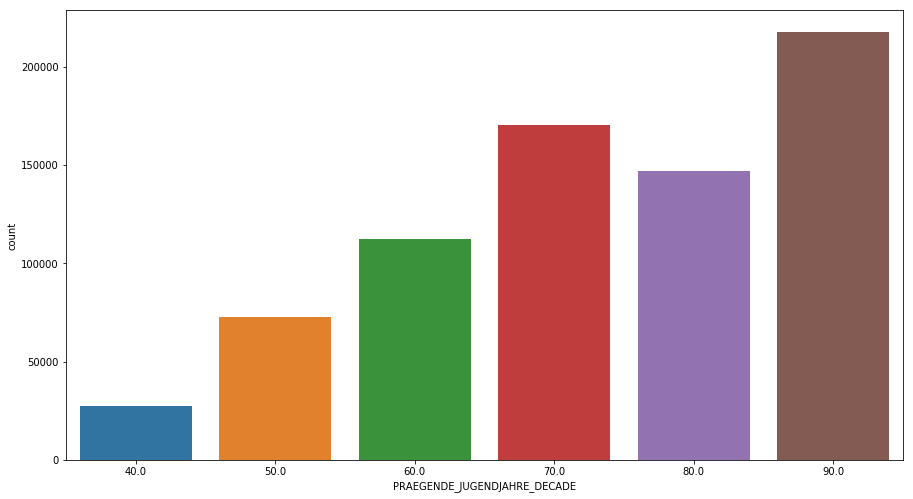

In [91]:
a4_dims = (15, 8.27)
fig, ax = pyplot.subplots(figsize = a4_dims)
ax = sns.countplot(x="PRAEGENDE_JUGENDJAHRE_DECADE", data=azdias_above2)

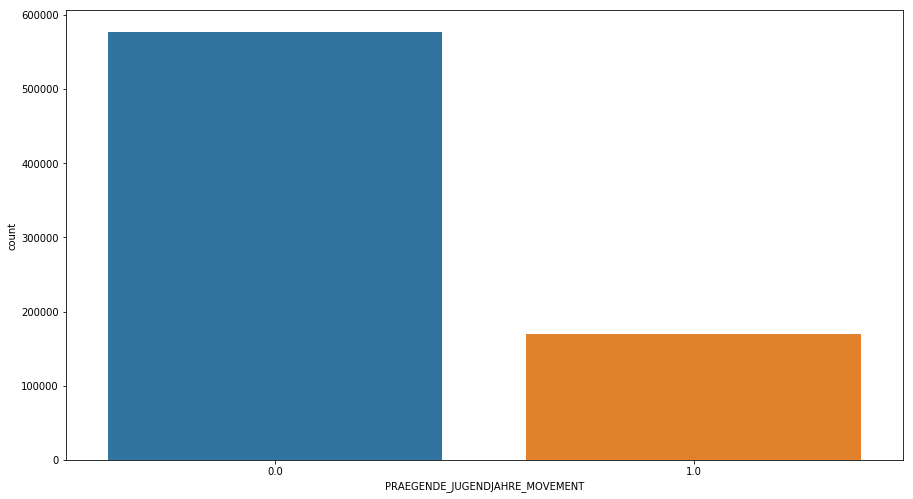

In [92]:
a4_dims = (15, 8.27)
fig, ax = pyplot.subplots(figsize = a4_dims)
ax = sns.countplot(x="PRAEGENDE_JUGENDJAHRE_MOVEMENT", data=azdias_above2)

### Investigate "CAMEO_INTL_2015" and engineer two new variables.

#### 4.3. CAMEO_INTL_2015
German CAMEO: Wealth / Life Stage Typology, mapped to international code
- -1: unknown
- 11: Wealthy Households - Pre-Family Couples & Singles
- 12: Wealthy Households - Young Couples With Children
- 13: Wealthy Households - Families With School Age Children
- 14: Wealthy Households - Older Families &  Mature Couples
- 15: Wealthy Households - Elders In Retirement
- 21: Prosperous Households - Pre-Family Couples & Singles
- 22: Prosperous Households - Young Couples With Children
- 23: Prosperous Households - Families With School Age Children
- 24: Prosperous Households - Older Families & Mature Couples
- 25: Prosperous Households - Elders In Retirement
- 31: Comfortable Households - Pre-Family Couples & Singles
- 32: Comfortable Households - Young Couples With Children
- 33: Comfortable Households - Families With School Age Children
- 34: Comfortable Households - Older Families & Mature Couples
- 35: Comfortable Households - Elders In Retirement
- 41: Less Affluent Households - Pre-Family Couples & Singles
- 42: Less Affluent Households - Young Couples With Children
- 43: Less Affluent Households - Families With School Age Children
- 44: Less Affluent Households - Older Families & Mature Couples
- 45: Less Affluent Households - Elders In Retirement
- 51: Poorer Households - Pre-Family Couples & Singles
- 52: Poorer Households - Young Couples With Children
- 53: Poorer Households - Families With School Age Children
- 54: Poorer Households - Older Families & Mature Couples
- 55: Poorer Households - Elders In Retirement
- XX: unknown

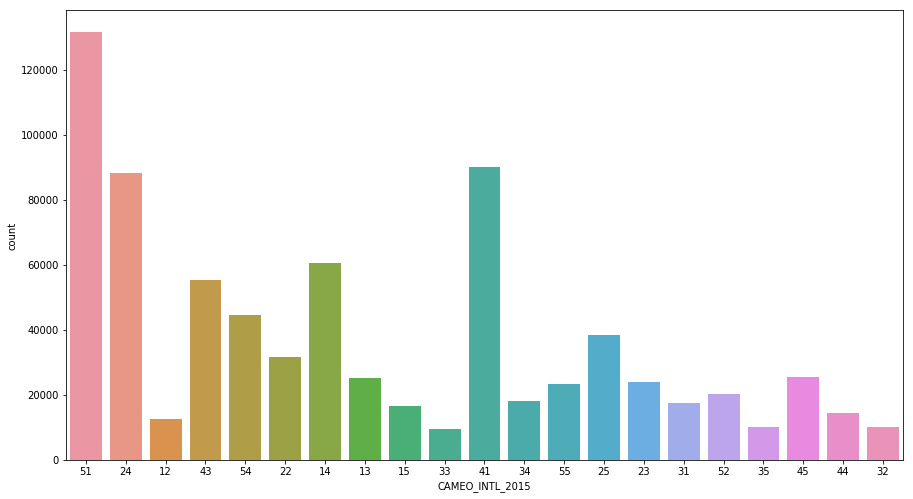

In [93]:
a4_dims = (15, 8.27)
fig, ax = pyplot.subplots(figsize = a4_dims)
ax = sns.countplot(x="CAMEO_INTL_2015", data=azdias_above2)

In [94]:
# Extract first character as 'Wealth'
azdias_above2['CAMEO_INTL_2015_WEALTH'] = azdias_above2['CAMEO_INTL_2015'].astype(str).str[0]

# Extract second character as 'Life Stage Typology'
azdias_above2['CAMEO_INTL_2015_LIFE_STAGE'] = azdias_above2['CAMEO_INTL_2015'].astype(str).str[1]

azdias_above2.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SOHO_KZ,VERS_TYP,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,WOHNLAGE,CAMEO_INTL_2015,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,full_count,full_count_pct,CJT_GESAMTTYP_2.0,CJT_GESAMTTYP_3.0,CJT_GESAMTTYP_4.0,CJT_GESAMTTYP_5.0,CJT_GESAMTTYP_6.0,FINANZTYP_2,FINANZTYP_3,FINANZTYP_4,FINANZTYP_5,FINANZTYP_6,LP_FAMILIE_GROB_2.0,LP_FAMILIE_GROB_3.0,LP_FAMILIE_GROB_4.0,LP_FAMILIE_GROB_5.0,LP_STATUS_GROB_2.0,LP_STATUS_GROB_3.0,LP_STATUS_GROB_4.0,LP_STATUS_GROB_5.0,NATIONALITAET_KZ_2.0,NATIONALITAET_KZ_3.0,SHOPPER_TYP_1.0,SHOPPER_TYP_2.0,SHOPPER_TYP_3.0,ZABEOTYP_2,ZABEOTYP_3,ZABEOTYP_4,ZABEOTYP_5,ZABEOTYP_6,GEBAEUDETYP_2,CAMEO_DEUG_2015_2,CAMEO_DEUG_2015_3,CAMEO_DEUG_2015_4,CAMEO_DEUG_2015_5,CAMEO_DEUG_2015_6,CAMEO_DEUG_2015_7,CAMEO_DEUG_2015_8,CAMEO_DEUG_2015_9,PRAEGENDE_JUGENDJAHRE_DECADE,PRAEGENDE_JUGENDJAHRE_MOVEMENT,CAMEO_INTL_2015_WEALTH,CAMEO_INTL_2015_LIFE_STAGE
1,1.0,2,1,5,2,5,4,5,0,3.0,21.0,6.0,14.0,1.0,5,4,4,3,1,2,2,3,6,4,7,4,7,6,1.0,2.0,2.0,0.0,6.0,3.0,9.0,11.0,0.0,1.0,1992.0,1,4.0,51,0.0,0.0,0.0,2.0,1.0,6.0,3.0,8.0,3.0,2.0,1.0,3.0,3.0,963.0,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0,79,100.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,90.0,0.0,5,1
2,3.0,2,1,4,1,2,3,5,1,3.0,3.0,1.0,15.0,3.0,4,1,3,3,4,4,6,3,4,7,7,7,3,3,0.0,1.0,1.0,0.0,4.0,3.0,9.0,10.0,0.0,5.0,1992.0,1,2.0,24,1.0,3.0,1.0,0.0,3.0,2.0,4.0,4.0,4.0,2.0,3.0,2.0,2.0,712.0,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0,79,100.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,90.0,1.0,2,4
3,4.0,2,4,2,5,2,1,2,0,2.0,NaN,NaN,8.0,2.0,5,1,2,1,4,4,7,4,3,4,4,5,4,4,0.0,1.0,0.0,0.0,1.0,NaN,9.0,1.0,0.0,4.0,1997.0,1,7.0,12,4.0,1.0,0.0,0.0,4.0,4.0,2.0,6.0,4.0,NaN,4.0,1.0,NaN,596.0,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0,72,91.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,70.0,0.0,1,2
4,3.0,1,4,3,4,1,3,2,0,3.0,32.0,10.0,8.0,5.0,6,4,4,2,7,4,4,6,2,3,2,2,4,2,0.0,2.0,4.0,0.0,5.0,2.0,9.0,3.0,0.0,4.0,1992.0,1,3.0,43,1.0,4.0,1.0,0.0,3.0,2.0,5.0,1.0,5.0,3.0,3.0,5.0,5.0,435.0,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0,79,100.0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,70.0,0.0,4,3
5,1.0,2,3,1,5,2,2,5,0,3.0,8.0,2.0,3.0,3.0,2,4,7,4,2,2,2,5,7,4,4,4,7,6,0.0,2.0,1.0,0.0,5.0,6.0,9.0,5.0,0.0,5.0,1992.0,1,7.0,54,2.0,2.0,0.0,0.0,4.0,6.0,2.0,7.0,4.0,4.0,4.0,1.0,5.0,1300.0,2.0,3.0,1.0,1.0,1.0,5.0,5.0,2.0,3.0,3.0,79,100.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,50.0,0.0,5,4


In [95]:
# -1: unknown
# XX: unknown    
azdias_above2['CAMEO_INTL_2015_WEALTH'] = np.where(azdias_above2['CAMEO_INTL_2015'].isnull(), azdias_above2['CAMEO_INTL_2015'], azdias_above2['CAMEO_INTL_2015_WEALTH'])

In [96]:
azdias_above2['CAMEO_INTL_2015_WEALTH'].unique()

array(['5', '2', '1', '4', '3', nan], dtype=object)

In [97]:
azdias_above2['CAMEO_INTL_2015_LIFE_STAGE'] = np.where(azdias_above2['CAMEO_INTL_2015'].isnull(), azdias_above2['CAMEO_INTL_2015'], azdias_above2['CAMEO_INTL_2015_LIFE_STAGE'])

In [98]:
azdias_above2['CAMEO_INTL_2015_LIFE_STAGE'].unique()

array(['1', '4', '2', '3', '5', nan], dtype=object)

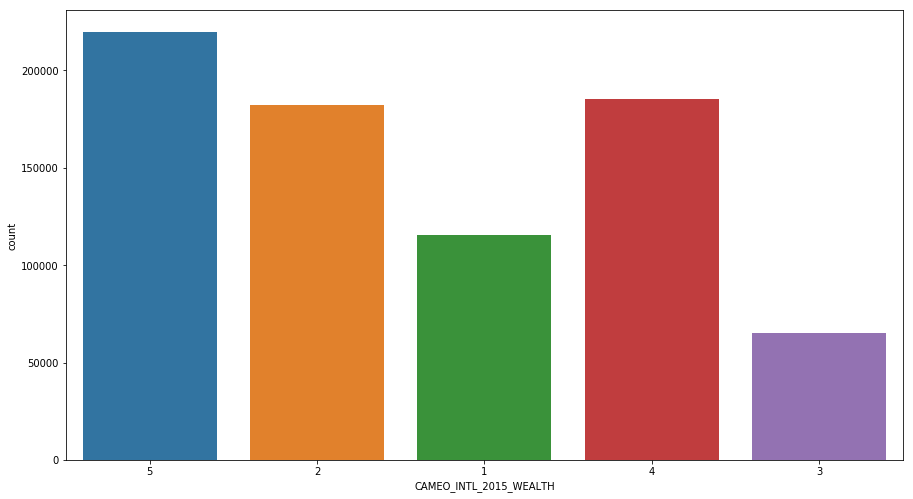

In [99]:
a4_dims = (15, 8.27)
fig, ax = pyplot.subplots(figsize = a4_dims)
ax = sns.countplot(x="CAMEO_INTL_2015_WEALTH", data=azdias_above2)

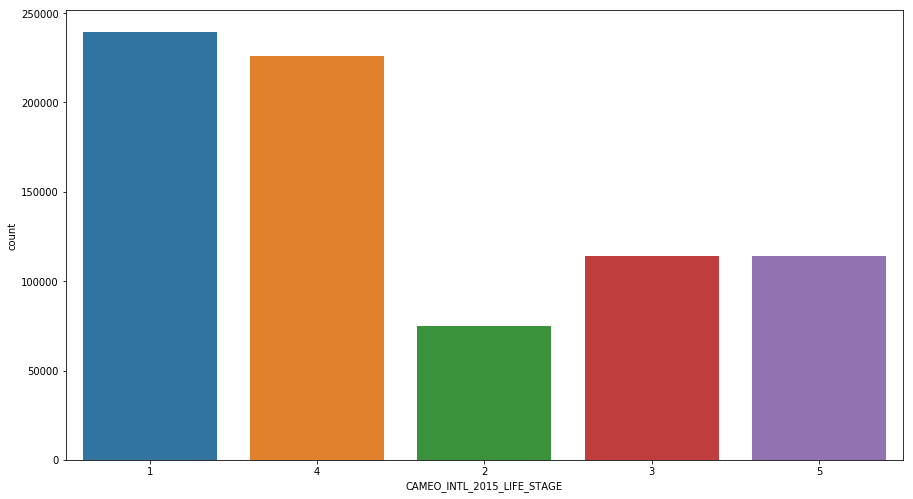

In [100]:
a4_dims = (15, 8.27)
fig, ax = pyplot.subplots(figsize = a4_dims)
ax = sns.countplot(x="CAMEO_INTL_2015_LIFE_STAGE", data=azdias_above2)

### Check remaining mixed columns:

'LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB','WOHNLAGE','PLZ8_BAUMAX'

#### LP_LEBENSPHASE_FEIN

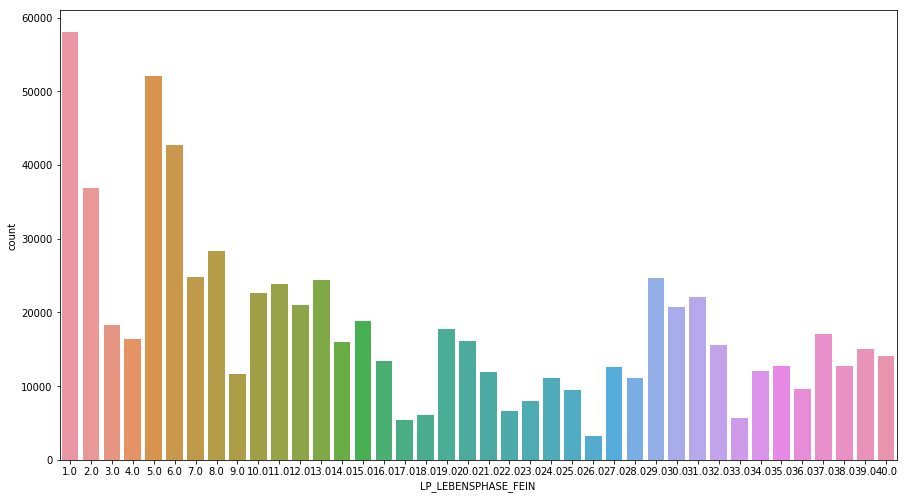

In [101]:
a4_dims = (15, 8.27)
fig, ax = pyplot.subplots(figsize = a4_dims)
ax = sns.countplot(x="LP_LEBENSPHASE_FEIN", data=azdias_above2)

In [102]:
azdias_above2.LP_LEBENSPHASE_FEIN.unique()

array([ 21.,   3.,  nan,  32.,   8.,   2.,   5.,  10.,   4.,   6.,  23.,
        12.,  20.,   1.,  25.,  13.,  18.,  31.,  38.,  35.,  30.,   7.,
        22.,  14.,  29.,  24.,  28.,  37.,  26.,  39.,  27.,  36.,   9.,
        34.,  33.,  15.,  11.,  40.,  16.,  19.,  17.])

This variable can be dropped

#### LP_LEBENSPHASE_GROB

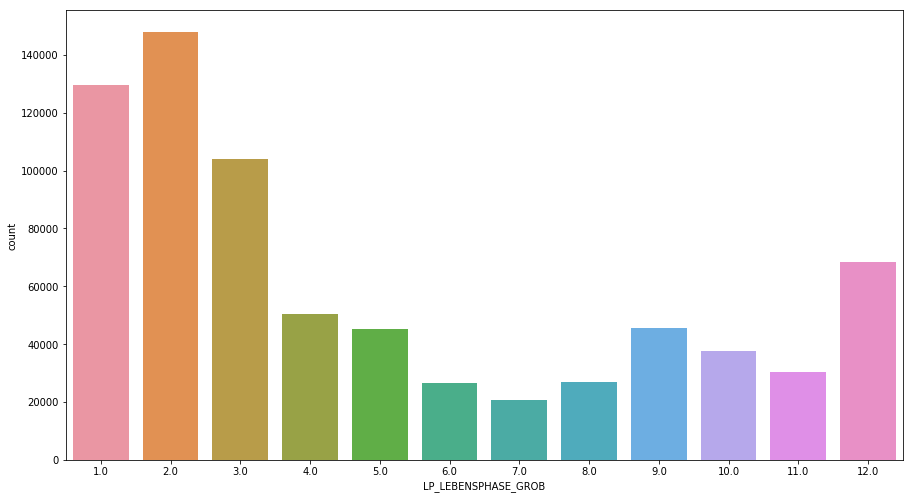

In [103]:
a4_dims = (15, 8.27)
fig, ax = pyplot.subplots(figsize = a4_dims)
ax = sns.countplot(x="LP_LEBENSPHASE_GROB", data=azdias_above2)

In [104]:
azdias_above2.LP_LEBENSPHASE_GROB.unique()

array([  6.,   1.,  nan,  10.,   2.,   3.,   5.,   7.,  12.,  11.,   9.,
         4.,   8.])

In [105]:
azdias_above2.LP_LEBENSPHASE_GROB.nunique()

12

This variable can be dropped

#### WOHNLAGE
Neighborhood quality (or rural flag)
- -1: unknown
-  0: no score calculated
-  1: very good neighborhood
-  2: good neighborhood
-  3: average neighborhood
-  4: poor neighborhood
-  5: very poor neighborhood
-  7: rural neighborhood
-  8: new building in rural neighborhood

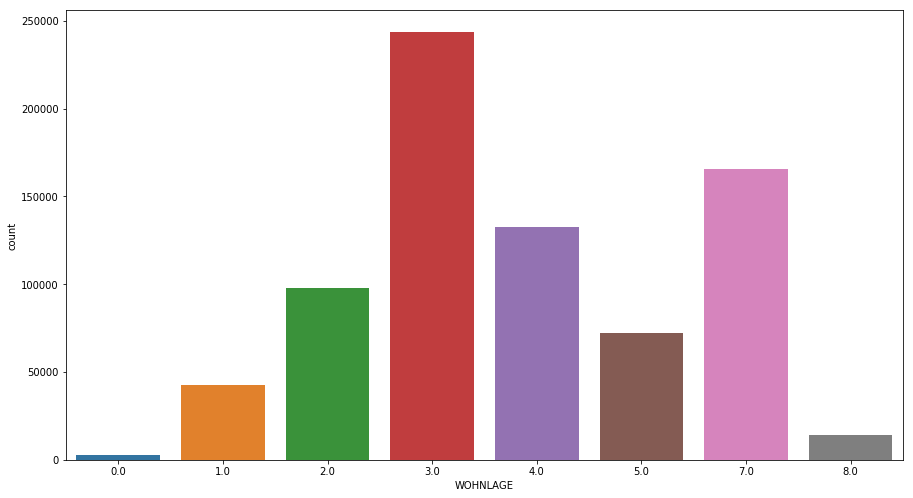

In [106]:
a4_dims = (15, 8.27)
fig, ax = pyplot.subplots(figsize = a4_dims)
ax = sns.countplot(x="WOHNLAGE", data=azdias_above2)

In [107]:
azdias_above2.WOHNLAGE.unique()

array([ 4.,  2.,  7.,  3.,  5.,  1.,  8.,  0.])

In [108]:
azdias_above2.WOHNLAGE.nunique()

8

It looks like the column can be broken up into Rural (binary) and Quality of Neighborhood (Numeric)

In [109]:
# Create decade and movement dicts
rural_dict = {0:0,1:0,2:0,3:0,4:0,5:0,7:1,8:1} 
neighborhood_quality_dict = {0:0,1:1,2:2,3:3,4:4,5:5,7:0,8:0}

azdias_above2['WOHNLAGE_RURAL'] = azdias_above2['WOHNLAGE'].map(rural_dict)
azdias_above2['WOHNLAGE_neighborhood_quality'] = azdias_above2['WOHNLAGE'].map(neighborhood_quality_dict)

In [110]:
azdias_above2['WOHNLAGE_RURAL'].head()

1    0
2    0
3    1
4    0
5    1
Name: WOHNLAGE_RURAL, dtype: int64

In [111]:
azdias_above2['WOHNLAGE_neighborhood_quality'].head()

1    4
2    2
3    0
4    3
5    0
Name: WOHNLAGE_neighborhood_quality, dtype: int64

#### KBA05_BAUMAX
Most common building type within the PLZ8 region
- -1: unknown
-  0: unknown
-  1: mainly 1-2 family homes
-  2: mainly 3-5 family homes
-  3: mainly 6-10 family homes
-  4: mainly 10+ family homes
-  5: mainly business buildings

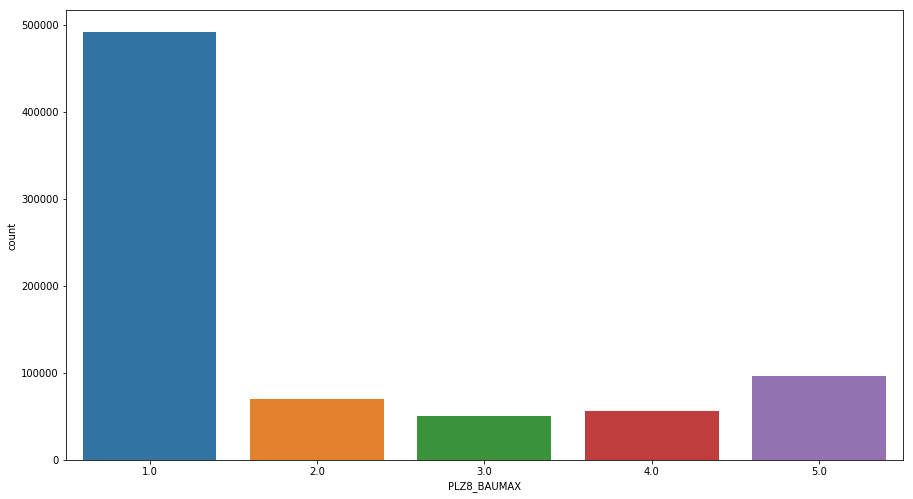

In [112]:
a4_dims = (15, 8.27)
fig, ax = pyplot.subplots(figsize = a4_dims)
ax = sns.countplot(x="PLZ8_BAUMAX", data=azdias_above2)

In [113]:
azdias_above2.PLZ8_BAUMAX.unique()

array([  1.,   2.,  nan,   4.,   5.,   3.])

In [114]:
azdias_above2.PLZ8_BAUMAX.nunique()

5

Drop columns

In [115]:
azdias_above2 = azdias_above2.drop(['full_count','full_count_pct','PRAEGENDE_JUGENDJAHRE','CAMEO_INTL_2015','WOHNLAGE','LP_LEBENSPHASE_GROB','LP_LEBENSPHASE_FEIN','PLZ8_BAUMAX'], axis=1)

In [116]:
azdias_above2.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SOHO_KZ,VERS_TYP,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,CJT_GESAMTTYP_2.0,CJT_GESAMTTYP_3.0,CJT_GESAMTTYP_4.0,CJT_GESAMTTYP_5.0,CJT_GESAMTTYP_6.0,FINANZTYP_2,FINANZTYP_3,FINANZTYP_4,FINANZTYP_5,FINANZTYP_6,LP_FAMILIE_GROB_2.0,LP_FAMILIE_GROB_3.0,LP_FAMILIE_GROB_4.0,LP_FAMILIE_GROB_5.0,LP_STATUS_GROB_2.0,LP_STATUS_GROB_3.0,LP_STATUS_GROB_4.0,LP_STATUS_GROB_5.0,NATIONALITAET_KZ_2.0,NATIONALITAET_KZ_3.0,SHOPPER_TYP_1.0,SHOPPER_TYP_2.0,SHOPPER_TYP_3.0,ZABEOTYP_2,ZABEOTYP_3,ZABEOTYP_4,ZABEOTYP_5,ZABEOTYP_6,GEBAEUDETYP_2,CAMEO_DEUG_2015_2,CAMEO_DEUG_2015_3,CAMEO_DEUG_2015_4,CAMEO_DEUG_2015_5,CAMEO_DEUG_2015_6,CAMEO_DEUG_2015_7,CAMEO_DEUG_2015_8,CAMEO_DEUG_2015_9,PRAEGENDE_JUGENDJAHRE_DECADE,PRAEGENDE_JUGENDJAHRE_MOVEMENT,CAMEO_INTL_2015_WEALTH,CAMEO_INTL_2015_LIFE_STAGE,WOHNLAGE_RURAL,WOHNLAGE_neighborhood_quality
1,1.0,2,1,5,2,5,4,5,0,3.0,1.0,5,4,4,3,1,2,2,3,6,4,7,4,7,6,1.0,2.0,2.0,0.0,6.0,3.0,9.0,11.0,0.0,1.0,1992.0,1,0.0,0.0,0.0,2.0,1.0,6.0,3.0,8.0,3.0,2.0,1.0,3.0,3.0,963.0,2.0,3.0,2.0,1.0,5.0,4.0,3.0,5.0,4.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,90.0,0.0,5,1,0,4
2,3.0,2,1,4,1,2,3,5,1,3.0,3.0,4,1,3,3,4,4,6,3,4,7,7,7,3,3,0.0,1.0,1.0,0.0,4.0,3.0,9.0,10.0,0.0,5.0,1992.0,1,1.0,3.0,1.0,0.0,3.0,2.0,4.0,4.0,4.0,2.0,3.0,2.0,2.0,712.0,3.0,3.0,1.0,0.0,4.0,4.0,3.0,5.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,90.0,1.0,2,4,0,2
3,4.0,2,4,2,5,2,1,2,0,2.0,2.0,5,1,2,1,4,4,7,4,3,4,4,5,4,4,0.0,1.0,0.0,0.0,1.0,NaN,9.0,1.0,0.0,4.0,1997.0,1,4.0,1.0,0.0,0.0,4.0,4.0,2.0,6.0,4.0,NaN,4.0,1.0,NaN,596.0,2.0,2.0,2.0,0.0,3.0,4.0,2.0,3.0,3.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,70.0,0.0,1,2,1,0
4,3.0,1,4,3,4,1,3,2,0,3.0,5.0,6,4,4,2,7,4,4,6,2,3,2,2,4,2,0.0,2.0,4.0,0.0,5.0,2.0,9.0,3.0,0.0,4.0,1992.0,1,1.0,4.0,1.0,0.0,3.0,2.0,5.0,1.0,5.0,3.0,3.0,5.0,5.0,435.0,2.0,4.0,2.0,1.0,3.0,3.0,4.0,6.0,5.0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,70.0,0.0,4,3,0,3
5,1.0,2,3,1,5,2,2,5,0,3.0,3.0,2,4,7,4,2,2,2,5,7,4,4,4,7,6,0.0,2.0,1.0,0.0,5.0,6.0,9.0,5.0,0.0,5.0,1992.0,1,2.0,2.0,0.0,0.0,4.0,6.0,2.0,7.0,4.0,4.0,4.0,1.0,5.0,1300.0,2.0,3.0,1.0,1.0,5.0,5.0,2.0,3.0,3.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,50.0,0.0,5,4,1,0


#### Discussion 1.2.2: Engineer Mixed-Type Features

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding mixed-value features. Which ones did you keep, which did you drop, and what engineering steps did you perform?)

For column PRAEGENDE_JUGENDJAHRE, two dictionaries were created to map the values to create two columns, PRAEGENDE_JUGENDJAHRE_MOVEMENT and PRAEGENDE_JUGENDJAHRE_DECADES.

For column CAMEO_INTL_2015, the first two characters were split into two - Wealth and Life Stage. Any nan from the original column replaced the two column created since the split also created 1s for Life Stage when it was incorrect.

For column WOHNLAGE, it was broken it two columns: Rural and quality of neighborhood

At the end , 'full_count','full_count_pct','PRAEGENDE_JUGENDJAHRE','CAMEO_INTL_2015','WOHNLAGE','LP_LEBENSPHASE_GROB','LP_LEBENSPHASE_FEIN','PLZ8_BAUMAX' were dropped

#### Step 1.2.3: Complete Feature Selection

In order to finish this step up, you need to make sure that your data frame now only has the columns that you want to keep. To summarize, the dataframe should consist of the following:
- All numeric, interval, and ordinal type columns from the original dataset.
- Binary categorical features (all numerically-encoded).
- Engineered features from other multi-level categorical features and mixed features.

Make sure that for any new columns that you have engineered, that you've excluded the original columns from the final dataset. Otherwise, their values will interfere with the analysis later on the project. For example, you should not keep "PRAEGENDE_JUGENDJAHRE", since its values won't be useful for the algorithm: only the values derived from it in the engineered features you created should be retained. As a reminder, your data should only be from **the subset with few or no missing values**.

In [117]:
# If there are other re-engineering tasks you need to perform, make sure you
# take care of them here. (Dealing with missing data will come in step 2.1.)
azdias_above2.dtypes

ALTERSKATEGORIE_GROB              float64
ANREDE_KZ                           int64
FINANZ_MINIMALIST                   int64
FINANZ_SPARER                       int64
FINANZ_VORSORGER                    int64
FINANZ_ANLEGER                      int64
FINANZ_UNAUFFAELLIGER               int64
FINANZ_HAUSBAUER                    int64
GREEN_AVANTGARDE                    int64
HEALTH_TYP                        float64
RETOURTYP_BK_S                    float64
SEMIO_SOZ                           int64
SEMIO_FAM                           int64
SEMIO_REL                           int64
SEMIO_MAT                           int64
SEMIO_VERT                          int64
SEMIO_LUST                          int64
SEMIO_ERL                           int64
SEMIO_KULT                          int64
SEMIO_RAT                           int64
SEMIO_KRIT                          int64
SEMIO_DOM                           int64
SEMIO_KAEM                          int64
SEMIO_PFLICHT                     

Check categorical binary columns

In [118]:
azdias_above2[azdias_above_cat_binary_df_list].dtypes

ANREDE_KZ             int64
GREEN_AVANTGARDE      int64
SOHO_KZ             float64
VERS_TYP            float64
OST_WEST_KZ           uint8
dtype: object

In [119]:
azdias_above2[azdias_above_cat_binary_df_list].head()

,ANREDE_KZ,GREEN_AVANTGARDE,SOHO_KZ,VERS_TYP,OST_WEST_KZ
1,2,0,1.0,2.0,1
2,2,1,0.0,1.0,1
3,2,0,0.0,1.0,1
4,1,0,0.0,2.0,1
5,2,0,0.0,2.0,1


In [120]:
azdias_above2.dtypes[0:60]

ALTERSKATEGORIE_GROB     float64
ANREDE_KZ                  int64
FINANZ_MINIMALIST          int64
FINANZ_SPARER              int64
FINANZ_VORSORGER           int64
FINANZ_ANLEGER             int64
FINANZ_UNAUFFAELLIGER      int64
FINANZ_HAUSBAUER           int64
GREEN_AVANTGARDE           int64
HEALTH_TYP               float64
RETOURTYP_BK_S           float64
SEMIO_SOZ                  int64
SEMIO_FAM                  int64
SEMIO_REL                  int64
SEMIO_MAT                  int64
SEMIO_VERT                 int64
SEMIO_LUST                 int64
SEMIO_ERL                  int64
SEMIO_KULT                 int64
SEMIO_RAT                  int64
SEMIO_KRIT                 int64
SEMIO_DOM                  int64
SEMIO_KAEM                 int64
SEMIO_PFLICHT              int64
SEMIO_TRADV                int64
SOHO_KZ                  float64
VERS_TYP                 float64
ANZ_PERSONEN             float64
ANZ_TITEL                float64
HH_EINKOMMEN_SCORE       float64
W_KEIT_KIN

In [121]:
azdias_above2.dtypes[61:120]

CJT_GESAMTTYP_3.0                   uint8
CJT_GESAMTTYP_4.0                   uint8
CJT_GESAMTTYP_5.0                   uint8
CJT_GESAMTTYP_6.0                   uint8
FINANZTYP_2                         uint8
FINANZTYP_3                         uint8
FINANZTYP_4                         uint8
FINANZTYP_5                         uint8
FINANZTYP_6                         uint8
LP_FAMILIE_GROB_2.0                 uint8
LP_FAMILIE_GROB_3.0                 uint8
LP_FAMILIE_GROB_4.0                 uint8
LP_FAMILIE_GROB_5.0                 uint8
LP_STATUS_GROB_2.0                  uint8
LP_STATUS_GROB_3.0                  uint8
LP_STATUS_GROB_4.0                  uint8
LP_STATUS_GROB_5.0                  uint8
NATIONALITAET_KZ_2.0                uint8
NATIONALITAET_KZ_3.0                uint8
SHOPPER_TYP_1.0                     uint8
SHOPPER_TYP_2.0                     uint8
SHOPPER_TYP_3.0                     uint8
ZABEOTYP_2                          uint8
ZABEOTYP_3                        

In [122]:
# Do whatever you need to in order to ensure that the dataframe only contains
# the columns that should be passed to the algorithm functions.

### Step 1.3: Create a Cleaning Function

Even though you've finished cleaning up the general population demographics data, it's important to look ahead to the future and realize that you'll need to perform the same cleaning steps on the customer demographics data. In this substep, complete the function below to execute the main feature selection, encoding, and re-engineering steps you performed above. Then, when it comes to looking at the customer data in Step 3, you can just run this function on that DataFrame to get the trimmed dataset in a single step.

In [123]:
def clean_data(df):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    
    # Put in code here to execute all main cleaning steps:
    # convert missing value codes into NaNs, ...
    for index in feat_info.index:
        feat_info.loc[index,'missing_or_unknown'] = feat_info.loc[index,'missing_or_unknown'].strip('[]').split(',')
        for item in range(len(feat_info.loc[index,'missing_or_unknown'])):
            try:
                feat_info.loc[index,'missing_or_unknown'][item] = int(feat_info.loc[index,'missing_or_unknown'][item])
            except:
                continue
        df.loc[:,(feat_info.loc[index, 'attribute'])].replace(feat_info.loc[index,'missing_or_unknown'], np.nan, inplace=True)    
    
    # remove selected columns and rows, ...
    # remove columns
    colremove =  ['AGER_TYP', 'GEBURTSJAHR', 'TITEL_KZ', 'ALTER_HH', 'KK_KUNDENTYP','KBA05_BAUMAX',
                  'GFK_URLAUBERTYP', 'LP_FAMILIE_FEIN', 'LP_STATUS_FEIN', 'CAMEO_DEU_2015']
    df = df.drop(colremove,axis=1)
    
    # remove rows
    column_count = df.shape[1]

    df['full_count'] = df.apply(lambda x: x.count(), axis=1)
    df['full_count_pct'] = round(df['full_count']/column_count,2) * 100
    df[df.full_count_pct  >= 90.0]

    # select, re-encode, and engineer column values.
    # Encode binary
    df['OST_WEST_KZ'] = pd.get_dummies(df['OST_WEST_KZ'], drop_first = True)
    
    # Create decade and movement dicts
    GEBAEUDETYP_DICT = {1:1,2:1,3:2,4:2,5:2,6:2,7:2,8:2} 
    df['GEBAEUDETYP'] = df['GEBAEUDETYP'].map(GEBAEUDETYP_DICT)

    # Encode multi-level
    multi_list_remove = ['CJT_GESAMTTYP','FINANZTYP','LP_FAMILIE_GROB','LP_STATUS_GROB','NATIONALITAET_KZ',
                         'SHOPPER_TYP','ZABEOTYP','GEBAEUDETYP','CAMEO_DEUG_2015']

    df = pd.get_dummies(df, columns = multi_list_remove, drop_first = True)
    
    # Encode mix variable - PRAEGENDE_JUGENDJAHRE
    decade_dict = {1:40,2:40,3:50,4:50,5:60,6:60,7:60,8:70,9:70,10:80,11:80,12:80,13:80,14:90,15:90} 
    movement_dict = {1:0,2:1,3:0,4:1,5:0,6:1,7:1,8:0,9:1,10:0,11:1,12:0,13:1,14:0,15:1}

    df['PRAEGENDE_JUGENDJAHRE_DECADE'] = df['PRAEGENDE_JUGENDJAHRE'].map(decade_dict)
    df['PRAEGENDE_JUGENDJAHRE_MOVEMENT'] = df['PRAEGENDE_JUGENDJAHRE'].map(movement_dict)
    
    # Encode mixed variable - CAMEO_INTL_2015
    # Extract first character as 'Wealth'
    df['CAMEO_INTL_2015_WEALTH'] = df['CAMEO_INTL_2015'].astype(str).str[0]

    # Extract second character as 'Life Stage Typology'
    df['CAMEO_INTL_2015_LIFE_STAGE'] = df['CAMEO_INTL_2015'].astype(str).str[1]

    df['CAMEO_INTL_2015_WEALTH'] = np.where(df['CAMEO_INTL_2015'].isnull(), 
                                            df['CAMEO_INTL_2015'], df['CAMEO_INTL_2015_WEALTH'])
    df['CAMEO_INTL_2015_LIFE_STAGE'] = np.where(df['CAMEO_INTL_2015'].isnull(), 
                                                df['CAMEO_INTL_2015'], df['CAMEO_INTL_2015_LIFE_STAGE'])
    
    # Encode mixed variable - WOHNLAGE
    # Create decade and movement dicts
    rural_dict = {0:0,1:0,2:0,3:0,4:0,5:0,7:1,8:1} 
    neighborhood_quality_dict = {0:0,1:1,2:2,3:3,4:4,5:5,7:0,8:0}

    df['WOHNLAGE_RURAL'] = df['WOHNLAGE'].map(rural_dict)
    df['WOHNLAGE_neighborhood_quality'] = df['WOHNLAGE'].map(neighborhood_quality_dict)

    df = df.drop(['full_count','full_count_pct','PRAEGENDE_JUGENDJAHRE',
                  'CAMEO_INTL_2015','WOHNLAGE','LP_LEBENSPHASE_GROB',
                  'LP_LEBENSPHASE_FEIN','PLZ8_BAUMAX'], axis=1)
    
    # Return the cleaned dataframe.
    
    return df

Test function

In [124]:
# Load in the general demographics data.
azdias = pd.read_csv('Udacity_AZDIAS_Subset.csv',sep = ';')

# Load in the feature summary file.
feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv',sep = ';')

test = clean_data(azdias)
test.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SOHO_KZ,VERS_TYP,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,CJT_GESAMTTYP_2.0,CJT_GESAMTTYP_3.0,CJT_GESAMTTYP_4.0,CJT_GESAMTTYP_5.0,CJT_GESAMTTYP_6.0,FINANZTYP_2,FINANZTYP_3,FINANZTYP_4,FINANZTYP_5,FINANZTYP_6,LP_FAMILIE_GROB_2.0,LP_FAMILIE_GROB_3.0,LP_FAMILIE_GROB_4.0,LP_FAMILIE_GROB_5.0,LP_STATUS_GROB_2.0,LP_STATUS_GROB_3.0,LP_STATUS_GROB_4.0,LP_STATUS_GROB_5.0,NATIONALITAET_KZ_2.0,NATIONALITAET_KZ_3.0,SHOPPER_TYP_1.0,SHOPPER_TYP_2.0,SHOPPER_TYP_3.0,ZABEOTYP_2,ZABEOTYP_3,ZABEOTYP_4,ZABEOTYP_5,ZABEOTYP_6,GEBAEUDETYP_2.0,CAMEO_DEUG_2015_2,CAMEO_DEUG_2015_3,CAMEO_DEUG_2015_4,CAMEO_DEUG_2015_5,CAMEO_DEUG_2015_6,CAMEO_DEUG_2015_7,CAMEO_DEUG_2015_8,CAMEO_DEUG_2015_9,PRAEGENDE_JUGENDJAHRE_DECADE,PRAEGENDE_JUGENDJAHRE_MOVEMENT,CAMEO_INTL_2015_WEALTH,CAMEO_INTL_2015_LIFE_STAGE,WOHNLAGE_RURAL,WOHNLAGE_neighborhood_quality
0,2.0,1,3,4,3,5,5,3,0,NaN,5.0,2,6,7,5,1,5,3,3,4,7,6,6,5,3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,2,1,5,2,5,4,5,0,3.0,1.0,5,4,4,3,1,2,2,3,6,4,7,4,7,6,1.0,2.0,2.0,0.0,6.0,3.0,9.0,11.0,0.0,1.0,1992.0,1,0.0,0.0,0.0,2.0,1.0,6.0,3.0,8.0,3.0,2.0,1.0,3.0,3.0,963.0,2.0,3.0,2.0,1.0,5.0,4.0,3.0,5.0,4.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,90.0,0.0,5,1,0.0,4.0
2,3.0,2,1,4,1,2,3,5,1,3.0,3.0,4,1,3,3,4,4,6,3,4,7,7,7,3,3,0.0,1.0,1.0,0.0,4.0,3.0,9.0,10.0,0.0,5.0,1992.0,1,1.0,3.0,1.0,0.0,3.0,2.0,4.0,4.0,4.0,2.0,3.0,2.0,2.0,712.0,3.0,3.0,1.0,0.0,4.0,4.0,3.0,5.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,90.0,1.0,2,4,0.0,2.0
3,4.0,2,4,2,5,2,1,2,0,2.0,2.0,5,1,2,1,4,4,7,4,3,4,4,5,4,4,0.0,1.0,0.0,0.0,1.0,NaN,9.0,1.0,0.0,4.0,1997.0,1,4.0,1.0,0.0,0.0,4.0,4.0,2.0,6.0,4.0,NaN,4.0,1.0,NaN,596.0,2.0,2.0,2.0,0.0,3.0,4.0,2.0,3.0,3.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,70.0,0.0,1,2,1.0,0.0
4,3.0,1,4,3,4,1,3,2,0,3.0,5.0,6,4,4,2,7,4,4,6,2,3,2,2,4,2,0.0,2.0,4.0,0.0,5.0,2.0,9.0,3.0,0.0,4.0,1992.0,1,1.0,4.0,1.0,0.0,3.0,2.0,5.0,1.0,5.0,3.0,3.0,5.0,5.0,435.0,2.0,4.0,2.0,1.0,3.0,3.0,4.0,6.0,5.0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,70.0,0.0,4,3,0.0,3.0


In [125]:
test.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SOHO_KZ,VERS_TYP,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,CJT_GESAMTTYP_2.0,CJT_GESAMTTYP_3.0,CJT_GESAMTTYP_4.0,CJT_GESAMTTYP_5.0,CJT_GESAMTTYP_6.0,FINANZTYP_2,FINANZTYP_3,FINANZTYP_4,FINANZTYP_5,FINANZTYP_6,LP_FAMILIE_GROB_2.0,LP_FAMILIE_GROB_3.0,LP_FAMILIE_GROB_4.0,LP_FAMILIE_GROB_5.0,LP_STATUS_GROB_2.0,LP_STATUS_GROB_3.0,LP_STATUS_GROB_4.0,LP_STATUS_GROB_5.0,NATIONALITAET_KZ_2.0,NATIONALITAET_KZ_3.0,SHOPPER_TYP_1.0,SHOPPER_TYP_2.0,SHOPPER_TYP_3.0,ZABEOTYP_2,ZABEOTYP_3,ZABEOTYP_4,ZABEOTYP_5,ZABEOTYP_6,GEBAEUDETYP_2.0,CAMEO_DEUG_2015_2,CAMEO_DEUG_2015_3,CAMEO_DEUG_2015_4,CAMEO_DEUG_2015_5,CAMEO_DEUG_2015_6,CAMEO_DEUG_2015_7,CAMEO_DEUG_2015_8,CAMEO_DEUG_2015_9,PRAEGENDE_JUGENDJAHRE_DECADE,PRAEGENDE_JUGENDJAHRE_MOVEMENT,CAMEO_INTL_2015_WEALTH,CAMEO_INTL_2015_LIFE_STAGE,WOHNLAGE_RURAL,WOHNLAGE_neighborhood_quality
0,2.0,1,3,4,3,5,5,3,0,NaN,5.0,2,6,7,5,1,5,3,3,4,7,6,6,5,3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,2,1,5,2,5,4,5,0,3.0,1.0,5,4,4,3,1,2,2,3,6,4,7,4,7,6,1.0,2.0,2.0,0.0,6.0,3.0,9.0,11.0,0.0,1.0,1992.0,1,0.0,0.0,0.0,2.0,1.0,6.0,3.0,8.0,3.0,2.0,1.0,3.0,3.0,963.0,2.0,3.0,2.0,1.0,5.0,4.0,3.0,5.0,4.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,90.0,0.0,5,1,0.0,4.0
2,3.0,2,1,4,1,2,3,5,1,3.0,3.0,4,1,3,3,4,4,6,3,4,7,7,7,3,3,0.0,1.0,1.0,0.0,4.0,3.0,9.0,10.0,0.0,5.0,1992.0,1,1.0,3.0,1.0,0.0,3.0,2.0,4.0,4.0,4.0,2.0,3.0,2.0,2.0,712.0,3.0,3.0,1.0,0.0,4.0,4.0,3.0,5.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,90.0,1.0,2,4,0.0,2.0
3,4.0,2,4,2,5,2,1,2,0,2.0,2.0,5,1,2,1,4,4,7,4,3,4,4,5,4,4,0.0,1.0,0.0,0.0,1.0,NaN,9.0,1.0,0.0,4.0,1997.0,1,4.0,1.0,0.0,0.0,4.0,4.0,2.0,6.0,4.0,NaN,4.0,1.0,NaN,596.0,2.0,2.0,2.0,0.0,3.0,4.0,2.0,3.0,3.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,70.0,0.0,1,2,1.0,0.0
4,3.0,1,4,3,4,1,3,2,0,3.0,5.0,6,4,4,2,7,4,4,6,2,3,2,2,4,2,0.0,2.0,4.0,0.0,5.0,2.0,9.0,3.0,0.0,4.0,1992.0,1,1.0,4.0,1.0,0.0,3.0,2.0,5.0,1.0,5.0,3.0,3.0,5.0,5.0,435.0,2.0,4.0,2.0,1.0,3.0,3.0,4.0,6.0,5.0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,70.0,0.0,4,3,0.0,3.0


In [126]:
test.dtypes[0:60]

ALTERSKATEGORIE_GROB     float64
ANREDE_KZ                  int64
FINANZ_MINIMALIST          int64
FINANZ_SPARER              int64
FINANZ_VORSORGER           int64
FINANZ_ANLEGER             int64
FINANZ_UNAUFFAELLIGER      int64
FINANZ_HAUSBAUER           int64
GREEN_AVANTGARDE           int64
HEALTH_TYP               float64
RETOURTYP_BK_S           float64
SEMIO_SOZ                  int64
SEMIO_FAM                  int64
SEMIO_REL                  int64
SEMIO_MAT                  int64
SEMIO_VERT                 int64
SEMIO_LUST                 int64
SEMIO_ERL                  int64
SEMIO_KULT                 int64
SEMIO_RAT                  int64
SEMIO_KRIT                 int64
SEMIO_DOM                  int64
SEMIO_KAEM                 int64
SEMIO_PFLICHT              int64
SEMIO_TRADV                int64
SOHO_KZ                  float64
VERS_TYP                 float64
ANZ_PERSONEN             float64
ANZ_TITEL                float64
HH_EINKOMMEN_SCORE       float64
W_KEIT_KIN

In [127]:
test.dtypes[61:120]

CJT_GESAMTTYP_3.0                   uint8
CJT_GESAMTTYP_4.0                   uint8
CJT_GESAMTTYP_5.0                   uint8
CJT_GESAMTTYP_6.0                   uint8
FINANZTYP_2                         uint8
FINANZTYP_3                         uint8
FINANZTYP_4                         uint8
FINANZTYP_5                         uint8
FINANZTYP_6                         uint8
LP_FAMILIE_GROB_2.0                 uint8
LP_FAMILIE_GROB_3.0                 uint8
LP_FAMILIE_GROB_4.0                 uint8
LP_FAMILIE_GROB_5.0                 uint8
LP_STATUS_GROB_2.0                  uint8
LP_STATUS_GROB_3.0                  uint8
LP_STATUS_GROB_4.0                  uint8
LP_STATUS_GROB_5.0                  uint8
NATIONALITAET_KZ_2.0                uint8
NATIONALITAET_KZ_3.0                uint8
SHOPPER_TYP_1.0                     uint8
SHOPPER_TYP_2.0                     uint8
SHOPPER_TYP_3.0                     uint8
ZABEOTYP_2                          uint8
ZABEOTYP_3                        

## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Starting from this part of the project, you'll want to keep an eye on the [API reference page for sklearn](http://scikit-learn.org/stable/modules/classes.html) to help you navigate to all of the classes and functions that you'll need. In this substep, you'll need to check the following:

- sklearn requires that data not have missing values in order for its estimators to work properly. So, before applying the scaler to your data, make sure that you've cleaned the DataFrame of the remaining missing values. This can be as simple as just removing all data points with missing data, or applying an [Imputer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html) to replace all missing values. You might also try a more complicated procedure where you temporarily remove missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation. Think about how much missing data you have and what possible effects each approach might have on your analysis, and justify your decision in the discussion section below.
- For the actual scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is suggested, scaling each feature to mean 0 and standard deviation 1.
- For these classes, you can make use of the `.fit_transform()` method to both fit a procedure to the data as well as apply the transformation to the data at the same time. Don't forget to keep the fit sklearn objects handy, since you'll be applying them to the customer demographics data towards the end of the project.

In [128]:
# If you've not yet cleaned the dataset of all NaN values, then investigate and
# do that now.

# Load in the general demographics data.
azdias = pd.read_csv('Udacity_AZDIAS_Subset.csv',sep = ';')

# Load in the feature summary file.
feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv',sep = ';')

azdias2 = clean_data(azdias)
azdias2.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SOHO_KZ,VERS_TYP,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,CJT_GESAMTTYP_2.0,CJT_GESAMTTYP_3.0,CJT_GESAMTTYP_4.0,CJT_GESAMTTYP_5.0,CJT_GESAMTTYP_6.0,FINANZTYP_2,FINANZTYP_3,FINANZTYP_4,FINANZTYP_5,FINANZTYP_6,LP_FAMILIE_GROB_2.0,LP_FAMILIE_GROB_3.0,LP_FAMILIE_GROB_4.0,LP_FAMILIE_GROB_5.0,LP_STATUS_GROB_2.0,LP_STATUS_GROB_3.0,LP_STATUS_GROB_4.0,LP_STATUS_GROB_5.0,NATIONALITAET_KZ_2.0,NATIONALITAET_KZ_3.0,SHOPPER_TYP_1.0,SHOPPER_TYP_2.0,SHOPPER_TYP_3.0,ZABEOTYP_2,ZABEOTYP_3,ZABEOTYP_4,ZABEOTYP_5,ZABEOTYP_6,GEBAEUDETYP_2.0,CAMEO_DEUG_2015_2,CAMEO_DEUG_2015_3,CAMEO_DEUG_2015_4,CAMEO_DEUG_2015_5,CAMEO_DEUG_2015_6,CAMEO_DEUG_2015_7,CAMEO_DEUG_2015_8,CAMEO_DEUG_2015_9,PRAEGENDE_JUGENDJAHRE_DECADE,PRAEGENDE_JUGENDJAHRE_MOVEMENT,CAMEO_INTL_2015_WEALTH,CAMEO_INTL_2015_LIFE_STAGE,WOHNLAGE_RURAL,WOHNLAGE_neighborhood_quality
0,2.0,1,3,4,3,5,5,3,0,NaN,5.0,2,6,7,5,1,5,3,3,4,7,6,6,5,3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,2,1,5,2,5,4,5,0,3.0,1.0,5,4,4,3,1,2,2,3,6,4,7,4,7,6,1.0,2.0,2.0,0.0,6.0,3.0,9.0,11.0,0.0,1.0,1992.0,1,0.0,0.0,0.0,2.0,1.0,6.0,3.0,8.0,3.0,2.0,1.0,3.0,3.0,963.0,2.0,3.0,2.0,1.0,5.0,4.0,3.0,5.0,4.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,90.0,0.0,5,1,0.0,4.0
2,3.0,2,1,4,1,2,3,5,1,3.0,3.0,4,1,3,3,4,4,6,3,4,7,7,7,3,3,0.0,1.0,1.0,0.0,4.0,3.0,9.0,10.0,0.0,5.0,1992.0,1,1.0,3.0,1.0,0.0,3.0,2.0,4.0,4.0,4.0,2.0,3.0,2.0,2.0,712.0,3.0,3.0,1.0,0.0,4.0,4.0,3.0,5.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,90.0,1.0,2,4,0.0,2.0
3,4.0,2,4,2,5,2,1,2,0,2.0,2.0,5,1,2,1,4,4,7,4,3,4,4,5,4,4,0.0,1.0,0.0,0.0,1.0,NaN,9.0,1.0,0.0,4.0,1997.0,1,4.0,1.0,0.0,0.0,4.0,4.0,2.0,6.0,4.0,NaN,4.0,1.0,NaN,596.0,2.0,2.0,2.0,0.0,3.0,4.0,2.0,3.0,3.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,70.0,0.0,1,2,1.0,0.0
4,3.0,1,4,3,4,1,3,2,0,3.0,5.0,6,4,4,2,7,4,4,6,2,3,2,2,4,2,0.0,2.0,4.0,0.0,5.0,2.0,9.0,3.0,0.0,4.0,1992.0,1,1.0,4.0,1.0,0.0,3.0,2.0,5.0,1.0,5.0,3.0,3.0,5.0,5.0,435.0,2.0,4.0,2.0,1.0,3.0,3.0,4.0,6.0,5.0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,70.0,0.0,4,3,0.0,3.0


In [129]:
azdias.shape

(891221, 85)

In [130]:
azdias2.shape

(891221, 103)

In [131]:
header_list = list(azdias2.columns.values)
header_list

['ALTERSKATEGORIE_GROB',
 'ANREDE_KZ',
 'FINANZ_MINIMALIST',
 'FINANZ_SPARER',
 'FINANZ_VORSORGER',
 'FINANZ_ANLEGER',
 'FINANZ_UNAUFFAELLIGER',
 'FINANZ_HAUSBAUER',
 'GREEN_AVANTGARDE',
 'HEALTH_TYP',
 'RETOURTYP_BK_S',
 'SEMIO_SOZ',
 'SEMIO_FAM',
 'SEMIO_REL',
 'SEMIO_MAT',
 'SEMIO_VERT',
 'SEMIO_LUST',
 'SEMIO_ERL',
 'SEMIO_KULT',
 'SEMIO_RAT',
 'SEMIO_KRIT',
 'SEMIO_DOM',
 'SEMIO_KAEM',
 'SEMIO_PFLICHT',
 'SEMIO_TRADV',
 'SOHO_KZ',
 'VERS_TYP',
 'ANZ_PERSONEN',
 'ANZ_TITEL',
 'HH_EINKOMMEN_SCORE',
 'W_KEIT_KIND_HH',
 'WOHNDAUER_2008',
 'ANZ_HAUSHALTE_AKTIV',
 'ANZ_HH_TITEL',
 'KONSUMNAEHE',
 'MIN_GEBAEUDEJAHR',
 'OST_WEST_KZ',
 'KBA05_ANTG1',
 'KBA05_ANTG2',
 'KBA05_ANTG3',
 'KBA05_ANTG4',
 'KBA05_GBZ',
 'BALLRAUM',
 'EWDICHTE',
 'INNENSTADT',
 'GEBAEUDETYP_RASTER',
 'KKK',
 'MOBI_REGIO',
 'ONLINE_AFFINITAET',
 'REGIOTYP',
 'KBA13_ANZAHL_PKW',
 'PLZ8_ANTG1',
 'PLZ8_ANTG2',
 'PLZ8_ANTG3',
 'PLZ8_ANTG4',
 'PLZ8_HHZ',
 'PLZ8_GBZ',
 'ARBEIT',
 'ORTSGR_KLS9',
 'RELAT_AB',
 'CJT_GESAMTTY

In [132]:
# Apply feature scaling to the general population demographics data.

We will impute values using the mode since there are lots of binary varaibles created and it would be easy to use on oridinal columns.

In [133]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'most_frequent', axis = 0)
azdias2_imputed = imputer.fit_transform(azdias2)
azdias2_imputed = pd.DataFrame(azdias2_imputed)
azdias2_imputed.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102
0,2.0,1.0,3.0,4.0,3.0,5.0,5.0,3.0,0.0,3.0,5.0,2.0,6.0,7.0,5.0,1.0,5.0,3.0,3.0,4.0,7.0,6.0,6.0,5.0,3.0,0.0,2.0,1.0,0.0,2.0,6.0,9.0,1.0,0.0,1.0,1992.0,0.0,0.0,0.0,0.0,0.0,3.0,6.0,6.0,5.0,4.0,3.0,1.0,1.0,6.0,1400.0,2.0,3.0,2.0,0.0,3.0,3.0,4.0,5.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,0.0,5.0,1.0,0.0,3.0
1,1.0,2.0,1.0,5.0,2.0,5.0,4.0,5.0,0.0,3.0,1.0,5.0,4.0,4.0,3.0,1.0,2.0,2.0,3.0,6.0,4.0,7.0,4.0,7.0,6.0,1.0,2.0,2.0,0.0,6.0,3.0,9.0,11.0,0.0,1.0,1992.0,1.0,0.0,0.0,0.0,2.0,1.0,6.0,3.0,8.0,3.0,2.0,1.0,3.0,3.0,963.0,2.0,3.0,2.0,1.0,5.0,4.0,3.0,5.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,90.0,0.0,5.0,1.0,0.0,4.0
2,3.0,2.0,1.0,4.0,1.0,2.0,3.0,5.0,1.0,3.0,3.0,4.0,1.0,3.0,3.0,4.0,4.0,6.0,3.0,4.0,7.0,7.0,7.0,3.0,3.0,0.0,1.0,1.0,0.0,4.0,3.0,9.0,10.0,0.0,5.0,1992.0,1.0,1.0,3.0,1.0,0.0,3.0,2.0,4.0,4.0,4.0,2.0,3.0,2.0,2.0,712.0,3.0,3.0,1.0,0.0,4.0,4.0,3.0,5.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,90.0,1.0,2.0,4.0,0.0,2.0
3,4.0,2.0,4.0,2.0,5.0,2.0,1.0,2.0,0.0,2.0,2.0,5.0,1.0,2.0,1.0,4.0,4.0,7.0,4.0,3.0,4.0,4.0,5.0,4.0,4.0,0.0,1.0,0.0,0.0,1.0,6.0,9.0,1.0,0.0,4.0,1997.0,1.0,4.0,1.0,0.0,0.0,4.0,4.0,2.0,6.0,4.0,3.0,4.0,1.0,6.0,596.0,2.0,2.0,2.0,0.0,3.0,4.0,2.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,0.0,1.0,2.0,1.0,0.0
4,3.0,1.0,4.0,3.0,4.0,1.0,3.0,2.0,0.0,3.0,5.0,6.0,4.0,4.0,2.0,7.0,4.0,4.0,6.0,2.0,3.0,2.0,2.0,4.0,2.0,0.0,2.0,4.0,0.0,5.0,2.0,9.0,3.0,0.0,4.0,1992.0,1.0,1.0,4.0,1.0,0.0,3.0,2.0,5.0,1.0,5.0,3.0,3.0,5.0,5.0,435.0,2.0,4.0,2.0,1.0,3.0,3.0,4.0,6.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,70.0,0.0,4.0,3.0,0.0,3.0


Apply feature scaling

In [134]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
azdias2_imputed_ss = scaler.fit_transform(azdias2_imputed)
azdias2_imputed_ss = pd.DataFrame(azdias2_imputed_ss,columns=header_list)
azdias2_imputed_ss.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SOHO_KZ,VERS_TYP,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,CJT_GESAMTTYP_2.0,CJT_GESAMTTYP_3.0,CJT_GESAMTTYP_4.0,CJT_GESAMTTYP_5.0,CJT_GESAMTTYP_6.0,FINANZTYP_2,FINANZTYP_3,FINANZTYP_4,FINANZTYP_5,FINANZTYP_6,LP_FAMILIE_GROB_2.0,LP_FAMILIE_GROB_3.0,LP_FAMILIE_GROB_4.0,LP_FAMILIE_GROB_5.0,LP_STATUS_GROB_2.0,LP_STATUS_GROB_3.0,LP_STATUS_GROB_4.0,LP_STATUS_GROB_5.0,NATIONALITAET_KZ_2.0,NATIONALITAET_KZ_3.0,SHOPPER_TYP_1.0,SHOPPER_TYP_2.0,SHOPPER_TYP_3.0,ZABEOTYP_2,ZABEOTYP_3,ZABEOTYP_4,ZABEOTYP_5,ZABEOTYP_6,GEBAEUDETYP_2.0,CAMEO_DEUG_2015_2,CAMEO_DEUG_2015_3,CAMEO_DEUG_2015_4,CAMEO_DEUG_2015_5,CAMEO_DEUG_2015_6,CAMEO_DEUG_2015_7,CAMEO_DEUG_2015_8,CAMEO_DEUG_2015_9,PRAEGENDE_JUGENDJAHRE_DECADE,PRAEGENDE_JUGENDJAHRE_MOVEMENT,CAMEO_INTL_2015_WEALTH,CAMEO_INTL_2015_LIFE_STAGE,WOHNLAGE_RURAL,WOHNLAGE_neighborhood_quality
0,-0.751680,-1.045218,-0.056416,0.804890,-0.303378,1.285741,1.429871,-0.055511,-0.494701,0.938197,1.107928,-0.999639,0.901553,1.374629,0.537487,-1.455284,0.316841,-0.819565,-0.538400,0.056863,1.221756,0.742018,0.839442,0.420264,-0.387544,-0.088255,0.864739,-0.593390,-0.057885,-1.379075,0.873364,0.536436,-0.436907,-0.118316,-1.167350,-0.359845,-1.550999,-0.907602,-0.872303,-0.552796,-0.434299,-0.109875,0.771572,1.056974,0.209499,0.267123,0.254254,-1.118995,-1.116346,0.712197,1.689863,-0.241920,0.200128,0.378140,-0.846764,-0.572015,-0.317206,0.758890,-0.120115,-0.049267,2.233739,-0.461435,-0.556886,-0.389460,-0.456895,-0.376925,-0.252346,2.413036,-0.368272,-0.695167,2.746703,-0.183987,-0.250909,-0.539258,-0.58445,-0.219521,-0.473014,-0.390693,-0.281456,-0.197331,-0.632675,-0.550832,-0.520916,-0.196615,1.200973,-0.555385,-0.324607,-0.301964,-0.771753,-0.320952,-0.328443,-0.363296,-0.25723,-0.367167,-0.309555,-0.421484,-0.371684,0.994991,-0.494701,1.039938,-1.095866,-0.514943,0.347042
1,-1.743339,0.956738,-1.570358,1.487601,-1.059731,1.285741,0.757254,1.422415,-0.494701,0.938197,-1.711653,0.541539,-0.142352,-0.119863,-0.539206,-1.455284,-1.166231,-1.372799,-0.538400,1.322441,-0.416882,1.298900,-0.240231,1.550121,1.369271,11.330820,0.864739,0.295412,-0.057885,1.079004,-0.822280,0.536436,0.231876,-0.118316,-1.167350,-0.359845,0.644746,-0.907602,-0.872303,-0.552796,2.904396,-1.739380,0.771572,-0.662553,1.768571,-0.872772,-0.863071,-1.118995,0.200965,-0.987654,0.615985,-0.241920,0.200128,0.378140,0.546491,1.575581,0.640354,-0.263506,-0.120115,0.729399,-0.447680,-0.461435,-0.556886,2.567659,-0.456895,-0.376925,-0.252346,-0.414416,-0.368272,-0.695167,-0.364073,5.435176,-0.250909,-0.539258,-0.58445,-0.219521,-0.473014,-0.390693,-0.281456,-0.197331,-0.632675,-0.550832,1.919697,-0.196615,-0.832658,-0.555385,3.080647,-0.301964,1.295751,-0.320952,-0.328443,-0.363296,-0.25723,-0.367167,-0.309555,2.372570,-0.371684,0.994991,-0.494701,1.039938,-1.095866,-0.514943,0.985057
2,0.239980,0.956738,-1.570358,0.804890,-1.816084,-0.675554,0.084637,1.422415,2.021423,0.938197,-0.301862,0.027813,-1.708208,-0.618027,-0.539206,-0.011411,-0.177517,0.840140,-0.538400,0.056863,1.221756,1.298900,1.379279,-0.709593,-0.387544,-0.088255,-1.156419,-0.593390,-0.057885,-0.150036,-0.822280,0.536436,0.164998,-0.118316,1.355387,-0.359845,0.644746,-0.193370,1.559191,0.488058,-0.434299,-0.109875,-1.095860,-0.089377,-0.310191,0.267123,-0.863071,0.221279,-0.457690,-1.554272,-0.000819,0.85666

### Discussion 2.1: Apply Feature Scaling

(Double-click this cell and replace this text with your own text, reporting your decisions regarding feature scaling.)

Before imputing the dataset, I had to retain the list of columns because the imputing step converted the data frame into numpy. I decided to use the mode or in this case 'most_frequent' to fill in the missing values because there are mostly ordinal and binary values. Scaling was using StandardScaler(). It looks like the binary columns were scaled but since we are not any predictions and going into dimensionality reduction, this is okay.

### Step 2.2: Perform Dimensionality Reduction

On your scaled data, you are now ready to apply dimensionality reduction techniques.

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

In [135]:
# Create copy of dataframe
azdias3 = azdias2_imputed_ss
azdias3.shape

(891221, 103)

In [136]:
# Create do_pca function
from sklearn.decomposition import PCA

def do_pca(n_components, data):
    '''
    Transforms data using PCA to create n_components, and provides back the results of the
    transformation.

    INPUT: n_components - int - the number of principal components to create
           data - the data you would like to transform

    OUTPUT: pca - the pca object created after fitting the data
            X_pca - the transformed X matrix with new number of components
    '''
    #X = StandardScaler().fit_transform(data)
    pca = PCA(n_components)
    X_pca = pca.fit_transform(data)
    return pca, X_pca

In [138]:
# Apply PCA to the data.
pca, X_pca = do_pca(103,azdias3)

In [139]:
# Investigate the variance accounted for by each principal component.

def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

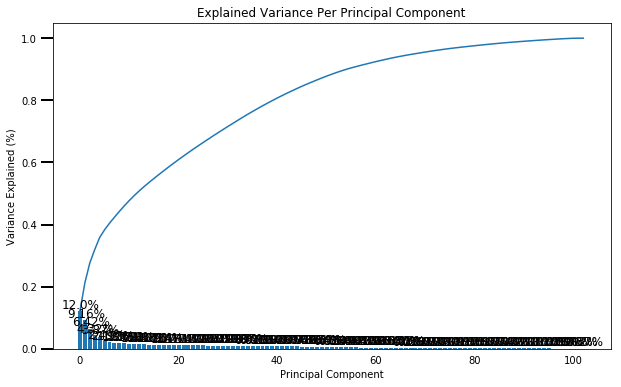

In [140]:
scree_plot(pca)

In [141]:
vals = pca.explained_variance_ratio_
vals

array([  1.20201164e-01,   9.16866648e-02,   6.42661633e-02,
         4.32264870e-02,   3.87755681e-02,   2.49940961e-02,
         2.12063371e-02,   1.92885926e-02,   1.87734067e-02,
         1.78821990e-02,   1.69348538e-02,   1.58774498e-02,
         1.48620380e-02,   1.40839497e-02,   1.33290245e-02,
         1.29047424e-02,   1.26039862e-02,   1.24275033e-02,
         1.22524553e-02,   1.18735452e-02,   1.17443981e-02,
         1.14513666e-02,   1.13144848e-02,   1.10396729e-02,
         1.07527490e-02,   1.06698786e-02,   1.05235938e-02,
         1.05175629e-02,   1.02607072e-02,   1.01180093e-02,
         1.00135727e-02,   9.94393093e-03,   9.81816769e-03,
         9.72003913e-03,   9.58679133e-03,   9.18818618e-03,
         9.07547922e-03,   8.92484281e-03,   8.59850003e-03,
         8.45339904e-03,   8.30903146e-03,   7.85954457e-03,
         7.79767122e-03,   7.52905330e-03,   7.41101707e-03,
         7.17313962e-03,   6.86987833e-03,   6.64513543e-03,
         6.51727230e-03,

In [143]:
# Cumulative 
vals_cumsum = np.cumsum(vals)
vals_cumsum

array([ 0.12020116,  0.21188783,  0.27615399,  0.31938048,  0.35815605,
        0.38315014,  0.40435648,  0.42364507,  0.44241848,  0.46030068,
        0.47723553,  0.49311298,  0.50797502,  0.52205897,  0.53538799,
        0.54829274,  0.56089672,  0.57332423,  0.58557668,  0.59745023,
        0.60919463,  0.62064599,  0.63196048,  0.64300015,  0.6537529 ,
        0.66442278,  0.67494637,  0.68546393,  0.69572464,  0.70584265,
        0.71585622,  0.72580015,  0.73561832,  0.74533836,  0.75492515,
        0.76411334,  0.77318882,  0.78211366,  0.79071216,  0.79916556,
        0.80747459,  0.81533414,  0.82313181,  0.83066086,  0.83807188,
        0.84524502,  0.85211489,  0.85876003,  0.8652773 ,  0.87173068,
        0.87786387,  0.88378789,  0.88943435,  0.89484496,  0.8997751 ,
        0.90441373,  0.90864573,  0.91278489,  0.91680886,  0.92077796,
        0.92464607,  0.92832129,  0.9319477 ,  0.93540378,  0.93871838,
        0.94176704,  0.94474101,  0.94747256,  0.95013017,  0.95

In [ ]:
import matplotlib.pyplot as pp
pp.plot(vals_cumsum)
pp.show()

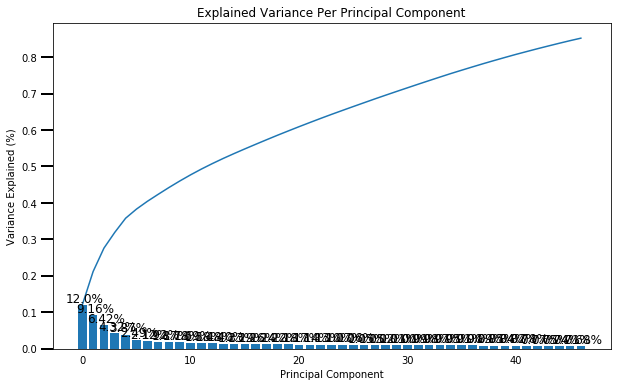

In [144]:
# Re-apply PCA to the data while selecting for number of components to retain. Use 85% at 47

# Apply PCA to the data.
pca2, X_pca2 = do_pca(47,azdias3)
scree_plot(pca2)

In [145]:
vals2 = pca2.explained_variance_ratio_
vals_cumsum2 = np.cumsum(vals2)
vals_cumsum2

array([ 0.12020116,  0.21188783,  0.27615399,  0.31938048,  0.35815605,
        0.38315014,  0.40435647,  0.42364506,  0.44241845,  0.46030064,
        0.47723546,  0.49311284,  0.50797471,  0.5220586 ,  0.53538745,
        0.54829168,  0.56089524,  0.57332223,  0.58557421,  0.5974473 ,
        0.60919057,  0.62064045,  0.63195361,  0.64299217,  0.65374238,
        0.66441091,  0.67493229,  0.68544593,  0.69570564,  0.70582242,
        0.71583461,  0.72577766,  0.73558946,  0.74530811,  0.75489238,
        0.76407208,  0.77314127,  0.78206363,  0.79065754,  0.79910294,
        0.80739394,  0.81524704,  0.82303522,  0.83055647,  0.8379613 ,
        0.84511761,  0.85194523])

### Discussion 2.2: Perform Dimensionality Reduction

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding dimensionality reduction. How many principal components / transformed features are you retaining for the next step of the analysis?)

I created a copy of the cleaned and scaled dataframe to do the PCA. I used the do_pca function from the lessons which  transforms data using PCA to create n_components, and provides back the results of the transformation. I used 108 columns for the do_pca function which is the total number of columns of the dataframe. I used the scree plot function to investigate the variance accounted for by each principal component. Using the results, I found the cumulative sum to find the number of features to use that can explain 85% of the variance which was 51. Finally I refit the 51 features on a PCA instance to perform the decided-on transformation.

### Step 2.3: Interpret Principal Components

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

- To investigate the features, you should map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. Use the data dictionary document to help you understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.
- You should investigate and interpret feature associations from the first three principal components in this substep. To help facilitate this, you should write a function that you can call at any time to print the sorted list of feature weights, for the *i*-th principal component. This might come in handy in the next step of the project, when you interpret the tendencies of the discovered clusters.

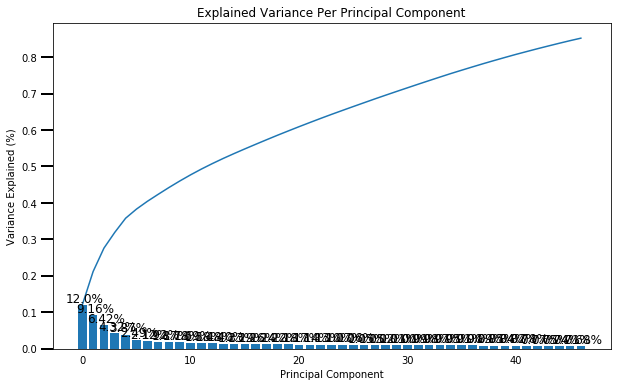

In [146]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
# HINT: Try defining a function here or in a new cell that you can reuse in the
# other cells.
scree_plot(pca2)

Use pca_results function to get the features of the principal components.

In [147]:
# Quick look at the composition of the components.
pca2.components_

array([[-0.12393974,  0.01302449, -0.20374626, ..., -0.13287228,
        -0.14258918,  0.1573678 ],
       [ 0.2291407 ,  0.04354329,  0.05219471, ...,  0.00578697,
        -0.0779617 ,  0.0792814 ],
       [-0.00649807, -0.29380123,  0.06336177, ...,  0.04428575,
        -0.01917174,  0.02980873],
       ..., 
       [-0.04828693,  0.02992228, -0.05804727, ..., -0.00095763,
        -0.12931594,  0.15407315],
       [ 0.10864007, -0.02783809, -0.0669169 , ...,  0.0604982 ,
         0.12683949, -0.12091717],
       [ 0.00350308, -0.0004567 ,  0.06136726, ..., -0.11855663,
        -0.03165957,  0.05276346]])

In [148]:
# Convert numpy to dataframe
X_pca2 = pd.DataFrame(X_pca2)
X_pca2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46
0,2.663961,-0.794099,-3.509257,-4.581521,1.920148,0.017187,-0.039408,-0.080822,-0.692396,0.547249,0.081076,0.469383,-0.202968,0.485479,0.412755,-0.375875,0.337614,-0.322823,-0.096095,-0.218345,-0.747721,1.387796,-0.566001,0.682769,0.243534,-0.112894,0.686047,-0.109144,-0.058440,-0.607791,1.123343,0.013757,-1.039884,0.213040,0.886808,-2.122419,-0.825512,-0.777827,0.875893,0.850550,-0.160110,0.284983,1.493081,-0.779672,-0.383115,1.011947,0.013130
1,4.614362,-2.368409,-1.099749,2.728513,-1.303229,-1.801488,2.038767,0.648825,2.148607,-0.386393,0.706405,0.917504,-2.072180,0.340841,0.058574,0.081857,1.686615,-1.469990,0.145356,2.208681,-2.446347,1.680250,1.448039,0.970130,0.099669,-1.059764,0.561540,-0.521874,-0.685235,-2.527049,-5.637336,9.490946,0.813583,-0.454003,2.520027,-1.156126,3.246826,1.404061,0.703771,-0.241152,1.352154,-2.228682,0.594101,-2.316855,1.223113,-0.694641,0.581555
2,-0.765996,-0.561994,-1.952284,3.620458,0.884671,-2.788574,-1.217802,0.296098,0.065603,-0.609716,1.146497,-1.024771,-1.101253,0.293883,-1.248920,-2.288308,0.812775,-0.068484,0.702620,0.758748,2.964130,-1.457957,1.599392,-1.037423,0.778724,-0.459793,1.365394,-0.359700,-0.830355,-0.160545,0.842138,-0.238166,-0.254217,0.139521,0.846663,0.840711,0.866247,-1.046372,0.253047,0.271070,0.908949,0.559145,0.020039,0.033190,0.018529,-0.168763,0.390687
3,-5.139493,1.154214,-1.073065,-0.584066,-2.117956,-0.084836,0.199118,-1.354030,-2.119531,0.617561,0.552404,-0.325643,-0.660127,1.069266,-0.129375,-0.161388,-1.618147,-0.479015,0.309843,-1.340934,-1.212427,0.186974,0.872077,0.400101,1.360183,1.130106,-1.559415,0.124067,1.203918,1.546516,-0.795067,-0.305528,-0.225700,1.154795,-0.014559,-0.264756,-0.717988,-0.986952,-0.005516,-0.745712,0.572207,-1.479599,0.359711,-0.133707,-0.085529,-0.520840,1.038685
4,0.101610,0.915777,3.751676,0.455366,0.590416,2.180690,-3.395273,1.945522,2.941361,-0.629358,-0.674737,-0.876761,2.623309,-2.080872,0.071298,-1.454818,0.874259,0.985485,0.227975,1.773981,-0.385388,-1.361081,-0.847471,1.907051,0.151475,-0.560958,-0.560607,0.711705,-0.155128,0.515422,-0.174927,-0.038519,0.442623,0.439849,-0.456189,0.647975,-1.056845,-0.733280,0.048866,-0.476215,0.999349,0.828355,0.851519,-0.379754,0.136718,-0.172164,0.363924


In [149]:
# Dimension indexing
dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca2.components_)+1)]

# PCA components
components = pd.DataFrame(pca2.components_, columns = header_list)
components.index = dimensions

# PCA explained variance
ratios = pca2.explained_variance_ratio_.reshape(len(pca2.components_), 1)
variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
variance_ratios.index = dimensions

In [150]:
components.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SOHO_KZ,VERS_TYP,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,CJT_GESAMTTYP_2.0,CJT_GESAMTTYP_3.0,CJT_GESAMTTYP_4.0,CJT_GESAMTTYP_5.0,CJT_GESAMTTYP_6.0,FINANZTYP_2,FINANZTYP_3,FINANZTYP_4,FINANZTYP_5,FINANZTYP_6,LP_FAMILIE_GROB_2.0,LP_FAMILIE_GROB_3.0,LP_FAMILIE_GROB_4.0,LP_FAMILIE_GROB_5.0,LP_STATUS_GROB_2.0,LP_STATUS_GROB_3.0,LP_STATUS_GROB_4.0,LP_STATUS_GROB_5.0,NATIONALITAET_KZ_2.0,NATIONALITAET_KZ_3.0,SHOPPER_TYP_1.0,SHOPPER_TYP_2.0,SHOPPER_TYP_3.0,ZABEOTYP_2,ZABEOTYP_3,ZABEOTYP_4,ZABEOTYP_5,ZABEOTYP_6,GEBAEUDETYP_2.0,CAMEO_DEUG_2015_2,CAMEO_DEUG_2015_3,CAMEO_DEUG_2015_4,CAMEO_DEUG_2015_5,CAMEO_DEUG_2015_6,CAMEO_DEUG_2015_7,CAMEO_DEUG_2015_8,CAMEO_DEUG_2015_9,PRAEGENDE_JUGENDJAHRE_DECADE,PRAEGENDE_JUGENDJAHRE_MOVEMENT,CAMEO_INTL_2015_WEALTH,CAMEO_INTL_2015_LIFE_STAGE,WOHNLAGE_RURAL,WOHNLAGE_neighborhood_quality
Dimension 1,-0.123940,0.013024,-0.203746,0.159410,-0.122309,0.100518,0.107015,0.134249,-0.106682,0.060359,-0.030010,0.007904,0.086711,0.129359,0.086149,-0.070318,-0.067044,-0.087325,0.052888,0.098244,0.035729,0.044354,0.058086,0.123344,0.080801,-0.004313,0.048401,-0.082947,-0.005612,0.133681,0.048587,-0.043604,0.104226,0.024210,-0.161216,-0.048651,-0.073678,-0.197399,-0.006431,0.103049,0.119211,-0.187975,-0.085742,0.185436,-0.136298,-0.094152,0.043095,-0.205837,-0.036751,0.069887,-0.007978,-0.198784,0.139317,0.202356,0.157100,0.026009,-0.146016,0.139954,0.171725,0.117594,-0.067390,0.016758,0.016706,0.007030,0.049651,-0.101220,-0.037541,0.068656,-0.010061,-0.054889,-0.034712,0.008333,-0.023136,-0.060108,0.013451,-0.027770,-0.120641,-0.112035,0.045966,0.026409,-0.012595,0.023254,-0.052746,-0.048153,-0.009374,0.034864,0.081999,0.029360,0.068251,-0.095658,-0.074996,-0.082564,-0.016110,-0.008689,0.026715,0.081200,0.106492,0.127166,-0.106682,0.197188,-0.132872,-0.142589,0.157368
Dimension 2,0.229141,0.043543,0.052195,-0.220561,0.221881,-0.207749,-0.215126,0.126151,-0.008827,-0.067062,0.161388,-0.041486,-0.142184,-0.212852,-0.138453,-0.005918,0.158817,0.187844,-0.155113,-0.166702,0.049925,0.024797,0.054676,-0.206107,-0.203057,-0.000668,0.014703,-0.057460,0.008292,0.086410,0.104587,0.042723,0.081935,0.035808,-0.062569,-0.051246,0.003478,-0.066279,0.017695,0.067488,0.090315,-0.102860,-0.083612,0.088097,-0.094287,-0.062083,-0.004538,-0.067311,-0.163203,-0.000684,-0.062645,-0.106386,0.076603,0.106504,0.120605,0.030493,-0.078543,0.066444,0.115556,0.080652,0.108782,-0.026107,-0.050331,-0.026335,-0.056637,0.088291,-0.088071,-0.103550,0.113482,0.068255,0.035267,-0.038645,-0.065124,-0.039091,-0.034327,-0.002876,-0.039945,-0.003170,-0.027917,-0.040064,-0.024319,0.019745,0.079941,-0.042824,0.171934,-0.089953,-0.080637,0.030667,0.054638,-0.038703,-0.032575,-0.044949,-0.003582,0.019093,0.022136,0.064346,0.051815,-0.230635,-0.008827,0.072932,0.005787,-0.077962,0.079281
Dimension 3,-0.006498,-0.293801,0.063362,-0.044037,0.018442,-0.163478,-0.092578,-0.028010,0.074161,-0.064956,0.048094,0.284501,0.189904,0.045075,0.072880,0.327654,-0.031578,-0.156776,0.279059,-0.102685,-0.297916,-0.281847,-0.313238,-0.006094,0.050293,0.006328,-0.059292,0.044411,0.012805,0.077903,-0.029314,-0.034668,0.065633,0.024557,0.018334,0.000508,0.094318,0.021712,0.055292,0.055172,0.065014,-0.036890,-0.103794,0.001744,-0.077847,-0.064587,-0.041446,0.029850,0.022943,-0.060541,-0.128096,-0.046465

In [151]:
variance_ratios

,Explained Variance
Dimension 1,0.1202
Dimension 2,0.0917
Dimension 3,0.0643
Dimension 4,0.0432
Dimension 5,0.0388
Dimension 6,0.0250
Dimension 7,0.0212
Dimension 8,0.0193
Dimension 9,0.0188
Dimension 10,0.0179


In [152]:
# PCA explained variance
weights = pd.DataFrame(pca2.components_, columns = header_list)
weights.index = dimensions
weights.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SOHO_KZ,VERS_TYP,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,CJT_GESAMTTYP_2.0,CJT_GESAMTTYP_3.0,CJT_GESAMTTYP_4.0,CJT_GESAMTTYP_5.0,CJT_GESAMTTYP_6.0,FINANZTYP_2,FINANZTYP_3,FINANZTYP_4,FINANZTYP_5,FINANZTYP_6,LP_FAMILIE_GROB_2.0,LP_FAMILIE_GROB_3.0,LP_FAMILIE_GROB_4.0,LP_FAMILIE_GROB_5.0,LP_STATUS_GROB_2.0,LP_STATUS_GROB_3.0,LP_STATUS_GROB_4.0,LP_STATUS_GROB_5.0,NATIONALITAET_KZ_2.0,NATIONALITAET_KZ_3.0,SHOPPER_TYP_1.0,SHOPPER_TYP_2.0,SHOPPER_TYP_3.0,ZABEOTYP_2,ZABEOTYP_3,ZABEOTYP_4,ZABEOTYP_5,ZABEOTYP_6,GEBAEUDETYP_2.0,CAMEO_DEUG_2015_2,CAMEO_DEUG_2015_3,CAMEO_DEUG_2015_4,CAMEO_DEUG_2015_5,CAMEO_DEUG_2015_6,CAMEO_DEUG_2015_7,CAMEO_DEUG_2015_8,CAMEO_DEUG_2015_9,PRAEGENDE_JUGENDJAHRE_DECADE,PRAEGENDE_JUGENDJAHRE_MOVEMENT,CAMEO_INTL_2015_WEALTH,CAMEO_INTL_2015_LIFE_STAGE,WOHNLAGE_RURAL,WOHNLAGE_neighborhood_quality
Dimension 1,-0.123940,0.013024,-0.203746,0.159410,-0.122309,0.100518,0.107015,0.134249,-0.106682,0.060359,-0.030010,0.007904,0.086711,0.129359,0.086149,-0.070318,-0.067044,-0.087325,0.052888,0.098244,0.035729,0.044354,0.058086,0.123344,0.080801,-0.004313,0.048401,-0.082947,-0.005612,0.133681,0.048587,-0.043604,0.104226,0.024210,-0.161216,-0.048651,-0.073678,-0.197399,-0.006431,0.103049,0.119211,-0.187975,-0.085742,0.185436,-0.136298,-0.094152,0.043095,-0.205837,-0.036751,0.069887,-0.007978,-0.198784,0.139317,0.202356,0.157100,0.026009,-0.146016,0.139954,0.171725,0.117594,-0.067390,0.016758,0.016706,0.007030,0.049651,-0.101220,-0.037541,0.068656,-0.010061,-0.054889,-0.034712,0.008333,-0.023136,-0.060108,0.013451,-0.027770,-0.120641,-0.112035,0.045966,0.026409,-0.012595,0.023254,-0.052746,-0.048153,-0.009374,0.034864,0.081999,0.029360,0.068251,-0.095658,-0.074996,-0.082564,-0.016110,-0.008689,0.026715,0.081200,0.106492,0.127166,-0.106682,0.197188,-0.132872,-0.142589,0.157368
Dimension 2,0.229141,0.043543,0.052195,-0.220561,0.221881,-0.207749,-0.215126,0.126151,-0.008827,-0.067062,0.161388,-0.041486,-0.142184,-0.212852,-0.138453,-0.005918,0.158817,0.187844,-0.155113,-0.166702,0.049925,0.024797,0.054676,-0.206107,-0.203057,-0.000668,0.014703,-0.057460,0.008292,0.086410,0.104587,0.042723,0.081935,0.035808,-0.062569,-0.051246,0.003478,-0.066279,0.017695,0.067488,0.090315,-0.102860,-0.083612,0.088097,-0.094287,-0.062083,-0.004538,-0.067311,-0.163203,-0.000684,-0.062645,-0.106386,0.076603,0.106504,0.120605,0.030493,-0.078543,0.066444,0.115556,0.080652,0.108782,-0.026107,-0.050331,-0.026335,-0.056637,0.088291,-0.088071,-0.103550,0.113482,0.068255,0.035267,-0.038645,-0.065124,-0.039091,-0.034327,-0.002876,-0.039945,-0.003170,-0.027917,-0.040064,-0.024319,0.019745,0.079941,-0.042824,0.171934,-0.089953,-0.080637,0.030667,0.054638,-0.038703,-0.032575,-0.044949,-0.003582,0.019093,0.022136,0.064346,0.051815,-0.230635,-0.008827,0.072932,0.005787,-0.077962,0.079281
Dimension 3,-0.006498,-0.293801,0.063362,-0.044037,0.018442,-0.163478,-0.092578,-0.028010,0.074161,-0.064956,0.048094,0.284501,0.189904,0.045075,0.072880,0.327654,-0.031578,-0.156776,0.279059,-0.102685,-0.297916,-0.281847,-0.313238,-0.006094,0.050293,0.006328,-0.059292,0.044411,0.012805,0.077903,-0.029314,-0.034668,0.065633,0.024557,0.018334,0.000508,0.094318,0.021712,0.055292,0.055172,0.065014,-0.036890,-0.103794,0.001744,-0.077847,-0.064587,-0.041446,0.029850,0.022943,-0.060541,-0.128096,-0.046465

### Join variance_ratios and weights

In [153]:
results = pd.concat([variance_ratios, weights], axis = 1)
results[:3]

,Explained Variance,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SOHO_KZ,VERS_TYP,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,CJT_GESAMTTYP_2.0,CJT_GESAMTTYP_3.0,CJT_GESAMTTYP_4.0,CJT_GESAMTTYP_5.0,CJT_GESAMTTYP_6.0,FINANZTYP_2,FINANZTYP_3,FINANZTYP_4,FINANZTYP_5,FINANZTYP_6,LP_FAMILIE_GROB_2.0,LP_FAMILIE_GROB_3.0,LP_FAMILIE_GROB_4.0,LP_FAMILIE_GROB_5.0,LP_STATUS_GROB_2.0,LP_STATUS_GROB_3.0,LP_STATUS_GROB_4.0,LP_STATUS_GROB_5.0,NATIONALITAET_KZ_2.0,NATIONALITAET_KZ_3.0,SHOPPER_TYP_1.0,SHOPPER_TYP_2.0,SHOPPER_TYP_3.0,ZABEOTYP_2,ZABEOTYP_3,ZABEOTYP_4,ZABEOTYP_5,ZABEOTYP_6,GEBAEUDETYP_2.0,CAMEO_DEUG_2015_2,CAMEO_DEUG_2015_3,CAMEO_DEUG_2015_4,CAMEO_DEUG_2015_5,CAMEO_DEUG_2015_6,CAMEO_DEUG_2015_7,CAMEO_DEUG_2015_8,CAMEO_DEUG_2015_9,PRAEGENDE_JUGENDJAHRE_DECADE,PRAEGENDE_JUGENDJAHRE_MOVEMENT,CAMEO_INTL_2015_WEALTH,CAMEO_INTL_2015_LIFE_STAGE,WOHNLAGE_RURAL,WOHNLAGE_neighborhood_quality
Dimension 1,0.1202,-0.123940,0.013024,-0.203746,0.159410,-0.122309,0.100518,0.107015,0.134249,-0.106682,0.060359,-0.030010,0.007904,0.086711,0.129359,0.086149,-0.070318,-0.067044,-0.087325,0.052888,0.098244,0.035729,0.044354,0.058086,0.123344,0.080801,-0.004313,0.048401,-0.082947,-0.005612,0.133681,0.048587,-0.043604,0.104226,0.024210,-0.161216,-0.048651,-0.073678,-0.197399,-0.006431,0.103049,0.119211,-0.187975,-0.085742,0.185436,-0.136298,-0.094152,0.043095,-0.205837,-0.036751,0.069887,-0.007978,-0.198784,0.139317,0.202356,0.157100,0.026009,-0.146016,0.139954,0.171725,0.117594,-0.067390,0.016758,0.016706,0.007030,0.049651,-0.101220,-0.037541,0.068656,-0.010061,-0.054889,-0.034712,0.008333,-0.023136,-0.060108,0.013451,-0.027770,-0.120641,-0.112035,0.045966,0.026409,-0.012595,0.023254,-0.052746,-0.048153,-0.009374,0.034864,0.081999,0.029360,0.068251,-0.095658,-0.074996,-0.082564,-0.016110,-0.008689,0.026715,0.081200,0.106492,0.127166,-0.106682,0.197188,-0.132872,-0.142589,0.157368
Dimension 2,0.0917,0.229141,0.043543,0.052195,-0.220561,0.221881,-0.207749,-0.215126,0.126151,-0.008827,-0.067062,0.161388,-0.041486,-0.142184,-0.212852,-0.138453,-0.005918,0.158817,0.187844,-0.155113,-0.166702,0.049925,0.024797,0.054676,-0.206107,-0.203057,-0.000668,0.014703,-0.057460,0.008292,0.086410,0.104587,0.042723,0.081935,0.035808,-0.062569,-0.051246,0.003478,-0.066279,0.017695,0.067488,0.090315,-0.102860,-0.083612,0.088097,-0.094287,-0.062083,-0.004538,-0.067311,-0.163203,-0.000684,-0.062645,-0.106386,0.076603,0.106504,0.120605,0.030493,-0.078543,0.066444,0.115556,0.080652,0.108782,-0.026107,-0.050331,-0.026335,-0.056637,0.088291,-0.088071,-0.103550,0.113482,0.068255,0.035267,-0.038645,-0.065124,-0.039091,-0.034327,-0.002876,-0.039945,-0.003170,-0.027917,-0.040064,-0.024319,0.019745,0.079941,-0.042824,0.171934,-0.089953,-0.080637,0.030667,0.054638,-0.038703,-0.032575,-0.044949,-0.003582,0.019093,0.022136,0.064346,0.051815,-0.230635,-0.008827,0.072932,0.005787,-0.077962,0.079281
Dimension 3,0.0643,-0.006498,-0.293801,0.063362,-0.044037,0.018442,-0.163478,-0.092578,-0.028010,0.074161,-0.064956,0.048094,0.284501,0.189904,0.045075,0.072880,0.327654,-0.031578,-0.156776,0.279059,-0.102685,-0.297916,-0.281847,-0.313238,-0.006094,0.050293,0.006328,-0.059292,0.044411,0.012805,0.077903,-0.029314,-0.034668,0.065633,0.024557,0.018334,0.000508,0.094318,0.021712,0.055292,0.055172,0.065014,-0.036890,-0.103794,0.001744,-0.077847,-0.064587,-0.041446,0.02985

In [154]:
results.iloc[1].sort_values(ascending=False)[:10]

ALTERSKATEGORIE_GROB    0.229141
FINANZ_VORSORGER        0.221881
SEMIO_ERL               0.187844
ZABEOTYP_3              0.171934
RETOURTYP_BK_S          0.161388
SEMIO_LUST              0.158817
FINANZ_HAUSBAUER        0.126151
PLZ8_ANTG4              0.120605
ORTSGR_KLS9             0.115556
FINANZTYP_5             0.113482
Name: Dimension 2, dtype: float64

In [155]:
results.iloc[1].sort_values(ascending=True)[:10]

PRAEGENDE_JUGENDJAHRE_DECADE   -0.230635
FINANZ_SPARER                  -0.220561
FINANZ_UNAUFFAELLIGER          -0.215126
SEMIO_REL                      -0.212852
FINANZ_ANLEGER                 -0.207749
SEMIO_PFLICHT                  -0.206107
SEMIO_TRADV                    -0.203057
SEMIO_RAT                      -0.166702
ONLINE_AFFINITAET              -0.163203
SEMIO_KULT                     -0.155113
Name: Dimension 2, dtype: float64

You should investigate and interpret feature associations from the first three principal components in this substep. To help facilitate this, you should write a function that you can call at any time to print the sorted list of feature weights, for the i-th principal component. This might come in handy in the next step of the project, when you interpret the tendencies of the discovered clusters.

In [156]:
def pca_weights(principal_component,number_of_weights):
    # Dimension indexing
    dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca2.components_)+1)]

    # PCA components
    components = pd.DataFrame(pca2.components_, columns = header_list)
    components.index = dimensions
    
    # PCA explained variance
    ratios = pca2.explained_variance_ratio_.reshape(len(pca2.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions
    
    # PCA explained variance
    weights = pd.DataFrame(pca2.components_, columns = header_list)
    weights.index = dimensions
    
    # Join dataframes
    results = pd.concat([variance_ratios, weights], axis = 1)
    
    print('PCA',principal_component,results.iloc[principal_component-1][:1])
    print('')
    print('PCA',principal_component, 'Top', number_of_weights, 'weights')
    print(results.iloc[principal_component-1].sort_values(ascending=False)[:number_of_weights])
    print('')
    print('PCA',principal_component, 'Bottom', number_of_weights, 'weights')
    print(results.iloc[principal_component-1].sort_values(ascending=True)[:number_of_weights])

In [157]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
pca_weights(1,5)

PCA 1 Explained Variance    0.1202
Name: Dimension 1, dtype: float64

PCA 1 Top 5 weights
PLZ8_ANTG3                0.202356
CAMEO_INTL_2015_WEALTH    0.197188
EWDICHTE                  0.185436
ORTSGR_KLS9               0.171725
FINANZ_SPARER             0.159410
Name: Dimension 1, dtype: float64

PCA 1 Bottom 5 weights
MOBI_REGIO          -0.205837
FINANZ_MINIMALIST   -0.203746
PLZ8_ANTG1          -0.198784
KBA05_ANTG1         -0.197399
KBA05_GBZ           -0.187975
Name: Dimension 1, dtype: float64


In [158]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.
pca_weights(2,5)

PCA 2 Explained Variance    0.0917
Name: Dimension 2, dtype: float64

PCA 2 Top 5 weights
ALTERSKATEGORIE_GROB    0.229141
FINANZ_VORSORGER        0.221881
SEMIO_ERL               0.187844
ZABEOTYP_3              0.171934
RETOURTYP_BK_S          0.161388
Name: Dimension 2, dtype: float64

PCA 2 Bottom 5 weights
PRAEGENDE_JUGENDJAHRE_DECADE   -0.230635
FINANZ_SPARER                  -0.220561
FINANZ_UNAUFFAELLIGER          -0.215126
SEMIO_REL                      -0.212852
FINANZ_ANLEGER                 -0.207749
Name: Dimension 2, dtype: float64


In [159]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.
pca_weights(3,5)

PCA 3 Explained Variance    0.0643
Name: Dimension 3, dtype: float64

PCA 3 Top 5 weights
SEMIO_VERT     0.327654
SEMIO_SOZ      0.284501
SEMIO_KULT     0.279059
SEMIO_FAM      0.189904
FINANZTYP_5    0.126846
Name: Dimension 3, dtype: float64

PCA 3 Bottom 5 weights
SEMIO_KAEM       -0.313238
SEMIO_KRIT       -0.297916
ANREDE_KZ        -0.293801
SEMIO_DOM        -0.281847
FINANZ_ANLEGER   -0.163478
Name: Dimension 3, dtype: float64


### Discussion 2.3: Interpret Principal Components

(Double-click this cell and replace this text with your own text, reporting your observations from detailed investigation of the first few principal components generated. Can we interpret positive and negative values from them in a meaningful way?)

**PCA 1**  
PCA 1 Explained Variance    0.1202

**PCA 1 Top 5 weights**  
PLZ8_ANTG3                0.202356  
CAMEO_INTL_2015_WEALTH    0.197188  
EWDICHTE                  0.185436  
ORTSGR_KLS9               0.171725  
FINANZ_SPARER             0.159410   

For the first principal component, the explained variance is 12.02%. The top five weights are PLZ8_ANTG3 (Number of 6-10 family houses in the PLZ8 region), CAMEO_INTL_2015_WEALTH (German CAMEO: Wealth of the households), EWDICHTE (Density of households per square kilometer), ORTSGR_KLS9 (Size of community), and FINANZ_SPARER (Financial typology - SPARER: money-saver). It looks like PCA1 top weights have household wealth and sizes that matter the most.

**PCA 1 Bottom 5 weights**  
MOBI_REGIO          -0.205837  
FINANZ_MINIMALIST   -0.203746  
PLZ8_ANTG1          -0.198784  
KBA05_ANTG1         -0.197399  
KBA05_GBZ           -0.187975  

The bottom five weights are MOBI_REGIO (Movement patterns), FINANZ_MINIMALIST (MINIMALIST: low financial interest), PLZ8_ANTG1 (Number of 1-2 family houses in the PLZ8 region), KBA05_ANTG1 (Number of 1-2 family houses in the microcell), KBA05_GBZ (Number of buildings in the microcell). It looks like PCA1 bottom weights are more on smaller household sizes and lower financial interest.

**PCA 2**  
PCA 2 Explained Variance    0.0917 

**PCA 2 Top 5 weights**  
ALTERSKATEGORIE_GROB    0.229141  
FINANZ_VORSORGER        0.221881  
SEMIO_ERL               0.187844  
ZABEOTYP_3              0.171934  
RETOURTYP_BK_S          0.161388  

For the second principal component, the explained variance is 9.17%. The top five weights are ALTERSKATEGORIE_GROB (Estimated age based on given name analysis), FINANZ_VORSORGER (Financial typology, for each dimension - VORSORGER: be prepared), SEMIO_ERL (Personality typology, for each dimension: ERL: event-oriented), ZABEOTYP_3 (Energy consumption typology - 3: fair supplied), and RETOURTYP_BK_S (Return type). It looks like mixed of age, financial, and shopping habits features.

**PCA 2 Bottom 5 weights**  
PRAEGENDE_JUGENDJAHRE_DECADE   -0.230635  
FINANZ_SPARER                  -0.220561  
FINANZ_UNAUFFAELLIGER          -0.215126  
SEMIO_REL                      -0.212852  
FINANZ_ANLEGER                 -0.207749  

The bottom five weights are PRAEGENDE_JUGENDJAHRE_DECADE (Dominating movement of person's youth based on the decade), FINANZ_SPARER (Financial typology - SPARER: money-saver),  FINANZ_UNAUFFAELLIGER (Financial typology, for each dimension), SEMIO_REL (Personality typology, for each dimension: REL: religious), and FINANZ_ANLEGER(ANLEGER: investor). It looks like the bottom weights are financially related.

**PCA 3**   
PCA 3 Explained Variance    0.0643  

**PCA 3 Top 5 weights**  
SEMIO_VERT     0.327654  
SEMIO_SOZ      0.284501  
SEMIO_KULT     0.279059  
SEMIO_FAM      0.189904  
FINANZTYP_5    0.126846  

For the third principal component, the explained variance is 6.43%. The top five weights are SEMIO_VERT (Personality typology, for each dimension: VERT: dreamful), SEMIO_SOZ (Personality typology, for each dimension: SOZ: socially-minded), SEMIO_KULT (Personality typology, for each dimension:  KULT: cultural-minded), SEMIO_FAM (Personality typology, for each dimension: FAM: family-minded), and FINANZTYP_5 (Most descriptive financial type for individual, 5: investor (ANLEGER). It looks like the top weights are mostly related to personality types under the SEMIO variable.

**PCA 3 Bottom 5 weights**  
SEMIO_KAEM       -0.313238  
SEMIO_KRIT       -0.297916  
ANREDE_KZ        -0.293801  
SEMIO_DOM        -0.281847  
FINANZ_ANLEGER   -0.163478   

The bottom five weights are SEMIO_KAEM (KAEM: combative attitude), SEMIO_KRIT (KRIT: critical-minded), ANREDE_KZ (Gender), SEMIO_DOM Personality typology, for each dimension: DOM: dominant-minded), FINANZ_ANLEGER (ANLEGER: investor). It looks like the bottom weights are related personality (combative, dominant-minded, critical-minded).

## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

You've assessed and cleaned the demographics data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. In this substep, you will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- Use sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Then, compute the average difference from each point to its assigned cluster's center. **Hint**: The KMeans object's `.score()` method might be useful here, but note that in sklearn, scores tend to be defined so that larger is better. Try applying it to a small, toy dataset, or use an internet search to help your understanding.
- Perform the above two steps for a number of different cluster counts. You can then see how the average distance decreases with an increasing number of clusters. However, each additional cluster provides a smaller net benefit. Use this fact to select a final number of clusters in which to group the data. **Warning**: because of the large size of the dataset, it can take a long time for the algorithm to resolve. The more clusters to fit, the longer the algorithm will take. You should test for cluster counts through at least 10 clusters to get the full picture, but you shouldn't need to test for a number of clusters above about 30.
- Once you've selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. Make sure that you also obtain the cluster assignments for the general demographics data, since you'll be using them in the final Step 3.3.

In [160]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from IPython import display
%matplotlib inline

# Make the images larger
plt.rcParams['figure.figsize'] = (16, 9)

In [161]:
# Fit a kmeans model with changing k from 10-30
# Obtain the score for each model (take the absolute value)
# Plot the score against k

def get_kmeans_score(data, center):
    '''
    returns the kmeans score regarding SSE for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the SSE score for the kmeans model fit to the data
    '''
    #instantiate kmeans
    kmeans = KMeans(n_clusters=center)

    # Then fit the model to your data using the fit method
    model = kmeans.fit(data)
    
    # Obtain a score related to the model fit
    score = np.abs(model.score(data))
    
    return score

Use smaller dataset of 10K rows.

In [162]:
test_pca = X_pca2.sample(frac=0.10)
test_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46
870119,4.564357,-2.006330,3.966166,0.569147,0.168935,-1.349373,-0.634543,-1.978604,0.764636,0.984152,0.856354,-0.517912,-0.318860,2.884191,0.126502,0.367477,-1.877590,1.129060,-0.985098,0.149504,0.048377,-1.710911,-0.734897,-1.256294,1.076440,1.339844,0.278348,-1.085264,1.788339,-1.222945,0.065770,0.237302,-0.184056,-0.513596,-1.296934,-0.180822,0.878171,0.220692,1.108704,-1.622924,0.757358,0.186520,-0.053175,0.447406,-1.780912,0.702771,-0.425600
742388,2.648533,3.405122,-0.716606,2.585385,-0.591361,1.420910,-1.913817,1.661325,-1.548393,-1.182642,-1.676685,-1.794084,-0.148972,-2.023088,0.881266,-0.599207,0.669364,-0.235397,1.082088,2.197395,-0.595706,-1.244830,-0.758152,1.052153,0.332479,0.150402,-2.595696,-0.463234,-1.857749,0.768124,2.115739,2.521106,-0.870633,1.482919,2.027528,-0.391868,2.381143,-0.713628,1.209909,-1.318400,0.143585,1.090372,-0.721967,-0.714518,0.673193,-0.421462,-0.439744
15594,-4.359265,-1.125325,-1.444466,-0.999924,-2.868669,-0.818698,-0.499853,-1.872060,0.121047,1.325230,-0.728218,-0.664691,-1.447940,1.042177,0.331966,0.669935,-0.910666,1.123265,-1.064695,0.701174,0.224632,0.097847,0.923338,-0.915117,0.970664,0.775158,1.200803,-0.824006,-0.175063,0.268064,0.471192,-0.522431,1.337748,1.012377,1.022178,0.171790,-0.730754,-0.407046,-0.728361,-1.414851,0.449048,-1.828911,-0.798575,0.303300,0.215261,0.305103,0.007241
524059,0.973990,-4.419034,-1.905849,1.118738,-2.041295,-1.719139,-1.391813,1.461912,0.231898,-0.722216,0.107499,1.888530,0.042865,2.116187,-1.375062,-0.591112,0.236090,0.179216,-0.729777,0.704661,-1.551879,-0.083553,0.705001,2.848301,-2.788146,-0.773335,1.148584,2.213309,-1.582025,2.459725,-0.788130,-0.481208,0.763138,-0.569429,-0.551612,-0.786580,0.754062,0.968125,0.692259,-1.558184,1.813782,-0.489630,-0.085663,0.216901,-1.262683,0.719581,-0.830914
323161,2.445664,3.992029,-1.245350,1.632162,0.501368,-0.656938,-0.559082,-0.970142,1.145275,-1.078911,0.484930,-0.702963,1.429317,0.399095,0.652836,-0.934920,-0.009613,-0.976798,0.351395,0.164831,-1.568724,-0.693459,0.405460,0.534634,-1.362521,1.692161,-1.322206,-1.816332,-0.929555,-1.835099,-1.556605,-2.302770,-0.489103,1.675413,1.651739,-0.133620,0.143262,0.025500,0.254041,-1.171672,-0.024436,-0.880318,-1.749708,-0.265458,-0.696910,0.724455,0.927939


In [163]:
test_pca.shape

(89122, 47)

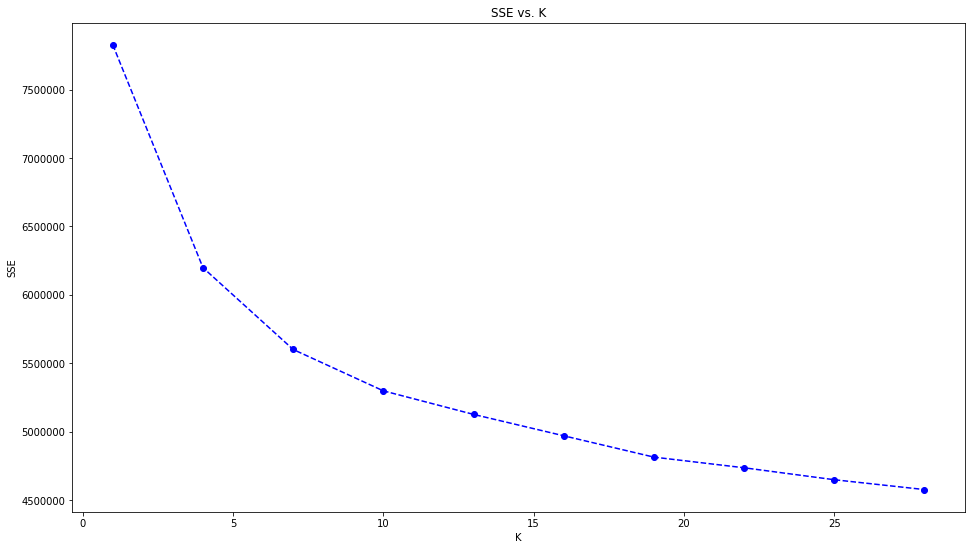

In [164]:
# Test run
# Over a number of different cluster counts...
    # run k-means clustering on the data and...
    # compute the average within-cluster distances.

scores = []
centers = list(range(1,31,3))

for center in centers:
    scores.append(get_kmeans_score(test_pca, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('SSE');
plt.title('SSE vs. K');

The test run works so let's scale the analysis. We will run every 3 clusters sizes.

[1, 4, 7, 10, 13, 16, 19, 22, 25, 28]

In [165]:

# Over a number of different cluster counts...
    # run k-means clustering on the data and...
    # compute the average within-cluster distances.

# scores = []
# centers = list(range(1,31,3))

# for center in centers:
#     scores.append(get_kmeans_score(X_pca2, center))
    
# # Investigate the change in within-cluster distance across number of clusters.
# # HINT: Use matplotlib's plot function to visualize this relationship.

# plt.plot(centers, scores, linestyle='--', marker='o', color='b');
# plt.xlabel('K');
# plt.ylabel('SSE');
# plt.title('SSE vs. K');

In [166]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.

# Try instantiating a model with 10 centers
kmeans = KMeans(n_clusters=10)

# Then fit the model to your data using the fit method
model = kmeans.fit(X_pca2)

# Finally predict the labels on the same data to show the category that point belongs to
labels = model.predict(X_pca2)

### Discussion 3.1: Apply Clustering to General Population

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding clustering. Into how many clusters have you decided to segment the population?)

Based on the two plots above, 10 clusters seem to be appropriate number as the kmeans score decreases slowly after the 10 clusters. At the beginning, I randomly picked 10% of the dataset and ran 10 different cluster sizes to see if the score plot was significantly different than running on the full dataset. I saw that both sample and full datasets are very similar in trend. In the future, if I have a large dataset of nearly one million, I will randomly select 10% of the dataset and run through the Kmeans scoring of multiple clusters to see the appropriate cluster size. Then I will use the cluster size on the full dataset.

### Step 3.2: Apply All Steps to the Customer Data

Now that you have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters. Take care to not confuse this for re-fitting all of the models to the customer data. Instead, you're going to use the fits from the general population to clean, transform, and cluster the customer data. In the last step of the project, you will interpret how the general population fits apply to the customer data.

- Don't forget when loading in the customers data, that it is semicolon (`;`) delimited.
- Apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier. (You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.)
- Use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, you should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor should you be creating new sklearn objects! Carry the data through the feature scaling, PCA, and clustering steps, obtaining cluster assignments for all of the data in the customer demographics data.

In [167]:
# Load in the customer demographics data.
customers = pd.read_csv('Udacity_CUSTOMERS_Subset.csv',sep = ';')

# Load in the feature summary file.
feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv',sep = ';')

In [168]:
customers.shape

(191652, 85)

In [169]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.

# Clean the data
customers1 = clean_data(customers)
customers1.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SOHO_KZ,VERS_TYP,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,CJT_GESAMTTYP_2.0,CJT_GESAMTTYP_3.0,CJT_GESAMTTYP_4.0,CJT_GESAMTTYP_5.0,CJT_GESAMTTYP_6.0,FINANZTYP_2,FINANZTYP_3,FINANZTYP_4,FINANZTYP_5,FINANZTYP_6,LP_FAMILIE_GROB_2.0,LP_FAMILIE_GROB_3.0,LP_FAMILIE_GROB_4.0,LP_FAMILIE_GROB_5.0,LP_STATUS_GROB_2.0,LP_STATUS_GROB_3.0,LP_STATUS_GROB_4.0,LP_STATUS_GROB_5.0,NATIONALITAET_KZ_2.0,NATIONALITAET_KZ_3.0,SHOPPER_TYP_1.0,SHOPPER_TYP_2.0,SHOPPER_TYP_3.0,ZABEOTYP_2,ZABEOTYP_3,ZABEOTYP_4,ZABEOTYP_5,ZABEOTYP_6,GEBAEUDETYP_2.0,CAMEO_DEUG_2015_2,CAMEO_DEUG_2015_3,CAMEO_DEUG_2015_4,CAMEO_DEUG_2015_5,CAMEO_DEUG_2015_6,CAMEO_DEUG_2015_7,CAMEO_DEUG_2015_8,CAMEO_DEUG_2015_9,PRAEGENDE_JUGENDJAHRE_DECADE,PRAEGENDE_JUGENDJAHRE_MOVEMENT,CAMEO_INTL_2015_WEALTH,CAMEO_INTL_2015_LIFE_STAGE,WOHNLAGE_RURAL,WOHNLAGE_neighborhood_quality
0,4.0,1,5,1,5,1,2,2,1,1.0,5.0,6,5,2,6,6,7,3,4,1,3,1,1,2,1,0.0,1.0,2.0,0.0,1.0,6.0,9.0,1.0,0.0,5.0,1992.0,1,2.0,2.0,0.0,0.0,4.0,3.0,2.0,4.0,4.0,1.0,4.0,3.0,1.0,1201.0,3.0,3.0,1.0,0.0,5.0,5.0,1.0,2.0,1.0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,50.0,1.0,1,3,1.0,0.0
1,4.0,1,5,1,5,1,3,2,0,1.0,NaN,3,6,2,6,7,5,3,4,1,3,3,2,4,1,0.0,1.0,3.0,0.0,NaN,NaN,9.0,NaN,NaN,5.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,2,5,1,5,1,4,4,1,2.0,5.0,2,2,1,3,3,7,7,1,2,7,5,6,4,1,0.0,2.0,1.0,0.0,1.0,6.0,9.0,1.0,0.0,1.0,1992.0,1,2.0,2.0,0.0,0.0,3.0,7.0,4.0,1.0,3.0,3.0,3.0,1.0,7.0,433.0,2.0,3.0,3.0,1.0,3.0,2.0,3.0,5.0,3.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,50.0,1.0,3,4,0.0,2.0
3,4.0,1,5,1,5,2,1,2,0,2.0,3.0,6,5,3,4,7,5,3,4,3,3,3,3,3,4,0.0,1.0,0.0,0.0,4.0,NaN,9.0,NaN,NaN,2.0,1992.0,1,3.0,0.0,0.0,0.0,4.0,7.0,1.0,7.0,4.0,3.0,4.0,2.0,6.0,755.0,3.0,2.0,1.0,0.0,3.0,4.0,1.0,3.0,1.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,40.0,0.0,2,4,1.0,0.0
4,3.0,1,3,1,4,4,5,2,0,3.0,5.0,4,5,4,6,5,6,4,5,5,3,5,2,5,4,0.0,2.0,4.0,0.0,6.0,2.0,9.0,7.0,0.0,1.0,1992.0,1,0.0,3.0,2.0,0.0,3.0,3.0,4.0,4.0,3.0,4.0,3.0,5.0,7.0,513.0,2.0,4.0,2.0,1.0,3.0,3.0,3.0,5.0,1.0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,70.0,0.0,4,1,0.0,3.0


In [170]:
customers1.shape

(191652, 103)

In [171]:
# Transform the data

# Keep headers from data
header_list1 = list(customers1.columns.values)

In [172]:
header_list

['ALTERSKATEGORIE_GROB',
 'ANREDE_KZ',
 'FINANZ_MINIMALIST',
 'FINANZ_SPARER',
 'FINANZ_VORSORGER',
 'FINANZ_ANLEGER',
 'FINANZ_UNAUFFAELLIGER',
 'FINANZ_HAUSBAUER',
 'GREEN_AVANTGARDE',
 'HEALTH_TYP',
 'RETOURTYP_BK_S',
 'SEMIO_SOZ',
 'SEMIO_FAM',
 'SEMIO_REL',
 'SEMIO_MAT',
 'SEMIO_VERT',
 'SEMIO_LUST',
 'SEMIO_ERL',
 'SEMIO_KULT',
 'SEMIO_RAT',
 'SEMIO_KRIT',
 'SEMIO_DOM',
 'SEMIO_KAEM',
 'SEMIO_PFLICHT',
 'SEMIO_TRADV',
 'SOHO_KZ',
 'VERS_TYP',
 'ANZ_PERSONEN',
 'ANZ_TITEL',
 'HH_EINKOMMEN_SCORE',
 'W_KEIT_KIND_HH',
 'WOHNDAUER_2008',
 'ANZ_HAUSHALTE_AKTIV',
 'ANZ_HH_TITEL',
 'KONSUMNAEHE',
 'MIN_GEBAEUDEJAHR',
 'OST_WEST_KZ',
 'KBA05_ANTG1',
 'KBA05_ANTG2',
 'KBA05_ANTG3',
 'KBA05_ANTG4',
 'KBA05_GBZ',
 'BALLRAUM',
 'EWDICHTE',
 'INNENSTADT',
 'GEBAEUDETYP_RASTER',
 'KKK',
 'MOBI_REGIO',
 'ONLINE_AFFINITAET',
 'REGIOTYP',
 'KBA13_ANZAHL_PKW',
 'PLZ8_ANTG1',
 'PLZ8_ANTG2',
 'PLZ8_ANTG3',
 'PLZ8_ANTG4',
 'PLZ8_HHZ',
 'PLZ8_GBZ',
 'ARBEIT',
 'ORTSGR_KLS9',
 'RELAT_AB',
 'CJT_GESAMTTY

In [173]:
header_list1

['ALTERSKATEGORIE_GROB',
 'ANREDE_KZ',
 'FINANZ_MINIMALIST',
 'FINANZ_SPARER',
 'FINANZ_VORSORGER',
 'FINANZ_ANLEGER',
 'FINANZ_UNAUFFAELLIGER',
 'FINANZ_HAUSBAUER',
 'GREEN_AVANTGARDE',
 'HEALTH_TYP',
 'RETOURTYP_BK_S',
 'SEMIO_SOZ',
 'SEMIO_FAM',
 'SEMIO_REL',
 'SEMIO_MAT',
 'SEMIO_VERT',
 'SEMIO_LUST',
 'SEMIO_ERL',
 'SEMIO_KULT',
 'SEMIO_RAT',
 'SEMIO_KRIT',
 'SEMIO_DOM',
 'SEMIO_KAEM',
 'SEMIO_PFLICHT',
 'SEMIO_TRADV',
 'SOHO_KZ',
 'VERS_TYP',
 'ANZ_PERSONEN',
 'ANZ_TITEL',
 'HH_EINKOMMEN_SCORE',
 'W_KEIT_KIND_HH',
 'WOHNDAUER_2008',
 'ANZ_HAUSHALTE_AKTIV',
 'ANZ_HH_TITEL',
 'KONSUMNAEHE',
 'MIN_GEBAEUDEJAHR',
 'OST_WEST_KZ',
 'KBA05_ANTG1',
 'KBA05_ANTG2',
 'KBA05_ANTG3',
 'KBA05_ANTG4',
 'KBA05_GBZ',
 'BALLRAUM',
 'EWDICHTE',
 'INNENSTADT',
 'GEBAEUDETYP_RASTER',
 'KKK',
 'MOBI_REGIO',
 'ONLINE_AFFINITAET',
 'REGIOTYP',
 'KBA13_ANZAHL_PKW',
 'PLZ8_ANTG1',
 'PLZ8_ANTG2',
 'PLZ8_ANTG3',
 'PLZ8_ANTG4',
 'PLZ8_HHZ',
 'PLZ8_GBZ',
 'ARBEIT',
 'ORTSGR_KLS9',
 'RELAT_AB',
 'CJT_GESAMTTY

In [174]:
# Find difference between lists
list(set(header_list) - set(header_list1))

[]

In [175]:
# Impute with mode
customers1_imp = imputer.transform(customers1)
customers1_imp = pd.DataFrame(customers1_imp)

In [178]:
# Feature scaling
customers1_imp_ss = scaler.transform(customers1_imp)
customers1_imp_ss = pd.DataFrame(customers1_imp_ss,columns=header_list1)

In [179]:
# Apply PCA
pca3, X_pca3 = do_pca(47,customers1_imp_ss)

In [180]:
# K-Means
# Finally predict the labels on the same data to show the category that point belongs to
labels_test = model.predict(X_pca3)

### Step 3.3: Compare Customer Data to Demographics Data

At this point, you have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, you will compare the two cluster distributions to see where the strongest customer base for the company is.

Consider the proportion of persons in each cluster for the general population, and the proportions for the customers. If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two. If there are only particular segments of the population that are interested in the company's products, then we should see a mismatch from one to the other. If there is a higher proportion of persons in a cluster for the customer data compared to the general population (e.g. 5% of persons are assigned to a cluster for the general population, but 15% of the customer data is closest to that cluster's centroid) then that suggests the people in that cluster to be a target audience for the company. On the other hand, the proportion of the data in a cluster being larger in the general population than the customer data (e.g. only 2% of customers closest to a population centroid that captures 6% of the data) suggests that group of persons to be outside of the target demographics.

Take a look at the following points in this step:

- Compute the proportion of data points in each cluster for the general population and the customer data. Visualizations will be useful here: both for the individual dataset proportions, but also to visualize the ratios in cluster representation between groups. Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function could be handy.
  - Recall the analysis you performed in step 1.1.3 of the project, where you separated out certain data points from the dataset if they had more than a specified threshold of missing values. If you found that this group was qualitatively different from the main bulk of the data, you should treat this as an additional data cluster in this analysis. Make sure that you account for the number of data points in this subset, for both the general population and customer datasets, when making your computations!
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population? Select at least one such cluster and infer what kind of people might be represented by that cluster. Use the principal component interpretations from step 2.3 or look at additional components to help you make this inference. Alternatively, you can use the `.inverse_transform()` method of the PCA and StandardScaler objects to transform centroids back to the original data space and interpret the retrieved values directly.
- Perform a similar investigation for the underrepresented clusters. Which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters?

In [ ]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.

In [190]:
# General population clusters
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [191]:
# Customer population clusters
np.unique(labels_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [202]:
# General population clusters count
gen_count = pd.Series(labels).value_counts(sort=False)
gen_count

0    111602
1    110112
2     71628
3     79971
4     75504
5     72320
6    100293
7     83994
8     92082
9     93715
dtype: int64

In [203]:
# Customer population clusters count
cust_count = pd.Series(labels_test).value_counts(sort=False)
cust_count

0    20451
1    30079
2    32491
3     4462
4     7321
5     2597
6    15138
7    34658
8    12351
9    32104
dtype: int64

In [225]:
# Get counts
cluster_counts = pd.concat([gen_count,cust_count],axis=1)
cluster_counts.columns = ['GENERAL_CLUSTER_COUNT', 'CUSTOMER_CLUSTER_COUNT']

# Rename index as cluster number
cluster_counts['CLUSTER_NO'] = cluster_counts.index

# Get percentage
cluster_counts['GENERAL_CLUSTER_PCT'] = (cluster_counts['GENERAL_CLUSTER_COUNT']/cluster_counts['GENERAL_CLUSTER_COUNT'].sum())*100
cluster_counts['CUSTOMER_CLUSTER_PCT'] = (cluster_counts['CUSTOMER_CLUSTER_COUNT']/cluster_counts['CUSTOMER_CLUSTER_COUNT'].sum())*100

# Get difference
cluster_counts['CLUSTER_PCT_DIFF'] = (cluster_counts['GENERAL_CLUSTER_PCT'] - cluster_counts['CUSTOMER_CLUSTER_PCT'])

# Create binary indicator for overrepresentations
cluster_counts['OVER_REPRESENTATION'] = np.where(cluster_counts['CLUSTER_PCT_DIFF'] < 0,1,0)

# Rearrange columns
cols = cluster_counts.columns.tolist()
cols.insert(0, cols.pop(cols.index('CLUSTER_NO')))
cluster_counts = cluster_counts.reindex(columns= cols)

cluster_counts

,CLUSTER_NO,GENERAL_CLUSTER_COUNT,CUSTOMER_CLUSTER_COUNT,GENERAL_CLUSTER_PCT,CUSTOMER_CLUSTER_PCT,CLUSTER_PCT_DIFF,OVER_REPRESENTATION
0,0,111602,20451,12.522371,10.670904,1.851467,0
1,1,110112,30079,12.355185,15.694592,-3.339408,1
2,2,71628,32491,8.037064,16.953123,-8.916060,1
3,3,79971,4462,8.973195,2.328178,6.645017,0
4,4,75504,7321,8.471973,3.819944,4.652028,0
5,5,72320,2597,8.114710,1.355060,6.759650,0
6,6,100293,15138,11.253438,7.898691,3.354746,0
7,7,83994,34658,9.424598,18.083819,-8.659220,1
8,8,92082,12351,10.332117,6.444493,3.887624,0
9,9,93715,32104,10.515349,16.751195,-6.235846,1


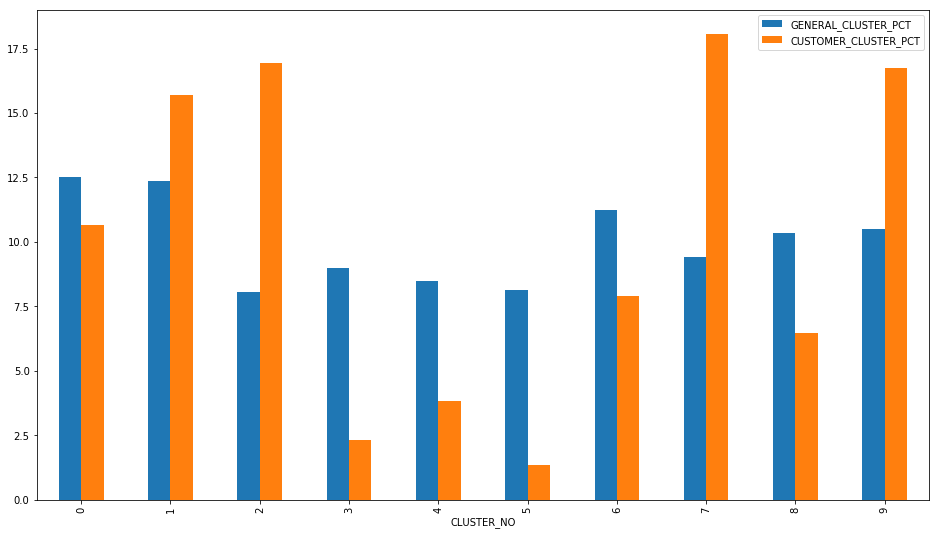

In [222]:
cluster_counts.plot(x='CLUSTER_NO', y=["GENERAL_CLUSTER_PCT","CUSTOMER_CLUSTER_PCT"],kind="bar")

In [234]:
# What kinds of people are part of a cluster that is overrepresented in the
# customer data compared to the general population?
cluster_counts_over = cluster_counts[(cluster_counts.OVER_REPRESENTATION == 1)]
cluster_counts_over.head()

,CLUSTER_NO,GENERAL_CLUSTER_COUNT,CUSTOMER_CLUSTER_COUNT,GENERAL_CLUSTER_PCT,CUSTOMER_CLUSTER_PCT,CLUSTER_PCT_DIFF,OVER_REPRESENTATION
1,1,110112,30079,12.355185,15.694592,-3.339408,1
2,2,71628,32491,8.037064,16.953123,-8.916060,1
7,7,83994,34658,9.424598,18.083819,-8.659220,1
9,9,93715,32104,10.515349,16.751195,-6.235846,1


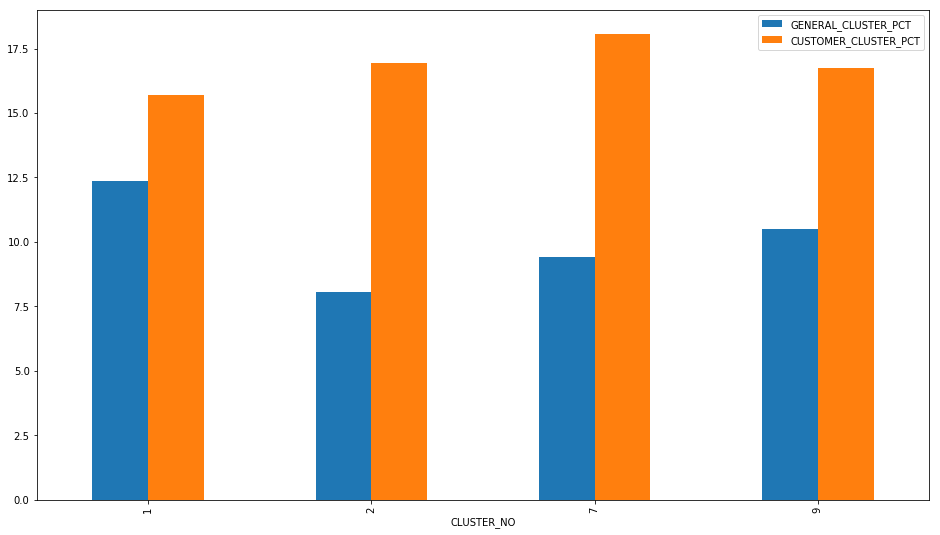

In [235]:
cluster_counts_over.plot(x='CLUSTER_NO', y=["GENERAL_CLUSTER_PCT","CUSTOMER_CLUSTER_PCT"],kind="bar")

In [236]:
# What kinds of people are part of a cluster that is underrepresented in the
# customer data compared to the general population?

cluster_counts_under = cluster_counts[(cluster_counts.OVER_REPRESENTATION == 0)]
cluster_counts_under.head()

,CLUSTER_NO,GENERAL_CLUSTER_COUNT,CUSTOMER_CLUSTER_COUNT,GENERAL_CLUSTER_PCT,CUSTOMER_CLUSTER_PCT,CLUSTER_PCT_DIFF,OVER_REPRESENTATION
0,0,111602,20451,12.522371,10.670904,1.851467,0
3,3,79971,4462,8.973195,2.328178,6.645017,0
4,4,75504,7321,8.471973,3.819944,4.652028,0
5,5,72320,2597,8.114710,1.355060,6.759650,0
6,6,100293,15138,11.253438,7.898691,3.354746,0


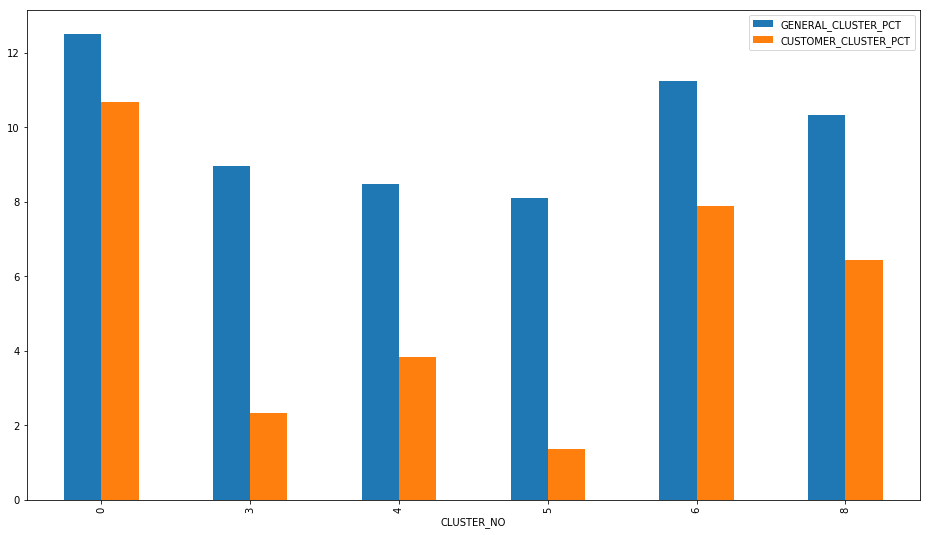

In [237]:
cluster_counts_under.plot(x='CLUSTER_NO', y=["GENERAL_CLUSTER_PCT","CUSTOMER_CLUSTER_PCT"],kind="bar")

> Congratulations on making it this far in the project! Before you finish, make sure to check through the entire notebook from top to bottom to make sure that your analysis follows a logical flow and all of your findings are documented in **Discussion** cells. Once you've checked over all of your work, you should export the notebook as an HTML document to submit for evaluation. You can do this from the menu, navigating to **File -> Download as -> HTML (.html)**. You will submit both that document and this notebook for your project submission.